In [16]:
import xgboost as xgb
import pandas as pd
import numpy as np
import preprocess as datapre

from time import time
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import log_loss, make_scorer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [2]:
origin_train_data = pd.read_csv("../datasets/train_preprocess.csv")

In [3]:
feature_names = ['Year', 'Month', 'Hour', 'DayOfWeekID', 'PdDistrictID', \
                 'HasBlock', 'RoadTypeID', 'RoadBlockID', 'RoadName1ID', 'RoadName2ID', 'X', 'Y']

In [4]:
valid_data = pd.read_csv("../datasets/test_preprocess.csv")
valid_X = valid_data[feature_names]

----

#### 使用最优参数训练最复杂模型

In [5]:
train_data = origin_train_data

In [6]:
X = train_data[feature_names]

In [7]:
TargetEnc = LabelEncoder()
y_true = TargetEnc.fit_transform(train_data["Category"])

In [8]:
base_param = {'max_depth': 6, 'learning_rate': 0.01, 'n_estimators': 5000, 
              'objective': 'multi:softprob', 'n_jobs': 7, 'gamma': 0.5, 'min_child_weight': 9,
              'subsample':0.6, 'colsample_bytree': 0.6, 'random_state': 10}

In [9]:
xgbclf = xgb.XGBClassifier(**base_param)
xgbclf.fit(X, y_true, early_stopping_rounds=2,
                eval_set=[(X, y_true)],
                eval_metric="mlogloss",
                verbose=True)

[0]	validation_0-mlogloss:3.64354
Will train until validation_0-mlogloss hasn't improved in 2 rounds.
[1]	validation_0-mlogloss:3.62478
[2]	validation_0-mlogloss:3.60636
[3]	validation_0-mlogloss:3.5881
[4]	validation_0-mlogloss:3.57088
[5]	validation_0-mlogloss:3.55386
[6]	validation_0-mlogloss:3.53789
[7]	validation_0-mlogloss:3.5214
[8]	validation_0-mlogloss:3.50608
[9]	validation_0-mlogloss:3.49122
[10]	validation_0-mlogloss:3.47671
[11]	validation_0-mlogloss:3.46279
[12]	validation_0-mlogloss:3.44927
[13]	validation_0-mlogloss:3.43562
[14]	validation_0-mlogloss:3.42249
[15]	validation_0-mlogloss:3.41002
[16]	validation_0-mlogloss:3.39745
[17]	validation_0-mlogloss:3.38583
[18]	validation_0-mlogloss:3.37407
[19]	validation_0-mlogloss:3.36254
[20]	validation_0-mlogloss:3.35119
[21]	validation_0-mlogloss:3.33969
[22]	validation_0-mlogloss:3.3289
[23]	validation_0-mlogloss:3.31845
[24]	validation_0-mlogloss:3.3081
[25]	validation_0-mlogloss:3.29791
[26]	validation_0-mlogloss:3.28796
[

[230]	validation_0-mlogloss:2.56092
[231]	validation_0-mlogloss:2.55969
[232]	validation_0-mlogloss:2.55848
[233]	validation_0-mlogloss:2.55726
[234]	validation_0-mlogloss:2.55605
[235]	validation_0-mlogloss:2.55482
[236]	validation_0-mlogloss:2.55361
[237]	validation_0-mlogloss:2.55241
[238]	validation_0-mlogloss:2.55123
[239]	validation_0-mlogloss:2.55003
[240]	validation_0-mlogloss:2.54884
[241]	validation_0-mlogloss:2.54767
[242]	validation_0-mlogloss:2.54649
[243]	validation_0-mlogloss:2.54531
[244]	validation_0-mlogloss:2.54417
[245]	validation_0-mlogloss:2.54305
[246]	validation_0-mlogloss:2.54193
[247]	validation_0-mlogloss:2.54082
[248]	validation_0-mlogloss:2.53971
[249]	validation_0-mlogloss:2.53861
[250]	validation_0-mlogloss:2.53751
[251]	validation_0-mlogloss:2.53643
[252]	validation_0-mlogloss:2.53536
[253]	validation_0-mlogloss:2.53424
[254]	validation_0-mlogloss:2.53317
[255]	validation_0-mlogloss:2.53212
[256]	validation_0-mlogloss:2.53107
[257]	validation_0-mlogloss:

[459]	validation_0-mlogloss:2.40866
[460]	validation_0-mlogloss:2.40834
[461]	validation_0-mlogloss:2.40801
[462]	validation_0-mlogloss:2.40768
[463]	validation_0-mlogloss:2.40736
[464]	validation_0-mlogloss:2.40704
[465]	validation_0-mlogloss:2.40672
[466]	validation_0-mlogloss:2.4064
[467]	validation_0-mlogloss:2.40609
[468]	validation_0-mlogloss:2.40578
[469]	validation_0-mlogloss:2.40546
[470]	validation_0-mlogloss:2.40515
[471]	validation_0-mlogloss:2.40484
[472]	validation_0-mlogloss:2.40452
[473]	validation_0-mlogloss:2.4042
[474]	validation_0-mlogloss:2.40387
[475]	validation_0-mlogloss:2.40356
[476]	validation_0-mlogloss:2.40326
[477]	validation_0-mlogloss:2.40296
[478]	validation_0-mlogloss:2.40267
[479]	validation_0-mlogloss:2.40238
[480]	validation_0-mlogloss:2.40208
[481]	validation_0-mlogloss:2.40179
[482]	validation_0-mlogloss:2.4015
[483]	validation_0-mlogloss:2.40119
[484]	validation_0-mlogloss:2.4009
[485]	validation_0-mlogloss:2.4006
[486]	validation_0-mlogloss:2.400

[688]	validation_0-mlogloss:2.36017
[689]	validation_0-mlogloss:2.36005
[690]	validation_0-mlogloss:2.35993
[691]	validation_0-mlogloss:2.35979
[692]	validation_0-mlogloss:2.35966
[693]	validation_0-mlogloss:2.35952
[694]	validation_0-mlogloss:2.35939
[695]	validation_0-mlogloss:2.35924
[696]	validation_0-mlogloss:2.35908
[697]	validation_0-mlogloss:2.35896
[698]	validation_0-mlogloss:2.35882
[699]	validation_0-mlogloss:2.35869
[700]	validation_0-mlogloss:2.35855
[701]	validation_0-mlogloss:2.35842
[702]	validation_0-mlogloss:2.3583
[703]	validation_0-mlogloss:2.35818
[704]	validation_0-mlogloss:2.35805
[705]	validation_0-mlogloss:2.35793
[706]	validation_0-mlogloss:2.3578
[707]	validation_0-mlogloss:2.35767
[708]	validation_0-mlogloss:2.35754
[709]	validation_0-mlogloss:2.35743
[710]	validation_0-mlogloss:2.3573
[711]	validation_0-mlogloss:2.35717
[712]	validation_0-mlogloss:2.35705
[713]	validation_0-mlogloss:2.35692
[714]	validation_0-mlogloss:2.3568
[715]	validation_0-mlogloss:2.35

[917]	validation_0-mlogloss:2.33666
[918]	validation_0-mlogloss:2.33658
[919]	validation_0-mlogloss:2.33649
[920]	validation_0-mlogloss:2.33641
[921]	validation_0-mlogloss:2.33633
[922]	validation_0-mlogloss:2.33624
[923]	validation_0-mlogloss:2.33616
[924]	validation_0-mlogloss:2.33608
[925]	validation_0-mlogloss:2.336
[926]	validation_0-mlogloss:2.33591
[927]	validation_0-mlogloss:2.33583
[928]	validation_0-mlogloss:2.33575
[929]	validation_0-mlogloss:2.33567
[930]	validation_0-mlogloss:2.33559
[931]	validation_0-mlogloss:2.33551
[932]	validation_0-mlogloss:2.33543
[933]	validation_0-mlogloss:2.33535
[934]	validation_0-mlogloss:2.33526
[935]	validation_0-mlogloss:2.33518
[936]	validation_0-mlogloss:2.3351
[937]	validation_0-mlogloss:2.33501
[938]	validation_0-mlogloss:2.33494
[939]	validation_0-mlogloss:2.33487
[940]	validation_0-mlogloss:2.33479
[941]	validation_0-mlogloss:2.33472
[942]	validation_0-mlogloss:2.33463
[943]	validation_0-mlogloss:2.33455
[944]	validation_0-mlogloss:2.3

[1142]	validation_0-mlogloss:2.32075
[1143]	validation_0-mlogloss:2.32069
[1144]	validation_0-mlogloss:2.32063
[1145]	validation_0-mlogloss:2.32056
[1146]	validation_0-mlogloss:2.3205
[1147]	validation_0-mlogloss:2.32044
[1148]	validation_0-mlogloss:2.32038
[1149]	validation_0-mlogloss:2.32033
[1150]	validation_0-mlogloss:2.32026
[1151]	validation_0-mlogloss:2.3202
[1152]	validation_0-mlogloss:2.32015
[1153]	validation_0-mlogloss:2.32009
[1154]	validation_0-mlogloss:2.32002
[1155]	validation_0-mlogloss:2.31997
[1156]	validation_0-mlogloss:2.31991
[1157]	validation_0-mlogloss:2.31985
[1158]	validation_0-mlogloss:2.31978
[1159]	validation_0-mlogloss:2.31973
[1160]	validation_0-mlogloss:2.31966
[1161]	validation_0-mlogloss:2.31959
[1162]	validation_0-mlogloss:2.31953
[1163]	validation_0-mlogloss:2.31947
[1164]	validation_0-mlogloss:2.31941
[1165]	validation_0-mlogloss:2.31935
[1166]	validation_0-mlogloss:2.31928
[1167]	validation_0-mlogloss:2.31922
[1168]	validation_0-mlogloss:2.31916
[11

[1365]	validation_0-mlogloss:2.30806
[1366]	validation_0-mlogloss:2.30801
[1367]	validation_0-mlogloss:2.30796
[1368]	validation_0-mlogloss:2.30792
[1369]	validation_0-mlogloss:2.30787
[1370]	validation_0-mlogloss:2.30781
[1371]	validation_0-mlogloss:2.30776
[1372]	validation_0-mlogloss:2.30771
[1373]	validation_0-mlogloss:2.30766
[1374]	validation_0-mlogloss:2.30761
[1375]	validation_0-mlogloss:2.30755
[1376]	validation_0-mlogloss:2.3075
[1377]	validation_0-mlogloss:2.30746
[1378]	validation_0-mlogloss:2.3074
[1379]	validation_0-mlogloss:2.30735
[1380]	validation_0-mlogloss:2.30731
[1381]	validation_0-mlogloss:2.30725
[1382]	validation_0-mlogloss:2.3072
[1383]	validation_0-mlogloss:2.30714
[1384]	validation_0-mlogloss:2.3071
[1385]	validation_0-mlogloss:2.30704
[1386]	validation_0-mlogloss:2.307
[1387]	validation_0-mlogloss:2.30695
[1388]	validation_0-mlogloss:2.30689
[1389]	validation_0-mlogloss:2.30685
[1390]	validation_0-mlogloss:2.30679
[1391]	validation_0-mlogloss:2.30674
[1392]	

[1588]	validation_0-mlogloss:2.29726
[1589]	validation_0-mlogloss:2.29721
[1590]	validation_0-mlogloss:2.29716
[1591]	validation_0-mlogloss:2.29711
[1592]	validation_0-mlogloss:2.29705
[1593]	validation_0-mlogloss:2.297
[1594]	validation_0-mlogloss:2.29696
[1595]	validation_0-mlogloss:2.29691
[1596]	validation_0-mlogloss:2.29686
[1597]	validation_0-mlogloss:2.2968
[1598]	validation_0-mlogloss:2.29676
[1599]	validation_0-mlogloss:2.29671
[1600]	validation_0-mlogloss:2.29667
[1601]	validation_0-mlogloss:2.29662
[1602]	validation_0-mlogloss:2.29658
[1603]	validation_0-mlogloss:2.29653
[1604]	validation_0-mlogloss:2.29648
[1605]	validation_0-mlogloss:2.29643
[1606]	validation_0-mlogloss:2.29638
[1607]	validation_0-mlogloss:2.29634
[1608]	validation_0-mlogloss:2.29629
[1609]	validation_0-mlogloss:2.29625
[1610]	validation_0-mlogloss:2.29621
[1611]	validation_0-mlogloss:2.29617
[1612]	validation_0-mlogloss:2.29613
[1613]	validation_0-mlogloss:2.29609
[1614]	validation_0-mlogloss:2.29605
[161

[1811]	validation_0-mlogloss:2.28752
[1812]	validation_0-mlogloss:2.28747
[1813]	validation_0-mlogloss:2.28742
[1814]	validation_0-mlogloss:2.28737
[1815]	validation_0-mlogloss:2.28733
[1816]	validation_0-mlogloss:2.28729
[1817]	validation_0-mlogloss:2.28725
[1818]	validation_0-mlogloss:2.28721
[1819]	validation_0-mlogloss:2.28717
[1820]	validation_0-mlogloss:2.28713
[1821]	validation_0-mlogloss:2.28709
[1822]	validation_0-mlogloss:2.28705
[1823]	validation_0-mlogloss:2.28701
[1824]	validation_0-mlogloss:2.28697
[1825]	validation_0-mlogloss:2.28693
[1826]	validation_0-mlogloss:2.28689
[1827]	validation_0-mlogloss:2.28685
[1828]	validation_0-mlogloss:2.28681
[1829]	validation_0-mlogloss:2.28677
[1830]	validation_0-mlogloss:2.28673
[1831]	validation_0-mlogloss:2.2867
[1832]	validation_0-mlogloss:2.28666
[1833]	validation_0-mlogloss:2.28662
[1834]	validation_0-mlogloss:2.28658
[1835]	validation_0-mlogloss:2.28654
[1836]	validation_0-mlogloss:2.2865
[1837]	validation_0-mlogloss:2.28646
[18

[2033]	validation_0-mlogloss:2.27879
[2034]	validation_0-mlogloss:2.27875
[2035]	validation_0-mlogloss:2.27872
[2036]	validation_0-mlogloss:2.27868
[2037]	validation_0-mlogloss:2.27864
[2038]	validation_0-mlogloss:2.2786
[2039]	validation_0-mlogloss:2.27856
[2040]	validation_0-mlogloss:2.27852
[2041]	validation_0-mlogloss:2.27848
[2042]	validation_0-mlogloss:2.27844
[2043]	validation_0-mlogloss:2.27841
[2044]	validation_0-mlogloss:2.27837
[2045]	validation_0-mlogloss:2.27834
[2046]	validation_0-mlogloss:2.27829
[2047]	validation_0-mlogloss:2.27826
[2048]	validation_0-mlogloss:2.27822
[2049]	validation_0-mlogloss:2.27818
[2050]	validation_0-mlogloss:2.27814
[2051]	validation_0-mlogloss:2.27811
[2052]	validation_0-mlogloss:2.27807
[2053]	validation_0-mlogloss:2.27804
[2054]	validation_0-mlogloss:2.278
[2055]	validation_0-mlogloss:2.27796
[2056]	validation_0-mlogloss:2.27793
[2057]	validation_0-mlogloss:2.27789
[2058]	validation_0-mlogloss:2.27785
[2059]	validation_0-mlogloss:2.27781
[206

[2255]	validation_0-mlogloss:2.27066
[2256]	validation_0-mlogloss:2.27062
[2257]	validation_0-mlogloss:2.27059
[2258]	validation_0-mlogloss:2.27054
[2259]	validation_0-mlogloss:2.2705
[2260]	validation_0-mlogloss:2.27047
[2261]	validation_0-mlogloss:2.27043
[2262]	validation_0-mlogloss:2.2704
[2263]	validation_0-mlogloss:2.27036
[2264]	validation_0-mlogloss:2.27033
[2265]	validation_0-mlogloss:2.27029
[2266]	validation_0-mlogloss:2.27025
[2267]	validation_0-mlogloss:2.27022
[2268]	validation_0-mlogloss:2.27019
[2269]	validation_0-mlogloss:2.27016
[2270]	validation_0-mlogloss:2.27012
[2271]	validation_0-mlogloss:2.27008
[2272]	validation_0-mlogloss:2.27004
[2273]	validation_0-mlogloss:2.27001
[2274]	validation_0-mlogloss:2.26997
[2275]	validation_0-mlogloss:2.26994
[2276]	validation_0-mlogloss:2.26991
[2277]	validation_0-mlogloss:2.26987
[2278]	validation_0-mlogloss:2.26984
[2279]	validation_0-mlogloss:2.2698
[2280]	validation_0-mlogloss:2.26977
[2281]	validation_0-mlogloss:2.26973
[228

[2478]	validation_0-mlogloss:2.26306
[2479]	validation_0-mlogloss:2.26303
[2480]	validation_0-mlogloss:2.263
[2481]	validation_0-mlogloss:2.26297
[2482]	validation_0-mlogloss:2.26294
[2483]	validation_0-mlogloss:2.2629
[2484]	validation_0-mlogloss:2.26288
[2485]	validation_0-mlogloss:2.26284
[2486]	validation_0-mlogloss:2.26281
[2487]	validation_0-mlogloss:2.26278
[2488]	validation_0-mlogloss:2.26275
[2489]	validation_0-mlogloss:2.26271
[2490]	validation_0-mlogloss:2.26268
[2491]	validation_0-mlogloss:2.26264
[2492]	validation_0-mlogloss:2.26261
[2493]	validation_0-mlogloss:2.26258
[2494]	validation_0-mlogloss:2.26255
[2495]	validation_0-mlogloss:2.26252
[2496]	validation_0-mlogloss:2.26248
[2497]	validation_0-mlogloss:2.26245
[2498]	validation_0-mlogloss:2.26242
[2499]	validation_0-mlogloss:2.26239
[2500]	validation_0-mlogloss:2.26235
[2501]	validation_0-mlogloss:2.26232
[2502]	validation_0-mlogloss:2.26229
[2503]	validation_0-mlogloss:2.26226
[2504]	validation_0-mlogloss:2.26222
[250

[2701]	validation_0-mlogloss:2.25592
[2702]	validation_0-mlogloss:2.25589
[2703]	validation_0-mlogloss:2.25586
[2704]	validation_0-mlogloss:2.25583
[2705]	validation_0-mlogloss:2.2558
[2706]	validation_0-mlogloss:2.25577
[2707]	validation_0-mlogloss:2.25574
[2708]	validation_0-mlogloss:2.2557
[2709]	validation_0-mlogloss:2.25567
[2710]	validation_0-mlogloss:2.25564
[2711]	validation_0-mlogloss:2.2556
[2712]	validation_0-mlogloss:2.25558
[2713]	validation_0-mlogloss:2.25555
[2714]	validation_0-mlogloss:2.25552
[2715]	validation_0-mlogloss:2.25548
[2716]	validation_0-mlogloss:2.25545
[2717]	validation_0-mlogloss:2.25542
[2718]	validation_0-mlogloss:2.25539
[2719]	validation_0-mlogloss:2.25535
[2720]	validation_0-mlogloss:2.25532
[2721]	validation_0-mlogloss:2.25529
[2722]	validation_0-mlogloss:2.25525
[2723]	validation_0-mlogloss:2.25522
[2724]	validation_0-mlogloss:2.2552
[2725]	validation_0-mlogloss:2.25516
[2726]	validation_0-mlogloss:2.25513
[2727]	validation_0-mlogloss:2.2551
[2728]

[2924]	validation_0-mlogloss:2.24914
[2925]	validation_0-mlogloss:2.24911
[2926]	validation_0-mlogloss:2.24908
[2927]	validation_0-mlogloss:2.24905
[2928]	validation_0-mlogloss:2.24901
[2929]	validation_0-mlogloss:2.24898
[2930]	validation_0-mlogloss:2.24895
[2931]	validation_0-mlogloss:2.24892
[2932]	validation_0-mlogloss:2.24889
[2933]	validation_0-mlogloss:2.24886
[2934]	validation_0-mlogloss:2.24883
[2935]	validation_0-mlogloss:2.2488
[2936]	validation_0-mlogloss:2.24878
[2937]	validation_0-mlogloss:2.24874
[2938]	validation_0-mlogloss:2.24872
[2939]	validation_0-mlogloss:2.24869
[2940]	validation_0-mlogloss:2.24866
[2941]	validation_0-mlogloss:2.24863
[2942]	validation_0-mlogloss:2.2486
[2943]	validation_0-mlogloss:2.24857
[2944]	validation_0-mlogloss:2.24854
[2945]	validation_0-mlogloss:2.24851
[2946]	validation_0-mlogloss:2.24848
[2947]	validation_0-mlogloss:2.24845
[2948]	validation_0-mlogloss:2.24843
[2949]	validation_0-mlogloss:2.24839
[2950]	validation_0-mlogloss:2.24837
[29

[3147]	validation_0-mlogloss:2.24273
[3148]	validation_0-mlogloss:2.2427
[3149]	validation_0-mlogloss:2.24267
[3150]	validation_0-mlogloss:2.24264
[3151]	validation_0-mlogloss:2.24261
[3152]	validation_0-mlogloss:2.24258
[3153]	validation_0-mlogloss:2.24256
[3154]	validation_0-mlogloss:2.24253
[3155]	validation_0-mlogloss:2.2425
[3156]	validation_0-mlogloss:2.24247
[3157]	validation_0-mlogloss:2.24244
[3158]	validation_0-mlogloss:2.24242
[3159]	validation_0-mlogloss:2.24239
[3160]	validation_0-mlogloss:2.24236
[3161]	validation_0-mlogloss:2.24233
[3162]	validation_0-mlogloss:2.2423
[3163]	validation_0-mlogloss:2.24227
[3164]	validation_0-mlogloss:2.24224
[3165]	validation_0-mlogloss:2.24221
[3166]	validation_0-mlogloss:2.24219
[3167]	validation_0-mlogloss:2.24217
[3168]	validation_0-mlogloss:2.24214
[3169]	validation_0-mlogloss:2.24211
[3170]	validation_0-mlogloss:2.24208
[3171]	validation_0-mlogloss:2.24205
[3172]	validation_0-mlogloss:2.24203
[3173]	validation_0-mlogloss:2.24199
[317

[3369]	validation_0-mlogloss:2.23652
[3370]	validation_0-mlogloss:2.23649
[3371]	validation_0-mlogloss:2.23646
[3372]	validation_0-mlogloss:2.23643
[3373]	validation_0-mlogloss:2.23641
[3374]	validation_0-mlogloss:2.23639
[3375]	validation_0-mlogloss:2.23636
[3376]	validation_0-mlogloss:2.23633
[3377]	validation_0-mlogloss:2.23631
[3378]	validation_0-mlogloss:2.23628
[3379]	validation_0-mlogloss:2.23625
[3380]	validation_0-mlogloss:2.23622
[3381]	validation_0-mlogloss:2.2362
[3382]	validation_0-mlogloss:2.23617
[3383]	validation_0-mlogloss:2.23614
[3384]	validation_0-mlogloss:2.23611
[3385]	validation_0-mlogloss:2.23608
[3386]	validation_0-mlogloss:2.23606
[3387]	validation_0-mlogloss:2.23603
[3388]	validation_0-mlogloss:2.236
[3389]	validation_0-mlogloss:2.23597
[3390]	validation_0-mlogloss:2.23595
[3391]	validation_0-mlogloss:2.23593
[3392]	validation_0-mlogloss:2.2359
[3393]	validation_0-mlogloss:2.23587
[3394]	validation_0-mlogloss:2.23584
[3395]	validation_0-mlogloss:2.23582
[3396

[3592]	validation_0-mlogloss:2.23061
[3593]	validation_0-mlogloss:2.23059
[3594]	validation_0-mlogloss:2.23056
[3595]	validation_0-mlogloss:2.23054
[3596]	validation_0-mlogloss:2.23051
[3597]	validation_0-mlogloss:2.23049
[3598]	validation_0-mlogloss:2.23046
[3599]	validation_0-mlogloss:2.23044
[3600]	validation_0-mlogloss:2.23041
[3601]	validation_0-mlogloss:2.23038
[3602]	validation_0-mlogloss:2.23035
[3603]	validation_0-mlogloss:2.23033
[3604]	validation_0-mlogloss:2.23031
[3605]	validation_0-mlogloss:2.23028
[3606]	validation_0-mlogloss:2.23026
[3607]	validation_0-mlogloss:2.23023
[3608]	validation_0-mlogloss:2.23021
[3609]	validation_0-mlogloss:2.23019
[3610]	validation_0-mlogloss:2.23016
[3611]	validation_0-mlogloss:2.23013
[3612]	validation_0-mlogloss:2.23011
[3613]	validation_0-mlogloss:2.23008
[3614]	validation_0-mlogloss:2.23005
[3615]	validation_0-mlogloss:2.23002
[3616]	validation_0-mlogloss:2.23
[3617]	validation_0-mlogloss:2.22997
[3618]	validation_0-mlogloss:2.22995
[361

[3815]	validation_0-mlogloss:2.22489
[3816]	validation_0-mlogloss:2.22486
[3817]	validation_0-mlogloss:2.22484
[3818]	validation_0-mlogloss:2.22482
[3819]	validation_0-mlogloss:2.2248
[3820]	validation_0-mlogloss:2.22477
[3821]	validation_0-mlogloss:2.22475
[3822]	validation_0-mlogloss:2.22472
[3823]	validation_0-mlogloss:2.2247
[3824]	validation_0-mlogloss:2.22468
[3825]	validation_0-mlogloss:2.22465
[3826]	validation_0-mlogloss:2.22463
[3827]	validation_0-mlogloss:2.2246
[3828]	validation_0-mlogloss:2.22458
[3829]	validation_0-mlogloss:2.22456
[3830]	validation_0-mlogloss:2.22453
[3831]	validation_0-mlogloss:2.22451
[3832]	validation_0-mlogloss:2.22449
[3833]	validation_0-mlogloss:2.22446
[3834]	validation_0-mlogloss:2.22444
[3835]	validation_0-mlogloss:2.22441
[3836]	validation_0-mlogloss:2.22438
[3837]	validation_0-mlogloss:2.22436
[3838]	validation_0-mlogloss:2.22433
[3839]	validation_0-mlogloss:2.22431
[3840]	validation_0-mlogloss:2.22429
[3841]	validation_0-mlogloss:2.22426
[384

[4038]	validation_0-mlogloss:2.21942
[4039]	validation_0-mlogloss:2.2194
[4040]	validation_0-mlogloss:2.21937
[4041]	validation_0-mlogloss:2.21935
[4042]	validation_0-mlogloss:2.21932
[4043]	validation_0-mlogloss:2.2193
[4044]	validation_0-mlogloss:2.21928
[4045]	validation_0-mlogloss:2.21925
[4046]	validation_0-mlogloss:2.21923
[4047]	validation_0-mlogloss:2.2192
[4048]	validation_0-mlogloss:2.21918
[4049]	validation_0-mlogloss:2.21915
[4050]	validation_0-mlogloss:2.21913
[4051]	validation_0-mlogloss:2.2191
[4052]	validation_0-mlogloss:2.21908
[4053]	validation_0-mlogloss:2.21906
[4054]	validation_0-mlogloss:2.21903
[4055]	validation_0-mlogloss:2.219
[4056]	validation_0-mlogloss:2.21898
[4057]	validation_0-mlogloss:2.21895
[4058]	validation_0-mlogloss:2.21893
[4059]	validation_0-mlogloss:2.2189
[4060]	validation_0-mlogloss:2.21888
[4061]	validation_0-mlogloss:2.21886
[4062]	validation_0-mlogloss:2.21883
[4063]	validation_0-mlogloss:2.21881
[4064]	validation_0-mlogloss:2.21878
[4065]	v

[4261]	validation_0-mlogloss:2.21406
[4262]	validation_0-mlogloss:2.21404
[4263]	validation_0-mlogloss:2.21401
[4264]	validation_0-mlogloss:2.21399
[4265]	validation_0-mlogloss:2.21396
[4266]	validation_0-mlogloss:2.21394
[4267]	validation_0-mlogloss:2.21392
[4268]	validation_0-mlogloss:2.21389
[4269]	validation_0-mlogloss:2.21386
[4270]	validation_0-mlogloss:2.21384
[4271]	validation_0-mlogloss:2.21381
[4272]	validation_0-mlogloss:2.21379
[4273]	validation_0-mlogloss:2.21376
[4274]	validation_0-mlogloss:2.21374
[4275]	validation_0-mlogloss:2.21371
[4276]	validation_0-mlogloss:2.21369
[4277]	validation_0-mlogloss:2.21367
[4278]	validation_0-mlogloss:2.21364
[4279]	validation_0-mlogloss:2.21361
[4280]	validation_0-mlogloss:2.21359
[4281]	validation_0-mlogloss:2.21357
[4282]	validation_0-mlogloss:2.21355
[4283]	validation_0-mlogloss:2.21353
[4284]	validation_0-mlogloss:2.21351
[4285]	validation_0-mlogloss:2.21348
[4286]	validation_0-mlogloss:2.21346
[4287]	validation_0-mlogloss:2.21344
[

[4483]	validation_0-mlogloss:2.20893
[4484]	validation_0-mlogloss:2.20891
[4485]	validation_0-mlogloss:2.20888
[4486]	validation_0-mlogloss:2.20886
[4487]	validation_0-mlogloss:2.20884
[4488]	validation_0-mlogloss:2.20881
[4489]	validation_0-mlogloss:2.20879
[4490]	validation_0-mlogloss:2.20877
[4491]	validation_0-mlogloss:2.20875
[4492]	validation_0-mlogloss:2.20873
[4493]	validation_0-mlogloss:2.2087
[4494]	validation_0-mlogloss:2.20868
[4495]	validation_0-mlogloss:2.20866
[4496]	validation_0-mlogloss:2.20863
[4497]	validation_0-mlogloss:2.20861
[4498]	validation_0-mlogloss:2.20859
[4499]	validation_0-mlogloss:2.20856
[4500]	validation_0-mlogloss:2.20854
[4501]	validation_0-mlogloss:2.20851
[4502]	validation_0-mlogloss:2.20849
[4503]	validation_0-mlogloss:2.20847
[4504]	validation_0-mlogloss:2.20845
[4505]	validation_0-mlogloss:2.20843
[4506]	validation_0-mlogloss:2.2084
[4507]	validation_0-mlogloss:2.20838
[4508]	validation_0-mlogloss:2.20836
[4509]	validation_0-mlogloss:2.20833
[45

[4705]	validation_0-mlogloss:2.20391
[4706]	validation_0-mlogloss:2.20389
[4707]	validation_0-mlogloss:2.20386
[4708]	validation_0-mlogloss:2.20384
[4709]	validation_0-mlogloss:2.20382
[4710]	validation_0-mlogloss:2.2038
[4711]	validation_0-mlogloss:2.20378
[4712]	validation_0-mlogloss:2.20376
[4713]	validation_0-mlogloss:2.20373
[4714]	validation_0-mlogloss:2.20371
[4715]	validation_0-mlogloss:2.20369
[4716]	validation_0-mlogloss:2.20366
[4717]	validation_0-mlogloss:2.20364
[4718]	validation_0-mlogloss:2.20362
[4719]	validation_0-mlogloss:2.20359
[4720]	validation_0-mlogloss:2.20357
[4721]	validation_0-mlogloss:2.20354
[4722]	validation_0-mlogloss:2.20352
[4723]	validation_0-mlogloss:2.2035
[4724]	validation_0-mlogloss:2.20347
[4725]	validation_0-mlogloss:2.20345
[4726]	validation_0-mlogloss:2.20343
[4727]	validation_0-mlogloss:2.20341
[4728]	validation_0-mlogloss:2.20339
[4729]	validation_0-mlogloss:2.20337
[4730]	validation_0-mlogloss:2.20335
[4731]	validation_0-mlogloss:2.20333
[47

[4928]	validation_0-mlogloss:2.19901
[4929]	validation_0-mlogloss:2.19899
[4930]	validation_0-mlogloss:2.19897
[4931]	validation_0-mlogloss:2.19895
[4932]	validation_0-mlogloss:2.19893
[4933]	validation_0-mlogloss:2.19891
[4934]	validation_0-mlogloss:2.19889
[4935]	validation_0-mlogloss:2.19887
[4936]	validation_0-mlogloss:2.19884
[4937]	validation_0-mlogloss:2.19882
[4938]	validation_0-mlogloss:2.1988
[4939]	validation_0-mlogloss:2.19877
[4940]	validation_0-mlogloss:2.19875
[4941]	validation_0-mlogloss:2.19873
[4942]	validation_0-mlogloss:2.19871
[4943]	validation_0-mlogloss:2.19869
[4944]	validation_0-mlogloss:2.19867
[4945]	validation_0-mlogloss:2.19864
[4946]	validation_0-mlogloss:2.19862
[4947]	validation_0-mlogloss:2.19861
[4948]	validation_0-mlogloss:2.19858
[4949]	validation_0-mlogloss:2.19856
[4950]	validation_0-mlogloss:2.19854
[4951]	validation_0-mlogloss:2.19852
[4952]	validation_0-mlogloss:2.1985
[4953]	validation_0-mlogloss:2.19848
[4954]	validation_0-mlogloss:2.19846
[49

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.01,
       max_delta_step=0, max_depth=6, min_child_weight=9, missing=None,
       n_estimators=5000, n_jobs=7, nthread=None,
       objective='multi:softprob', random_state=10, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.6)

In [10]:
xgbclf.save_model("../models/xgbclf_bigest.model")

In [14]:
print(xgbclf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.01,
       max_delta_step=0, max_depth=6, min_child_weight=9, missing=None,
       n_estimators=5000, n_jobs=7, nthread=None,
       objective='multi:softprob', random_state=10, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.6)


In [21]:
for i in range(1000, 5001, 500):
    start=time()
    y_pred_prob = np.round(xgbclf.predict_proba(valid_X, ntree_limit=i), 4)
    csv_output = pd.DataFrame(columns=TargetEnc.classes_, data=y_pred_prob)
    csv_output.insert(0, 'Id', valid_data['Id'])
    csv_output.to_csv('../results/XGBClassifier_bigest_'+str(i)+".csv", index=False)
    print("i_%d %d seconds." % (i, (time()-start)))

i_1000 1865 seconds.
i_1500 2884 seconds.
i_2000 3984 seconds.
i_2500 5095 seconds.
i_3000 6371 seconds.
i_3500 7563 seconds.
i_4000 8695 seconds.
i_4500 9923 seconds.
i_5000 11204 seconds.


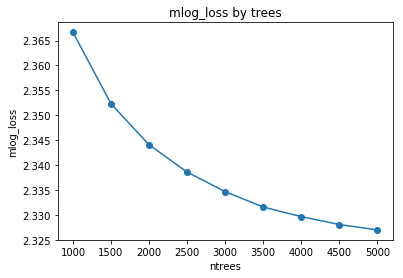

In [34]:
mlog_loss = [2.36666, 2.35231, 2.34410, 2.33861, 2.33469, 2.33161, 2.32968, 2.32809, 2.32701]
ntrees = list(range(1000, 5001, 500))

import matplotlib.pyplot as plt

plt.plot(ntrees, mlog_loss, "o-")
# plt.ylim(2.30, 2.40)
plt.ylabel("mlog_loss")
plt.xlabel("ntrees")
plt.title("mlog_loss by trees")

plt.savefig("../images/xgbclf_bigest_mlog_loss_by_trees.png")
plt.show()

对训练集中采样10000个样本进行准确率和召回率分析

In [147]:
data_10000 = datapre.dataset_sample(origin_train_data)

In [148]:
data_10K_X = data_10000[feature_names]
data_10K_y_true = TargetEnc.transform(data_10000["Category"])

In [149]:
a = np.round(xgbclf.predict_proba(data_10K_X), 3)

In [150]:
i_sort = np.argsort(a, axis=1)[:, -5:]
for i in range(a.shape[0]):
    print("%s %s %02d %02d" % (i_sort[i], a[i, i_sort[i]], y_true[i], i_sort[i][-1]) )

[ 4 35  1 20 16] [0.064 0.099 0.1   0.102 0.385] 37 16
[ 4 21  1 20 16] [0.069 0.098 0.128 0.15  0.19 ] 21 16
[ 4 35 36 16  1] [0.096 0.102 0.138 0.141 0.188] 21 01
[36 20 35 21 16] [0.037 0.045 0.055 0.092 0.668] 16 16
[37  1 20 21 16] [0.11  0.127 0.13  0.145 0.151] 16 16
[20 37  7 21 16] [0.06  0.082 0.091 0.216 0.277] 16 16
[21 20  4 36 16] [0.089 0.09  0.1   0.138 0.234] 36 16
[ 4 21 20 36 16] [0.086 0.093 0.107 0.112 0.161] 36 16
[35 21 20  1 16] [0.063 0.092 0.102 0.17  0.226] 16 16
[ 1 20 37 21 16] [0.047 0.079 0.082 0.115 0.453] 16 16
[ 4 21 20 36 16] [0.073 0.078 0.083 0.1   0.397] 16 16
[20  7 36 21 16] [0.066 0.085 0.136 0.181 0.279] 21 16
[13 37 20 21 16] [0.057 0.061 0.062 0.088 0.523] 35 16
[ 7  1 20 21 16] [0.045 0.047 0.104 0.157 0.449] 16 16
[16 37 20  7 21] [0.074 0.091 0.125 0.183 0.193] 20 21
[37  1 16 21 20] [0.066 0.095 0.113 0.115 0.364] 20 20
[ 1 20 35 21 16] [0.03  0.057 0.061 0.087 0.629] 25 16
[21 36  4 20 16] [0.087 0.101 0.121 0.138 0.208] 01 16
[21 20  1 

[ 1 20 36 35 16] [0.096 0.099 0.108 0.15  0.212] 27 16
[ 1 20 25 21 16] [0.083 0.102 0.118 0.189 0.21 ] 01 16
[35  4 21 20 16] [0.048 0.054 0.077 0.084 0.511] 20 16
[ 1 21 37 20 16] [0.05  0.078 0.079 0.115 0.463] 04 16
[ 1 21 20 36 16] [0.071 0.082 0.1   0.106 0.367] 00 16
[21  1 35 20 16] [0.069 0.09  0.103 0.138 0.319] 16 16
[ 1 37 21 16 20] [0.062 0.088 0.126 0.16  0.283] 01 20
[ 1 37 21 20 16] [0.072 0.089 0.141 0.177 0.221] 08 16
[ 4 21  1 20 16] [0.07  0.074 0.135 0.185 0.204] 35 16
[21  1 36 20 16] [0.072 0.074 0.092 0.107 0.361] 16 16
[ 1  4 21 20 16] [0.07  0.076 0.103 0.105 0.394] 32 16
[ 1  4 21 20 16] [0.035 0.036 0.069 0.171 0.516] 21 16
[13  1 21 20 16] [0.045 0.052 0.127 0.161 0.445] 07 16
[25  1 16 21 20] [0.101 0.117 0.133 0.178 0.187] 21 20
[ 1 35 20 21 16] [0.06  0.084 0.096 0.096 0.42 ] 04 16
[ 1  7 21 20 16] [0.07  0.076 0.142 0.197 0.29 ] 04 16
[36  4 21 20 16] [0.047 0.048 0.076 0.126 0.508] 30 16
[21 34  1 20 16] [0.059 0.068 0.101 0.202 0.263] 16 16
[35 20 21 

[35 20 36 16 21] [0.066 0.067 0.074 0.214 0.401] 16 21
[20 21 36 35 16] [0.098 0.099 0.171 0.174 0.204] 16 16
[ 4 21  1 20 16] [0.076 0.078 0.101 0.179 0.225] 16 16
[21 36 20  1 16] [0.033 0.034 0.059 0.063 0.661] 16 16
[37 20 16  1 21] [0.086 0.092 0.093 0.11  0.355] 16 21
[ 1 37 20 16 21] [0.078 0.08  0.17  0.191 0.202] 37 21
[ 7  1 20 16 21] [0.073 0.108 0.116 0.129 0.152] 21 21
[ 1  4 21 20 16] [0.087 0.099 0.117 0.128 0.177] 01 16
[21 36  4 35 16] [0.079 0.081 0.088 0.149 0.311] 13 16
[ 1 35 20 21 16] [0.024 0.026 0.058 0.084 0.7  ] 04 16
[ 1 35 36 20 16] [0.074 0.084 0.105 0.145 0.396] 16 16
[ 1 37 21 20 16] [0.055 0.078 0.097 0.132 0.361] 35 16
[21  1 35 36 16] [0.062 0.095 0.191 0.191 0.222] 16 16
[37  7 20 16 21] [0.064 0.086 0.128 0.231 0.237] 36 21
[35  1 21 20 16] [0.055 0.086 0.091 0.154 0.318] 16 16
[ 1 36 21 25 16] [0.117 0.125 0.133 0.136 0.209] 16 16
[35 21  1 20 16] [0.055 0.102 0.133 0.143 0.223] 21 16
[12 16 20 36  1] [0.094 0.1   0.104 0.123 0.167] 36 01
[20 37  1 

[ 1  7 21 20 16] [0.113 0.123 0.132 0.144 0.151] 34 16
[35 36 21 20 16] [0.047 0.061 0.101 0.128 0.495] 20 16
[ 7 20  1 21 12] [0.075 0.077 0.1   0.16  0.228] 20 12
[ 4 20 35 36 16] [0.078 0.09  0.12  0.179 0.261] 20 16
[20 35 21 36 16] [0.08  0.087 0.097 0.153 0.212] 16 16
[21 20 36 16  1] [0.091 0.098 0.1   0.177 0.195] 16 01
[21  1 20  4 16] [0.073 0.075 0.081 0.108 0.307] 35 16
[35 21  1 20 16] [0.063 0.064 0.091 0.098 0.434] 16 16
[13 20  4 21 16] [0.071 0.086 0.125 0.174 0.239] 16 16
[36  1 21 20 16] [0.081 0.09  0.091 0.167 0.357] 16 16
[ 1 21 20 35 16] [0.029 0.034 0.059 0.125 0.643] 36 16
[ 7  1 20 16 21] [0.083 0.093 0.106 0.194 0.226] 16 21
[20 35 36 21 16] [0.032 0.044 0.051 0.11  0.672] 20 16
[36  1 20 16 21] [0.078 0.11  0.12  0.134 0.225] 16 21
[ 1  4 21 20 16] [0.067 0.072 0.077 0.08  0.431] 27 16
[37  1 21 20 16] [0.059 0.059 0.139 0.188 0.331] 32 16
[35 20  7 21 16] [0.044 0.048 0.105 0.156 0.451] 32 16
[35 20 21 16 36] [0.04  0.051 0.061 0.204 0.48 ] 21 36
[13  4 37 

[35 21  1 20 16] [0.072 0.094 0.116 0.151 0.259] 01 16
[20 21 37  4 16] [0.046 0.055 0.069 0.099 0.563] 04 16
[ 1 36 21 20 16] [0.036 0.086 0.105 0.119 0.503] 04 16
[35 21 20 16  4] [0.058 0.104 0.117 0.175 0.204] 16 04
[ 1 21 20 36 16] [0.049 0.079 0.082 0.149 0.482] 13 16
[21  1  4 35 16] [0.087 0.093 0.124 0.146 0.183] 16 16
[ 1 21 20  4 16] [0.064 0.078 0.115 0.13  0.244] 16 16
[ 1 21 20 36 16] [0.075 0.08  0.106 0.125 0.364] 32 16
[21 37 16  1 20] [0.077 0.095 0.123 0.133 0.173] 21 20
[37 20  7  1 16] [0.073 0.102 0.105 0.144 0.161] 07 16
[36  4 21 20 16] [0.09  0.093 0.105 0.126 0.264] 21 16
[37  7 21 16 20] [0.063 0.117 0.126 0.209 0.246] 16 20
[ 4 21 20 16 36] [0.092 0.095 0.105 0.163 0.179] 21 36
[21 20  1 16 36] [0.077 0.095 0.097 0.116 0.238] 20 36
[35 37  1  7 21] [0.06  0.115 0.133 0.158 0.193] 20 21
[ 1 35 36  4 16] [0.079 0.09  0.1   0.131 0.279] 21 16
[20 21 36 23 16] [0.059 0.088 0.132 0.171 0.307] 21 16
[20 37  1 21 16] [0.066 0.074 0.085 0.102 0.357] 20 16
[ 7 36 20 

[32 21  1 16 20] [0.053 0.122 0.126 0.143 0.18 ] 16 20
[ 1 20 21 16  7] [0.097 0.12  0.135 0.14  0.163] 19 07
[ 1 21  4 20 16] [0.074 0.117 0.147 0.162 0.176] 36 16
[25 35  1 21 16] [0.081 0.085 0.107 0.178 0.233] 04 16
[ 1 25 20 21 16] [0.065 0.067 0.167 0.207 0.271] 21 16
[ 1 36 20 21 16] [0.055 0.1   0.113 0.18  0.331] 01 16
[ 1 37 21 20 16] [0.069 0.098 0.13  0.199 0.251] 30 16
[35 36 20 21 16] [0.06  0.064 0.08  0.176 0.403] 20 16
[36 21  1 35 16] [0.085 0.085 0.101 0.133 0.217] 16 16
[25  1 35 36 16] [0.085 0.096 0.124 0.153 0.176] 25 16
[35  1 21 20 16] [0.052 0.055 0.109 0.113 0.447] 35 16
[21  1  4 20 16] [0.059 0.069 0.077 0.097 0.372] 16 16
[21 20  7 36 16] [0.076 0.079 0.082 0.153 0.247] 16 16
[35 20 36 21 16] [0.058 0.103 0.129 0.139 0.366] 35 16
[12 20  1 16 21] [0.063 0.074 0.123 0.173 0.193] 35 21
[ 1 35 21 20 16] [0.056 0.09  0.103 0.105 0.517] 16 16
[20 35 36 21 16] [0.062 0.066 0.081 0.117 0.529] 16 16
[ 1 16 37 21  7] [0.035 0.036 0.09  0.214 0.536] 16 07
[35 21 20 

[35 16 21 20  1] [0.066 0.069 0.099 0.103 0.289] 19 01
[ 4 37 21 20 16] [0.048 0.076 0.076 0.077 0.484] 36 16
[35 36 20 21 16] [0.055 0.087 0.09  0.138 0.478] 21 16
[ 1 36 21 20 16] [0.067 0.086 0.089 0.109 0.312] 21 16
[35 21  1 20 16] [0.061 0.097 0.121 0.199 0.212] 30 16
[ 7 20 21 37 16] [0.068 0.096 0.096 0.113 0.355] 20 16
[20 21  1 37 16] [0.055 0.069 0.073 0.089 0.503] 16 16
[20  1 21  4 16] [0.063 0.072 0.073 0.089 0.387] 13 16
[35 20 36 21 16] [0.057 0.061 0.107 0.284 0.345] 16 16
[20  4 37 21 16] [0.045 0.057 0.093 0.095 0.515] 32 16
[35 20 36 21 16] [0.058 0.068 0.09  0.103 0.536] 36 16
[20  1 21 37 16] [0.051 0.057 0.064 0.091 0.535] 01 16
[ 1 21 20  4 16] [0.038 0.059 0.063 0.066 0.55 ] 25 16
[32  1 21 20 16] [0.044 0.092 0.143 0.146 0.211] 01 16
[ 1 21 20 35 16] [0.032 0.041 0.07  0.097 0.62 ] 16 16
[20  1 21 37 16] [0.056 0.057 0.078 0.08  0.497] 36 16
[35 21 20 36 16] [0.062 0.064 0.076 0.173 0.524] 36 16
[ 1 36 21 20 16] [0.049 0.06  0.12  0.143 0.427] 16 16
[37 21 16 

[ 1 37 21 20 16] [0.047 0.063 0.072 0.088 0.533] 16 16
[21 16 36 12 20] [0.09  0.094 0.098 0.129 0.135] 01 20
[ 7 20 16 36 21] [0.059 0.072 0.096 0.236 0.339] 19 21
[ 1 36 20 21 16] [0.043 0.062 0.108 0.136 0.472] 01 16
[13  1 21 20 16] [0.019 0.027 0.048 0.357 0.443] 38 16
[36 20 35 21 16] [0.05  0.053 0.064 0.104 0.611] 16 16
[35 21  1 16 20] [0.071 0.078 0.079 0.233 0.269] 16 20
[37  1 21 20 16] [0.063 0.068 0.093 0.231 0.247] 20 16
[21 35  1 20 16] [0.074 0.102 0.137 0.158 0.182] 12 16
[37 21  7 36 16] [0.049 0.068 0.074 0.087 0.542] 20 16
[16  1 20 21  7] [0.085 0.108 0.109 0.151 0.237] 37 07
[35 36  4 20 16] [0.092 0.098 0.115 0.145 0.247] 36 16
[25  1 36 21 16] [0.097 0.1   0.118 0.184 0.206] 04 16
[ 1 20  7 21 16] [0.048 0.059 0.067 0.154 0.457] 19 16
[35 25 20 16 21] [0.044 0.053 0.067 0.171 0.452] 19 21
[21 20  1 37 16] [0.069 0.078 0.106 0.115 0.233] 19 16
[37 21  1 20 16] [0.065 0.087 0.093 0.169 0.249] 20 16
[36 35 20 21 16] [0.038 0.054 0.083 0.172 0.527] 27 16
[ 1 35 36 

[36 21 20 35 16] [0.01  0.019 0.039 0.054 0.806] 07 16
[37 32 21 20 16] [0.075 0.08  0.109 0.14  0.213] 21 16
[21 35 36  4 16] [0.059 0.072 0.151 0.174 0.323] 16 16
[35  1 21 20 16] [0.061 0.087 0.099 0.111 0.291] 21 16
[25  1 20 21 16] [0.072 0.083 0.085 0.251 0.299] 01 16
[36 28 25 16 21] [0.08  0.087 0.11  0.117 0.223] 20 21
[37 35 20 21 16] [0.052 0.053 0.071 0.177 0.447] 20 16
[35  1 21 20 16] [0.032 0.052 0.053 0.145 0.503] 01 16
[20  4 37 21 16] [0.057 0.063 0.081 0.118 0.462] 21 16
[35 20  4 36 16] [0.09  0.098 0.105 0.144 0.201] 37 16
[ 1 21 20  4 16] [0.064 0.08  0.094 0.12  0.407] 08 16
[35 36 20 21 16] [0.037 0.053 0.064 0.104 0.578] 21 16
[ 1 25 20 21 16] [0.079 0.092 0.113 0.156 0.316] 37 16
[ 1 21 20 16 36] [0.045 0.139 0.143 0.197 0.249] 27 36
[35 16 37 25 21] [0.056 0.058 0.06  0.063 0.529] 15 21
[36 35 20 21 16] [0.043 0.069 0.094 0.113 0.521] 15 16
[35 21 20 36 16] [0.052 0.056 0.093 0.103 0.596] 16 16
[35 36 21  1 16] [0.052 0.098 0.099 0.107 0.303] 36 16
[20 36  1 

[ 1 21 13 20 16] [0.036 0.045 0.065 0.265 0.402] 35 16
[35  1 21 20 16] [0.048 0.072 0.106 0.216 0.277] 16 16
[ 1  4 21 20 16] [0.065 0.1   0.114 0.169 0.172] 21 16
[ 4 20 36 16 21] [0.082 0.088 0.094 0.114 0.126] 16 21
[35  1 21 20 16] [0.085 0.099 0.106 0.165 0.204] 20 16
[36  1 21 20 16] [0.034 0.042 0.052 0.067 0.655] 16 16
[ 4 37 21 20 16] [0.052 0.063 0.083 0.099 0.47 ] 25 16
[35  1  4 20 16] [0.063 0.072 0.088 0.102 0.381] 01 16
[ 4 20 21  1 16] [0.076 0.083 0.094 0.095 0.303] 36 16
[36  1 20 21 16] [0.057 0.061 0.126 0.188 0.302] 13 16
[ 1 16 37 21  7] [0.056 0.06  0.113 0.216 0.412] 16 07
[ 1 21 35 20 16] [0.055 0.057 0.063 0.084 0.537] 15 16
[ 4  1 21 16 36] [0.07  0.097 0.126 0.145 0.234] 01 36
[ 1 35 20 36 16] [0.085 0.095 0.106 0.124 0.217] 28 16
[35 36 21 20 16] [0.023 0.023 0.036 0.094 0.715] 01 16
[20 21 35 16  1] [0.081 0.091 0.123 0.125 0.193] 15 01
[ 1 21 13 20 16] [0.062 0.073 0.131 0.177 0.311] 25 16
[21  1  4 20 16] [0.061 0.066 0.091 0.102 0.33 ] 01 16
[37 20 16 

[16  1 25 36 21] [0.091 0.113 0.128 0.195 0.225] 16 21
[37  1 20 21 16] [0.073 0.096 0.133 0.145 0.19 ] 20 16
[37  1 21  7 16] [0.04  0.042 0.118 0.122 0.5  ] 16 16
[ 1 35 20 21 16] [0.077 0.077 0.084 0.224 0.244] 01 16
[35 20 36 21 16] [0.057 0.065 0.128 0.186 0.332] 21 16
[21 20 35  1 16] [0.084 0.087 0.089 0.1   0.316] 32 16
[35 20 21 36 16] [0.075 0.092 0.116 0.163 0.275] 36 16
[37  1 21 16 20] [0.047 0.075 0.085 0.251 0.276] 16 20
[ 1 36 20  4 16] [0.061 0.075 0.089 0.218 0.226] 16 16
[35  1 21 20 16] [0.054 0.077 0.08  0.154 0.35 ] 35 16
[ 7  1 16 21 20] [0.07  0.088 0.1   0.22  0.249] 16 20
[ 1 36 20 21 16] [0.047 0.056 0.089 0.212 0.404] 16 16
[ 4  1 35 16 36] [0.073 0.083 0.101 0.224 0.235] 16 36
[37  1 21 16 20] [0.064 0.065 0.114 0.17  0.271] 13 20
[ 1 25 20 21 16] [0.04  0.054 0.062 0.18  0.499] 01 16
[ 1 21 35  4 16] [0.074 0.086 0.093 0.105 0.267] 01 16
[35  1 21 20 16] [0.07  0.072 0.127 0.142 0.281] 16 16
[21 20  1 16 35] [0.084 0.109 0.131 0.166 0.172] 16 35
[20  1  7 

[21  1 35 20 16] [0.057 0.063 0.09  0.125 0.433] 16 16
[ 1 21 35 20 16] [0.085 0.085 0.106 0.119 0.209] 16 16
[ 4  1 21 20 16] [0.066 0.077 0.098 0.164 0.225] 16 16
[20 35  1 21 16] [0.061 0.079 0.095 0.108 0.341] 16 16
[37 23  7 16 21] [0.053 0.104 0.116 0.163 0.295] 16 21
[ 4 20 16 21  1] [0.087 0.093 0.11  0.162 0.169] 36 01
[20 37 21 16 23] [0.057 0.068 0.152 0.162 0.32 ] 38 23
[19 16 28  1 20] [0.08  0.089 0.101 0.104 0.228] 38 20
[ 4 21 20 36 16] [0.076 0.077 0.108 0.144 0.186] 07 16
[ 1 20 35 16 36] [0.054 0.072 0.094 0.269 0.32 ] 21 36
[32 36 21 20 16] [0.033 0.041 0.075 0.114 0.61 ] 21 16
[20 37 16 21 36] [0.052 0.055 0.184 0.198 0.306] 35 36
[36 35 20  4 16] [0.06  0.067 0.073 0.085 0.414] 36 16
[36 21  4 20 16] [0.087 0.095 0.102 0.132 0.234] 16 16
[35 20 36 21 16] [0.045 0.054 0.074 0.095 0.59 ] 16 16
[ 1 20 21 36 16] [0.06  0.065 0.073 0.111 0.45 ] 37 16
[20 35 36 21 16] [0.034 0.048 0.062 0.081 0.661] 16 16
[ 7 20 21 36 16] [0.065 0.066 0.143 0.171 0.301] 07 16
[32  1 21 

[21  4  1 20 16] [0.066 0.066 0.086 0.141 0.364] 16 16
[ 1 36 20 21 16] [0.054 0.103 0.162 0.179 0.332] 25 16
[ 1 21 20 25 16] [0.089 0.126 0.145 0.164 0.202] 21 16
[ 1 36 20 21 16] [0.089 0.089 0.094 0.108 0.272] 16 16
[ 1 35 20 21 16] [0.041 0.061 0.065 0.159 0.522] 21 16
[35 25 36 16 21] [0.065 0.085 0.087 0.262 0.265] 16 21
[ 1 37 36 16 21] [0.078 0.08  0.146 0.167 0.261] 37 21
[ 4 20 35 36 16] [0.067 0.072 0.118 0.169 0.333] 20 16
[19 21  1 20 16] [0.058 0.102 0.113 0.133 0.22 ] 20 16
[ 4 37 21 20 16] [0.066 0.08  0.082 0.124 0.339] 35 16
[35 20 16 21  1] [0.061 0.084 0.133 0.138 0.151] 37 01
[ 4 37  7 21 16] [0.047 0.05  0.052 0.103 0.553] 04 16
[ 7 20 21  1 16] [0.044 0.094 0.116 0.186 0.252] 21 16
[ 1 21 20 36 16] [0.054 0.098 0.103 0.124 0.426] 01 16
[35  1 21 16 20] [0.069 0.078 0.127 0.151 0.223] 04 20
[37  1 21 20 16] [0.06  0.06  0.132 0.185 0.338] 16 16
[ 1 37 21 20 16] [0.068 0.091 0.148 0.193 0.195] 12 16
[35  1 20 21 16] [0.056 0.066 0.085 0.15  0.395] 20 16
[12  1 21 

[ 1 32 21 20 16] [0.052 0.056 0.072 0.128 0.491] 21 16
[ 7 20 36 21 16] [0.053 0.07  0.095 0.227 0.323] 21 16
[35 21  4 20 16] [0.071 0.078 0.104 0.114 0.265] 21 16
[36 35 20 21 16] [0.047 0.059 0.069 0.215 0.389] 16 16
[21 36 35 20 16] [0.079 0.085 0.091 0.108 0.473] 13 16
[20  1 25 16 21] [0.088 0.117 0.136 0.153 0.184] 16 21
[25  1 20 21 16] [0.046 0.054 0.124 0.189 0.336] 37 16
[36 35 20 21 16] [0.034 0.063 0.089 0.141 0.551] 16 16
[ 1 36 16 20 21] [0.066 0.114 0.148 0.202 0.221] 20 21
[21  1 20 36 16] [0.098 0.1   0.109 0.127 0.149] 19 16
[36 35 21 20 16] [0.051 0.068 0.073 0.103 0.589] 36 16
[ 1 35 20 21 16] [0.045 0.064 0.066 0.106 0.59 ] 36 16
[20 35 21 16  1] [0.077 0.1   0.111 0.138 0.153] 04 01
[20 35 21 36 16] [0.066 0.094 0.115 0.132 0.413] 36 16
[35 20 21 36 16] [0.057 0.062 0.124 0.238 0.337] 36 16
[ 1 37 21 20 16] [0.069 0.074 0.085 0.093 0.429] 36 16
[36 35 20 16 21] [0.057 0.059 0.08  0.28  0.351] 00 21
[36 21 37 20 16] [0.047 0.048 0.053 0.093 0.505] 13 16
[ 1 36 37 

[37  1 20 21 16] [0.072 0.082 0.104 0.147 0.237] 32 16
[ 4 37 21 20 16] [0.056 0.058 0.08  0.098 0.478] 21 16
[21 35 20  4 16] [0.059 0.067 0.091 0.108 0.416] 21 16
[37 21 20  7 16] [0.064 0.115 0.12  0.136 0.333] 16 16
[37 20 21  1 16] [0.072 0.089 0.099 0.116 0.29 ] 21 16
[21 35 20 36 16] [0.076 0.079 0.09  0.176 0.304] 25 16
[20 37  1 21 16] [0.067 0.08  0.095 0.108 0.33 ] 36 16
[ 4  1 21 20 16] [0.056 0.065 0.073 0.142 0.402] 16 16
[32 21 20  4 16] [0.068 0.072 0.101 0.141 0.27 ] 04 16
[ 1 20  4 36 16] [0.074 0.088 0.113 0.12  0.308] 20 16
[21 35  1 16 36] [0.084 0.085 0.086 0.168 0.217] 20 36
[20  1 16 21  7] [0.095 0.11  0.118 0.149 0.2  ] 32 07
[36 20  1 21 16] [0.061 0.118 0.12  0.178 0.249] 35 16
[20  1  4 36 16] [0.086 0.086 0.099 0.169 0.223] 20 16
[ 1 21 20  4 16] [0.05  0.052 0.073 0.113 0.489] 16 16
[ 4  1 20 21 16] [0.066 0.083 0.085 0.096 0.361] 04 16
[ 1 13 36 20 16] [0.057 0.058 0.079 0.14  0.367] 37 16
[ 7  1 20 21 16] [0.071 0.077 0.144 0.208 0.221] 20 16
[35  1 20 

[36 21 20  1 16] [0.073 0.108 0.111 0.132 0.139] 16 16
[ 1 36  4 21 16] [0.076 0.098 0.1   0.112 0.227] 16 16
[ 1 37 21 16 20] [0.064 0.098 0.119 0.159 0.268] 16 20
[ 1 21  4 16 20] [0.102 0.104 0.132 0.146 0.151] 38 20
[ 1 35 21 20 16] [0.029 0.058 0.066 0.098 0.679] 13 16
[ 1  4 36 20 16] [0.084 0.096 0.097 0.115 0.215] 21 16
[ 1 21 20 37 16] [0.049 0.087 0.094 0.096 0.492] 21 16
[21  4 20  7 16] [0.071 0.081 0.088 0.144 0.223] 16 16
[21 20 35  1 16] [0.094 0.097 0.109 0.115 0.198] 20 16
[20 37  1 21 16] [0.06  0.07  0.08  0.111 0.36 ] 16 16
[ 1 20  4 21 16] [0.079 0.116 0.119 0.126 0.156] 16 16
[13 21 19 20 16] [0.071 0.111 0.119 0.128 0.165] 16 16
[37  1 20 21 16] [0.073 0.077 0.123 0.123 0.211] 04 16
[21  1  4 35 16] [0.098 0.112 0.118 0.13  0.164] 13 16
[35 20 21  1 16] [0.068 0.096 0.098 0.153 0.21 ] 21 16
[ 1 37 21 16 20] [0.06  0.064 0.183 0.192 0.301] 01 20
[ 1 37 20 21 16] [0.054 0.058 0.059 0.062 0.549] 14 16
[ 1 36  7 16 21] [0.056 0.063 0.069 0.144 0.413] 14 21
[35  1 21 

[35 20  4 36 16] [0.049 0.051 0.16  0.236 0.266] 19 16
[37 35 20 21  1] [0.081 0.094 0.118 0.122 0.169] 20 01
[36 20 35 16 21] [0.052 0.057 0.078 0.268 0.339] 13 21
[35  1 21 20 16] [0.093 0.115 0.117 0.12  0.181] 37 16
[35 21 12  4 16] [0.077 0.088 0.089 0.153 0.211] 37 16
[37  1 21 20 16] [0.072 0.074 0.122 0.152 0.305] 36 16
[35  1 20 21 16] [0.074 0.102 0.103 0.209 0.236] 16 16
[ 1 37 21 16 20] [0.069 0.077 0.125 0.215 0.224] 16 20
[36 20 21  1 16] [0.088 0.1   0.106 0.139 0.171] 20 16
[ 1 21 20  4 16] [0.055 0.06  0.071 0.119 0.454] 16 16
[ 1 16 37 21  7] [0.049 0.071 0.141 0.186 0.393] 16 07
[ 4 20 37 21 16] [0.046 0.051 0.063 0.09  0.507] 16 16
[21 35  4  1 16] [0.07  0.091 0.106 0.238 0.267] 35 16
[34 21  1 37 16] [0.112 0.112 0.119 0.136 0.152] 16 16
[ 1 20  7 21 16] [0.092 0.093 0.104 0.128 0.163] 32 16
[36 13  4 21 16] [0.076 0.089 0.101 0.207 0.227] 16 16
[ 1 21 20  4 16] [0.045 0.051 0.053 0.113 0.513] 07 16
[ 1 21 36 20 16] [0.057 0.105 0.128 0.138 0.383] 01 16
[32  1 21 

[36  1 16 21 20] [0.043 0.06  0.203 0.222 0.307] 20 20
[21  1 20  4 16] [0.055 0.055 0.07  0.106 0.477] 21 16
[37 20  1 21 16] [0.05  0.07  0.077 0.109 0.365] 27 16
[ 1 35 16  4 21] [0.082 0.082 0.109 0.117 0.128] 35 21
[35  4 21 20 16] [0.04  0.041 0.067 0.102 0.539] 30 16
[20 36 35 21 16] [0.051 0.067 0.081 0.165 0.42 ] 16 16
[20  1 36 16 35] [0.091 0.092 0.109 0.187 0.221] 32 35
[ 1 37 21 16 20] [0.069 0.075 0.104 0.194 0.279] 07 20
[ 1  4 21 20 16] [0.059 0.063 0.073 0.145 0.435] 37 16
[35 20  4 21 16] [0.05  0.067 0.071 0.093 0.483] 20 16
[ 1 21 20  4 16] [0.076 0.078 0.084 0.101 0.315] 25 16
[20  1 21  4 16] [0.047 0.047 0.054 0.075 0.52 ] 13 16
[ 7 16 37 20 21] [0.087 0.094 0.105 0.109 0.304] 20 21
[37  1 21 20 16] [0.073 0.092 0.095 0.154 0.202] 16 16
[20 35 21 36 16] [0.062 0.07  0.099 0.16  0.412] 21 16
[21 36 20  4 16] [0.076 0.083 0.095 0.121 0.297] 08 16
[35 21  1 20 16] [0.062 0.088 0.114 0.131 0.257] 37 16
[37 20 23 21 16] [0.092 0.101 0.127 0.179 0.201] 01 16
[37  1 21 

[ 1 25  7 23 21] [0.095 0.11  0.12  0.185 0.195] 21 21
[25  7  1 16 21] [0.075 0.097 0.099 0.106 0.328] 35 21
[ 7 20 36 16 21] [0.071 0.089 0.127 0.218 0.253] 28 21
[ 1 20 36 21 16] [0.061 0.065 0.095 0.258 0.294] 16 16
[20 37  4 21 16] [0.026 0.068 0.097 0.12  0.534] 16 16
[ 1  4 21 20 16] [0.05  0.069 0.133 0.153 0.283] 20 16
[ 4 20  1 21 16] [0.06  0.069 0.087 0.161 0.241] 01 16
[21  1 20 37 16] [0.063 0.082 0.092 0.099 0.383] 01 16
[25 16 21 35  1] [0.089 0.089 0.099 0.119 0.204] 21 01
[35 20 21 36 16] [0.042 0.056 0.084 0.21  0.458] 07 16
[35 20 21 36 16] [0.052 0.103 0.129 0.165 0.355] 07 16
[34  1 21 16 20] [0.044 0.057 0.061 0.239 0.298] 37 20
[13 21  1 20 16] [0.055 0.068 0.072 0.136 0.384] 36 16
[20 35 36 21 16] [0.051 0.057 0.096 0.216 0.389] 31 16
[32  1 21 20 16] [0.023 0.045 0.047 0.205 0.541] 20 16
[37  7 20 21 16] [0.066 0.078 0.081 0.263 0.297] 01 16
[ 4 20 21  1 16] [0.048 0.095 0.098 0.105 0.403] 20 16
[ 7  1 20 21 16] [0.067 0.079 0.114 0.173 0.279] 35 16
[37 20 36 

[37  1 20 21 16] [0.056 0.061 0.082 0.111 0.455] 16 16
[36 21 35  4 16] [0.073 0.075 0.098 0.158 0.301] 04 16
[20  1 21 37 16] [0.064 0.067 0.099 0.11  0.421] 37 16
[ 1 36 21 16 20] [0.058 0.064 0.101 0.105 0.412] 16 20
[36  1 21 20 16] [0.051 0.08  0.121 0.194 0.26 ] 16 16
[ 1 37 21 16 20] [0.077 0.081 0.101 0.217 0.234] 16 20
[ 4 37 21 20 16] [0.063 0.11  0.11  0.162 0.261] 04 16
[ 4  1 35 36 16] [0.081 0.096 0.113 0.147 0.203] 16 16
[ 4  1 21 20 16] [0.044 0.07  0.085 0.123 0.429] 01 16
[ 4 21 20  1 16] [0.054 0.065 0.078 0.101 0.37 ] 27 16
[35  1 21 20 16] [0.06  0.091 0.097 0.158 0.24 ] 07 16
[35 21  1 20 16] [0.06  0.068 0.091 0.128 0.358] 37 16
[ 1 35 20 21 16] [0.05  0.059 0.089 0.231 0.34 ] 16 16
[20  1  4 21 16] [0.058 0.059 0.072 0.082 0.511] 16 16
[35  1 20 21 16] [0.034 0.059 0.163 0.267 0.316] 36 16
[20  7 21 37 16] [0.074 0.102 0.113 0.114 0.309] 20 16
[ 7 20 16  1 21] [0.081 0.1   0.115 0.119 0.131] 16 21
[20 23 21 16 36] [0.048 0.068 0.162 0.181 0.274] 01 36
[ 7 35 36 

[12 20 13 21 16] [0.065 0.065 0.066 0.124 0.37 ] 35 16
[21 35  4 16  1] [0.085 0.089 0.108 0.131 0.23 ] 21 01
[ 1 21  4 20 16] [0.054 0.073 0.1   0.135 0.378] 21 16
[35 21  1 20 16] [0.054 0.061 0.127 0.139 0.329] 07 16
[36  1 21 20 16] [0.07  0.082 0.088 0.108 0.204] 21 16
[21 20 16 35  1] [0.078 0.111 0.131 0.148 0.176] 16 01
[21  1 35 20 16] [0.086 0.097 0.097 0.14  0.145] 36 16
[21 35  1 20 16] [0.027 0.056 0.084 0.155 0.525] 21 16
[36 13 34 20 16] [0.051 0.06  0.081 0.114 0.439] 20 16
[20 36 25 16 21] [0.051 0.059 0.064 0.117 0.419] 21 21
[ 1 36 20 21 16] [0.072 0.074 0.117 0.118 0.195] 16 16
[37 25  1  7 21] [0.066 0.098 0.106 0.123 0.358] 16 21
[ 1 20  7 21 16] [0.049 0.091 0.098 0.105 0.382] 16 16
[13  4 21 20 16] [0.039 0.041 0.052 0.088 0.561] 16 16
[ 4 20  1 21 16] [0.07  0.106 0.107 0.144 0.22 ] 13 16
[ 1  4 20 36 16] [0.091 0.102 0.121 0.146 0.156] 25 16
[21 36 35 20 16] [0.053 0.059 0.06  0.107 0.527] 04 16
[37 16 21  7 23] [0.043 0.052 0.157 0.17  0.427] 37 23
[35 21  1 

[13 35 21 20 16] [0.032 0.033 0.041 0.054 0.713] 16 16
[21  1 20 34 16] [0.075 0.086 0.094 0.096 0.222] 20 16
[35 21 20 36 16] [0.055 0.07  0.119 0.199 0.426] 13 16
[ 7 37 20 21 16] [0.045 0.052 0.106 0.211 0.372] 01 16
[ 1 35 20 21 16] [0.053 0.054 0.144 0.196 0.313] 21 16
[37 21  1 20 16] [0.067 0.071 0.087 0.137 0.385] 37 16
[21  4  1 20 16] [0.035 0.036 0.037 0.233 0.443] 16 16
[37 21  1 20 16] [0.052 0.069 0.094 0.167 0.369] 20 16
[35 36 20 21 16] [0.066 0.094 0.095 0.182 0.257] 07 16
[35 36  1 16 21] [0.081 0.095 0.132 0.141 0.192] 37 21
[ 7 36 21 20 16] [0.039 0.084 0.124 0.168 0.422] 01 16
[35 36 21 20 16] [0.082 0.089 0.102 0.113 0.347] 25 16
[ 1 21  4 20 16] [0.06  0.067 0.07  0.087 0.496] 20 16
[20  1 21 36 16] [0.066 0.066 0.153 0.203 0.299] 21 16
[ 7 20  1 21 16] [0.064 0.091 0.098 0.118 0.271] 34 16
[ 4 20 37 21 16] [0.053 0.056 0.075 0.108 0.553] 20 16
[ 1 37 21 20 16] [0.045 0.052 0.067 0.079 0.571] 16 16
[ 1  7 20 21 16] [0.081 0.083 0.108 0.118 0.197] 07 16
[ 4 20  1 

[ 4  1 21 20 16] [0.084 0.102 0.107 0.108 0.176] 14 16
[37  1 21 20 16] [0.075 0.099 0.121 0.123 0.197] 14 16
[35 36 20  4 16] [0.063 0.071 0.111 0.139 0.349] 20 16
[ 4  1 21 20 16] [0.061 0.078 0.083 0.105 0.34 ] 21 16
[ 1 21 20  4 16] [0.084 0.094 0.105 0.157 0.159] 20 16
[ 1 21 20  4 16] [0.055 0.094 0.173 0.177 0.182] 32 16
[ 1 20 16 36 21] [0.057 0.093 0.168 0.204 0.232] 04 21
[16 21  1  7 20] [0.105 0.111 0.117 0.124 0.196] 21 20
[32  1 20 21 16] [0.087 0.099 0.104 0.117 0.223] 16 16
[21  4  1 20 16] [0.065 0.07  0.13  0.149 0.197] 16 16
[20 21  1  4 16] [0.072 0.084 0.095 0.136 0.249] 20 16
[21 35  1 16 36] [0.082 0.096 0.113 0.166 0.183] 01 36
[20 37  1  7 21] [0.091 0.102 0.151 0.167 0.197] 05 21
[ 4 21  1 20 16] [0.053 0.073 0.083 0.129 0.388] 20 16
[35 21 16  1 36] [0.081 0.096 0.124 0.126 0.219] 16 36
[16 37 20  7 21] [0.095 0.103 0.11  0.15  0.238] 25 21
[32 21 20  1 16] [0.082 0.095 0.105 0.129 0.204] 07 16
[32 37  7  1 21] [0.059 0.103 0.127 0.142 0.182] 20 21
[ 1  4 35 

[ 1  4 21 20 16] [0.085 0.087 0.127 0.155 0.215] 21 16
[37  1 20 21 16] [0.05  0.058 0.069 0.08  0.482] 13 16
[25  1 35 21 16] [0.046 0.048 0.055 0.123 0.523] 16 16
[35  4 21 20 16] [0.052 0.059 0.075 0.115 0.414] 16 16
[ 7 20 16  1 21] [0.07  0.104 0.116 0.136 0.159] 13 21
[ 1 20  4 21 16] [0.065 0.08  0.113 0.166 0.251] 20 16
[ 4  1 36 35 16] [0.073 0.081 0.114 0.131 0.369] 16 16
[20 35 36 21 16] [0.051 0.079 0.183 0.236 0.245] 21 16
[35 36 21 20 16] [0.058 0.065 0.156 0.228 0.278] 16 16
[ 1 21  4 16 36] [0.084 0.101 0.117 0.152 0.183] 36 36
[37 20 21 36 16] [0.062 0.067 0.129 0.199 0.292] 36 16
[ 1 12 37 21  7] [0.058 0.07  0.104 0.121 0.434] 16 07
[20 35 21  1 16] [0.077 0.096 0.117 0.124 0.135] 16 16
[ 1 20 35 21 16] [0.03  0.041 0.069 0.103 0.605] 16 16
[37  1 21 20 16] [0.055 0.091 0.127 0.168 0.174] 21 16
[20  1 21 37 16] [0.066 0.067 0.12  0.131 0.305] 07 16
[35  1 21 20 16] [0.057 0.07  0.113 0.203 0.268] 07 16
[ 1 20 21 37 16] [0.047 0.067 0.072 0.075 0.524] 07 16
[35 21 20 

[35  4 21 20 16] [0.053 0.064 0.078 0.078 0.421] 01 16
[ 1 21 37 20 16] [0.068 0.093 0.104 0.111 0.281] 07 16
[21  1 36 20 16] [0.066 0.075 0.075 0.1   0.322] 08 16
[ 4 21  1 20 16] [0.054 0.06  0.066 0.134 0.442] 20 16
[20 35 36 21 16] [0.051 0.059 0.06  0.076 0.595] 20 16
[21 20 36 35 16] [0.046 0.057 0.083 0.095 0.625] 36 16
[36  4 21 20 16] [0.036 0.041 0.067 0.088 0.555] 21 16
[20 35 36 21 16] [0.042 0.07  0.107 0.189 0.448] 19 16
[16  1 21 20  7] [0.093 0.121 0.122 0.126 0.149] 19 07
[21 36 20  4 16] [0.077 0.084 0.092 0.092 0.382] 16 16
[21 20  4  1 16] [0.054 0.1   0.1   0.108 0.341] 35 16
[37  1 20 21 16] [0.063 0.086 0.095 0.103 0.297] 20 16
[32  1 21 20 16] [0.044 0.087 0.116 0.159 0.359] 32 16
[ 1 20 21  4 16] [0.043 0.048 0.052 0.168 0.407] 01 16
[37  1  7 16 21] [0.093 0.106 0.118 0.176 0.23 ] 20 21
[20 37 36 16 21] [0.051 0.065 0.161 0.219 0.268] 16 21
[36 21 20 35 16] [0.008 0.013 0.041 0.078 0.805] 35 16
[ 1 36 32 21 16] [0.058 0.07  0.074 0.125 0.39 ] 38 16
[37 20  1 

[36  4 21 20 16] [0.085 0.086 0.094 0.119 0.217] 20 16
[21 20  1 36 16] [0.082 0.087 0.11  0.121 0.222] 36 16
[35 25 20 21 16] [0.081 0.086 0.109 0.157 0.274] 16 16
[21  4 19 16 20] [0.09  0.094 0.125 0.188 0.202] 20 20
[36 21  4 35 16] [0.071 0.086 0.091 0.132 0.247] 36 16
[25 36 35 21 16] [0.039 0.073 0.124 0.169 0.4  ] 21 16
[37 21  1 20 16] [0.053 0.061 0.1   0.163 0.332] 01 16
[ 4 21  1 20 16] [0.079 0.085 0.099 0.129 0.213] 01 16
[13 21 37 16 20] [0.073 0.108 0.123 0.146 0.265] 32 20
[32 20 35 16 21] [0.055 0.066 0.073 0.227 0.295] 20 21
[21 20  4 16 36] [0.071 0.08  0.144 0.152 0.199] 01 36
[20 16 37 21  7] [0.058 0.059 0.101 0.241 0.378] 13 07
[37  1 20 21 16] [0.046 0.053 0.113 0.152 0.451] 16 16
[28  1 21 20 16] [0.038 0.044 0.057 0.087 0.577] 37 16
[37 21  1 20 16] [0.072 0.1   0.118 0.153 0.172] 07 16
[20 21 35 23 16] [0.074 0.084 0.085 0.187 0.255] 07 16
[35 21  1 20 16] [0.053 0.076 0.092 0.167 0.291] 35 16
[ 1 20 21  4 16] [0.064 0.098 0.101 0.133 0.26 ] 04 16
[ 4  1 35 

[ 8 20 16 21  1] [0.069 0.075 0.086 0.192 0.242] 20 01
[ 1 20 35  4 16] [0.067 0.081 0.113 0.156 0.327] 20 16
[ 1 20 36 21 16] [0.059 0.063 0.111 0.21  0.309] 37 16
[20  7  1 16 21] [0.078 0.108 0.124 0.127 0.166] 38 21
[21 12  1 20 16] [0.047 0.055 0.06  0.231 0.365] 16 16
[13  1 20 21 16] [0.071 0.074 0.125 0.141 0.181] 20 16
[ 1 21 20 35 16] [0.073 0.074 0.074 0.099 0.454] 20 16
[ 4  1 21 20 16] [0.044 0.048 0.091 0.103 0.459] 20 16
[ 1  4 21 37 16] [0.053 0.058 0.076 0.086 0.477] 21 16
[ 1 32 21 20 16] [0.077 0.079 0.141 0.161 0.165] 01 16
[36  7 20 16 21] [0.063 0.068 0.069 0.111 0.36 ] 20 21
[ 4 36 35 21 16] [0.069 0.076 0.08  0.089 0.336] 01 16
[35  1 21 20 16] [0.062 0.076 0.112 0.159 0.303] 20 16
[ 4 20 37 21 16] [0.059 0.071 0.075 0.078 0.496] 07 16
[37 25 16  1 21] [0.061 0.093 0.105 0.109 0.347] 07 21
[35 20 36 21 16] [0.047 0.059 0.111 0.161 0.421] 36 16
[20  1  4 36 16] [0.079 0.092 0.131 0.151 0.19 ] 16 16
[36  7 21 20 16] [0.054 0.057 0.138 0.163 0.366] 25 16
[21  1 20 

[21 20  1 16 19] [0.066 0.068 0.078 0.085 0.364] 35 19
[23 37 16  7 21] [0.061 0.134 0.149 0.154 0.238] 04 21
[20  1 35  4 16] [0.084 0.128 0.135 0.146 0.221] 21 16
[36  1 21 16 20] [0.059 0.071 0.108 0.248 0.29 ] 05 20
[20 35  4 16 36] [0.074 0.087 0.127 0.207 0.273] 23 36
[ 4 35 20 36 16] [0.072 0.072 0.084 0.112 0.402] 35 16
[20 25  1 21 16] [0.061 0.111 0.115 0.119 0.333] 16 16
[20 35 13 21 16] [0.092 0.121 0.133 0.153 0.159] 21 16
[16  1 20 21  7] [0.095 0.1   0.116 0.142 0.248] 36 07
[35 20 16 21 36] [0.066 0.071 0.141 0.241 0.254] 21 36
[20  4 35 36 16] [0.073 0.075 0.078 0.102 0.396] 16 16
[ 1 21  7 20 16] [0.068 0.09  0.105 0.113 0.238] 32 16
[ 7  4  1 20 16] [0.093 0.095 0.108 0.113 0.209] 35 16
[ 1 25 20 16 21] [0.06  0.068 0.131 0.232 0.316] 36 21
[20 35 36  4 16] [0.071 0.078 0.087 0.165 0.322] 16 16
[ 1 35 21 16 36] [0.101 0.109 0.119 0.142 0.173] 16 36
[35 36 20 21 16] [0.039 0.045 0.064 0.124 0.517] 16 16
[20  7 37 16 21] [0.071 0.074 0.084 0.245 0.26 ] 16 21
[20  7 21 

[20  1 21 35 16] [0.072 0.074 0.084 0.094 0.439] 27 16
[ 4 36 21 20 16] [0.099 0.099 0.1   0.12  0.167] 13 16
[ 1 37 21 16 20] [0.074 0.079 0.103 0.222 0.24 ] 16 20
[35 20  4  1 16] [0.053 0.073 0.11  0.185 0.351] 36 16
[35  1  7 16 21] [0.066 0.067 0.068 0.09  0.397] 21 21
[20 21 36  4 16] [0.078 0.089 0.144 0.163 0.171] 20 16
[ 7 20 37 21 16] [0.074 0.086 0.102 0.182 0.286] 16 16
[37  1 21 20 16] [0.079 0.105 0.124 0.15  0.181] 20 16
[ 4 21  1 20 16] [0.037 0.047 0.068 0.184 0.428] 37 16
[37  1 21 20 16] [0.066 0.068 0.081 0.258 0.259] 16 16
[37 21  1 20 16] [0.1   0.106 0.106 0.171 0.231] 13 16
[ 1 21  4 20 16] [0.056 0.084 0.089 0.173 0.348] 04 16
[ 1 20 36 35 16] [0.087 0.105 0.118 0.179 0.195] 16 16
[ 1  4 21 20 16] [0.06  0.069 0.088 0.141 0.34 ] 16 16
[ 1  7 21 37 16] [0.075 0.1   0.119 0.141 0.143] 13 16
[36 35 20 21 16] [0.028 0.052 0.067 0.097 0.615] 31 16
[ 1 36 20 21 16] [0.047 0.107 0.121 0.221 0.288] 21 16
[ 1 21  4 20 16] [0.081 0.092 0.097 0.149 0.24 ] 16 16
[32  1 21 

[ 7 21  1 20 16] [0.059 0.116 0.118 0.126 0.237] 37 16
[ 4 37 20 21 16] [0.045 0.05  0.07  0.119 0.492] 21 16
[ 1 37 21 20 16] [0.035 0.039 0.109 0.144 0.521] 32 16
[35 20 36 21 16] [0.068 0.088 0.108 0.185 0.389] 20 16
[21  1 20 36 16] [0.032 0.044 0.059 0.086 0.625] 21 16
[35 21  1 16 20] [0.057 0.081 0.09  0.195 0.268] 16 20
[ 7 37  4 21 16] [0.033 0.069 0.071 0.147 0.516] 01 16
[35  1 20 21 16] [0.058 0.062 0.069 0.077 0.516] 16 16
[ 1 20 36 21 16] [0.054 0.074 0.078 0.28  0.295] 36 16
[36 35 21  4  1] [0.073 0.083 0.124 0.179 0.198] 25 01
[36  1 20 16 21] [0.077 0.107 0.109 0.146 0.169] 01 21
[35 20 36 21 16] [0.047 0.078 0.114 0.224 0.352] 04 16
[20 19 16  1 21] [0.076 0.087 0.09  0.108 0.131] 16 21
[32 21  4 20 16] [0.095 0.1   0.105 0.177 0.185] 36 16
[ 1 37 21 20 16] [0.057 0.059 0.174 0.222 0.304] 20 16
[ 1 36 20 21 16] [0.07  0.084 0.115 0.136 0.303] 01 16
[ 4  1 20 21 16] [0.063 0.078 0.136 0.141 0.234] 25 16
[20 37 16  7 21] [0.051 0.077 0.166 0.197 0.254] 01 21
[37  1 20 

[13  1 21 20 16] [0.07  0.094 0.116 0.12  0.316] 01 16
[37  4 21  1 16] [0.061 0.072 0.081 0.093 0.417] 36 16
[20 35  4 36 16] [0.07  0.087 0.126 0.191 0.271] 36 16
[24 21  4 35  1] [0.08  0.095 0.096 0.104 0.178] 01 01
[20 21  4 35 16] [0.055 0.056 0.063 0.082 0.552] 27 16
[20 35 36 21 16] [0.057 0.073 0.114 0.233 0.298] 21 16
[ 4  1 16 36 20] [0.102 0.104 0.118 0.127 0.152] 21 20
[32  1 20 21 16] [0.059 0.08  0.097 0.12  0.351] 01 16
[35 20  1 16 21] [0.076 0.083 0.112 0.121 0.259] 15 21
[32 21  1 20 16] [0.099 0.102 0.104 0.133 0.233] 20 16
[20  4 37 21 16] [0.043 0.048 0.053 0.063 0.556] 16 16
[35  1 21 20 16] [0.083 0.103 0.111 0.115 0.238] 16 16
[36 20 35  4 16] [0.086 0.091 0.098 0.111 0.255] 16 16
[ 4 21 36 20 16] [0.059 0.092 0.107 0.136 0.296] 04 16
[35 20 21 36 16] [0.048 0.081 0.091 0.097 0.552] 16 16
[20 21  1 35 16] [0.077 0.079 0.082 0.107 0.333] 16 16
[ 1 36 20 21 16] [0.042 0.065 0.071 0.228 0.422] 21 16
[ 1 37  7 21 16] [0.057 0.069 0.122 0.219 0.28 ] 16 16
[37  1 20 

[35  1 20 21 16] [0.045 0.046 0.071 0.216 0.421] 16 16
[ 4 35  1 20 16] [0.099 0.099 0.115 0.118 0.148] 21 16
[ 1 36 21  4 16] [0.061 0.075 0.079 0.133 0.431] 16 16
[25 20 35 21 16] [0.024 0.028 0.046 0.087 0.696] 25 16
[ 1 37 20 16 21] [0.065 0.083 0.097 0.232 0.304] 16 21
[19  4 20 16 21] [0.088 0.094 0.099 0.122 0.129] 16 21
[13 21  1 20 16] [0.054 0.084 0.096 0.208 0.287] 35 16
[35 36 20 21 16] [0.053 0.079 0.096 0.113 0.464] 16 16
[20 13  1 21 16] [0.051 0.052 0.061 0.083 0.508] 01 16
[ 7 21 20  1 16] [0.064 0.096 0.103 0.11  0.228] 16 16
[37 21  1 20 16] [0.034 0.048 0.084 0.097 0.499] 16 16
[ 1 35 20 21 16] [0.052 0.066 0.108 0.197 0.44 ] 36 16
[35  1 21 20 16] [0.069 0.077 0.11  0.147 0.312] 38 16
[20  4 21  1 16] [0.081 0.099 0.111 0.118 0.201] 21 16
[37  1 20 21 16] [0.063 0.078 0.081 0.09  0.362] 01 16
[36 16 19 21 20] [0.093 0.097 0.107 0.125 0.126] 16 20
[20 35 36 21 16] [0.064 0.084 0.102 0.131 0.376] 20 16
[ 1 36 21 20 16] [0.044 0.085 0.207 0.23  0.246] 27 16
[ 4 21  1 

[25  1 20 21 16] [0.055 0.073 0.18  0.223 0.238] 19 16
[20 16 21  7 37] [0.098 0.13  0.169 0.181 0.185] 19 37
[ 1 36 20 21 16] [0.069 0.115 0.135 0.146 0.29 ] 16 16
[37  1 20 16 21] [0.05  0.05  0.088 0.135 0.485] 16 21
[37 16  7  1 21] [0.087 0.088 0.145 0.151 0.154] 21 21
[37  1 21 16 20] [0.057 0.07  0.104 0.242 0.259] 16 20
[ 1  4 20 21 16] [0.054 0.075 0.081 0.085 0.475] 07 16
[20  7 25 16 21] [0.083 0.086 0.111 0.146 0.217] 07 21
[ 7 21 20 16  1] [0.081 0.095 0.136 0.15  0.209] 07 01
[35  1 20 21 16] [0.049 0.052 0.097 0.164 0.425] 34 16
[32  1 21 20 16] [0.037 0.065 0.082 0.199 0.408] 27 16
[35 20 16 21  1] [0.065 0.088 0.126 0.152 0.155] 21 01
[25  1 37  7 21] [0.071 0.087 0.105 0.179 0.281] 20 21
[27 20 35 21  1] [0.074 0.092 0.099 0.105 0.273] 07 01
[37  1 20 16 21] [0.057 0.06  0.08  0.139 0.492] 13 21
[ 7 37 16 36 21] [0.063 0.073 0.111 0.158 0.415] 01 21
[35 20 36 16 21] [0.041 0.049 0.177 0.266 0.285] 27 21
[36  1 21 20 16] [0.062 0.063 0.077 0.11  0.549] 08 16
[32 21  1 

[ 1 16 20 36 21] [0.052 0.069 0.078 0.158 0.442] 16 21
[37 20 21  5 34] [0.061 0.091 0.113 0.235 0.263] 32 34
[ 1  7 20 16 21] [0.074 0.087 0.127 0.196 0.282] 04 21
[20 16 25 21  1] [0.108 0.12  0.14  0.189 0.255] 06 01
[37  7 16 21 36] [0.077 0.086 0.157 0.232 0.247] 28 36
[37 36  7 21 16] [0.082 0.114 0.137 0.168 0.216] 34 16
[20 35  1 21 16] [0.059 0.067 0.085 0.09  0.334] 21 16
[25 36  1 21 16] [0.056 0.064 0.077 0.216 0.336] 21 16
[16  1 20 36 21] [0.075 0.09  0.101 0.106 0.169] 01 21
[35 25 21 36 16] [0.118 0.122 0.126 0.18  0.265] 04 16
[25 35 16 21 36] [0.094 0.097 0.117 0.202 0.273] 21 36
[35 36 20 21 16] [0.055 0.072 0.094 0.255 0.299] 04 16
[ 7 20 36 16 21] [0.062 0.08  0.113 0.176 0.377] 21 21
[36 35 16 21  1] [0.079 0.081 0.092 0.111 0.164] 35 01
[19 20  7 21  1] [0.074 0.076 0.092 0.142 0.164] 35 01
[35 20 36 21 16] [0.053 0.066 0.067 0.258 0.346] 01 16
[35  1 21 20 16] [0.067 0.073 0.105 0.152 0.357] 01 16
[ 1 37 20 16 21] [0.069 0.075 0.101 0.126 0.433] 01 21
[ 1 20 21 

[32  1 16 21 20] [0.085 0.098 0.121 0.14  0.158] 16 20
[25  1 16 20 21] [0.099 0.099 0.153 0.165 0.247] 01 21
[ 4 37  1 21 16] [0.075 0.079 0.088 0.1   0.343] 25 16
[ 1 20 35 16 21] [0.078 0.093 0.104 0.134 0.15 ] 16 21
[25  1 16 20 21] [0.039 0.061 0.104 0.14  0.473] 16 21
[ 1 21 37 16  7] [0.092 0.113 0.127 0.132 0.177] 07 07
[37  7 20 21 16] [0.062 0.071 0.149 0.227 0.229] 37 16
[37 16  7 20 21] [0.081 0.094 0.105 0.112 0.439] 25 21
[35 25 36 21 16] [0.055 0.057 0.114 0.278 0.321] 01 16
[21  1 20 35 16] [0.086 0.088 0.095 0.096 0.36 ] 36 16
[ 4 20 16 21  1] [0.072 0.077 0.123 0.126 0.168] 16 01
[32  1 21 20 16] [0.078 0.079 0.1   0.159 0.257] 20 16
[25  1 37  7 21] [0.102 0.13  0.151 0.155 0.282] 07 21
[ 1 21 16 20 36] [0.098 0.114 0.119 0.14  0.173] 20 36
[20 35 21  4 16] [0.068 0.07  0.082 0.161 0.301] 21 16
[20 37  7 16 21] [0.071 0.09  0.09  0.213 0.249] 30 21
[ 1 16 37  7 21] [0.046 0.058 0.066 0.092 0.525] 20 21
[25 20  1 16 21] [0.061 0.089 0.094 0.189 0.406] 16 21
[36  1 21 

[36 35 20 16 21] [0.053 0.055 0.168 0.202 0.316] 20 21
[36 20 16 25 21] [0.067 0.069 0.077 0.136 0.391] 16 21
[20  1 36 21 16] [0.09  0.091 0.091 0.119 0.159] 21 16
[ 7 37 20 21 16] [0.051 0.052 0.094 0.232 0.387] 36 16
[36 20 37 21 16] [0.057 0.129 0.139 0.183 0.267] 16 16
[25  1 36 21 16] [0.067 0.072 0.084 0.225 0.284] 21 16
[32 20  1 16 21] [0.067 0.075 0.095 0.146 0.16 ] 25 21
[16 32 20  1 21] [0.091 0.101 0.136 0.155 0.17 ] 21 21
[ 1 37 20 16 21] [0.112 0.128 0.131 0.135 0.23 ] 01 21
[32  1 16 20 21] [0.085 0.108 0.115 0.124 0.177] 04 21
[19 36  7  1 21] [0.079 0.081 0.12  0.126 0.148] 21 21
[ 1 37 20  7 21] [0.054 0.105 0.173 0.238 0.268] 16 21
[ 4  1 21 20 16] [0.059 0.076 0.119 0.173 0.202] 20 16
[ 1 35 20 16 21] [0.032 0.034 0.076 0.281 0.439] 16 21
[35  1 21 20 16] [0.063 0.074 0.115 0.151 0.295] 16 16
[ 1 21 20  4 16] [0.072 0.109 0.124 0.14  0.164] 20 16
[ 1 36 16 25 21] [0.057 0.071 0.097 0.1   0.415] 16 21
[ 7 20 36 16 21] [0.04  0.051 0.101 0.177 0.483] 16 21
[20 21  1 

[ 4  1 21 20 16] [0.085 0.098 0.112 0.153 0.168] 16 16
[36 21  7 20 16] [0.08  0.09  0.101 0.125 0.166] 21 16
[16 20 37  7 21] [0.067 0.107 0.136 0.25  0.263] 16 21
[20 36 35 21 16] [0.062 0.083 0.105 0.207 0.304] 32 16
[16 37  1  7 21] [0.077 0.083 0.085 0.108 0.341] 32 21
[ 1 37 21 16 20] [0.064 0.095 0.104 0.171 0.301] 20 20
[35 20 21  4 16] [0.088 0.089 0.096 0.109 0.36 ] 16 16
[ 1 13 16 21 20] [0.061 0.065 0.145 0.174 0.189] 37 20
[36 37 21 20 16] [0.08  0.087 0.138 0.165 0.215] 20 16
[ 1 37 20 21 16] [0.074 0.086 0.117 0.171 0.279] 21 16
[ 1 20 25 16 21] [0.062 0.066 0.068 0.179 0.356] 37 21
[20  4 37 21 16] [0.043 0.072 0.079 0.104 0.55 ] 21 16
[ 1 21 35 36 16] [0.084 0.09  0.098 0.114 0.275] 37 16
[37  7 20 16 21] [0.061 0.079 0.084 0.238 0.265] 20 21
[32  1 21 20 16] [0.037 0.075 0.101 0.119 0.396] 05 16
[ 4  1 20 21 16] [0.073 0.076 0.101 0.103 0.193] 21 16
[ 1 20 37 21  7] [0.078 0.082 0.119 0.211 0.306] 35 07
[36 35  4 20 16] [0.114 0.116 0.126 0.139 0.19 ] 16 16
[19  4 21 

[25 37 16  7 21] [0.051 0.087 0.132 0.208 0.275] 37 21
[21 36  4 20 16] [0.096 0.099 0.103 0.108 0.217] 38 16
[ 4 35 16 21  1] [0.084 0.086 0.11  0.118 0.247] 38 01
[35 20 21 16  1] [0.081 0.122 0.122 0.126 0.132] 20 01
[21 20 35 36 16] [0.08  0.083 0.088 0.185 0.296] 36 16
[35 21 20  1 16] [0.084 0.086 0.102 0.106 0.218] 16 16
[25  1 37 21  7] [0.07  0.091 0.152 0.215 0.317] 16 07
[37 16  4 21 36] [0.075 0.102 0.117 0.16  0.188] 13 36
[36 19  1 20 16] [0.075 0.079 0.081 0.149 0.273] 16 16
[37 21 20  1 16] [0.101 0.105 0.115 0.17  0.183] 20 16
[25  1 20 21 16] [0.046 0.056 0.094 0.13  0.425] 16 16
[35 21 20  1 16] [0.065 0.071 0.115 0.127 0.296] 21 16
[ 1 20 37  7 21] [0.097 0.112 0.135 0.183 0.232] 16 21
[37 21 20 12 16] [0.097 0.101 0.105 0.114 0.145] 16 16
[36 35 20  1 21] [0.076 0.082 0.086 0.155 0.173] 16 21
[20  1 37  7 21] [0.083 0.109 0.134 0.162 0.212] 16 21
[37  1 21 20 16] [0.045 0.05  0.118 0.161 0.348] 13 16
[20 37  1 16 21] [0.078 0.08  0.085 0.202 0.271] 35 21
[ 1 37 21 

[ 1 20 36 16 21] [0.056 0.076 0.123 0.148 0.372] 19 21
[35 21 20  1 16] [0.075 0.094 0.102 0.108 0.231] 19 16
[20 36 35  4 16] [0.081 0.089 0.092 0.163 0.283] 16 16
[35  1  4 21 16] [0.072 0.079 0.125 0.144 0.203] 16 16
[37 20  1  7 21] [0.073 0.113 0.117 0.185 0.214] 21 21
[ 7 20  1 16 21] [0.066 0.072 0.074 0.204 0.219] 37 21
[37 21 35 36  1] [0.064 0.109 0.122 0.126 0.214] 37 01
[16  1 37 21  7] [0.028 0.043 0.117 0.264 0.458] 07 07
[ 1 25 20 16 21] [0.055 0.069 0.163 0.199 0.334] 37 21
[ 1 35 20 21 16] [0.035 0.047 0.055 0.098 0.602] 20 16
[ 1 35 20 21 16] [0.038 0.058 0.079 0.175 0.456] 21 16
[35 20  1 21 16] [0.054 0.06  0.079 0.196 0.344] 37 16
[ 1 37 21 20 16] [0.092 0.1   0.135 0.206 0.213] 16 16
[21 20  1 36 16] [0.099 0.11  0.143 0.161 0.17 ] 16 16
[ 1 21  4 16 36] [0.069 0.107 0.124 0.178 0.201] 16 36
[35 20 16 21  1] [0.081 0.093 0.105 0.146 0.19 ] 16 01
[16  1 37  7 21] [0.03  0.04  0.082 0.286 0.452] 01 21
[ 1 34 21 20 16] [0.073 0.097 0.121 0.123 0.236] 01 16
[25  1 20 

[16 37  1 36 21] [0.041 0.062 0.07  0.078 0.538] 16 21
[ 1 37 21 20 16] [0.058 0.082 0.119 0.214 0.297] 13 16
[ 1 20 13 21 16] [0.074 0.082 0.118 0.135 0.188] 20 16
[16 37  1 32 21] [0.042 0.046 0.047 0.057 0.618] 17 21
[37 32 21  1 20] [0.075 0.078 0.094 0.151 0.285] 21 20
[ 1  4 21 20 16] [0.054 0.058 0.077 0.09  0.501] 16 16
[ 1  7 36 16 21] [0.063 0.07  0.122 0.136 0.347] 01 21
[ 1 36 20 16 21] [0.043 0.044 0.069 0.085 0.58 ] 20 21
[21  4 20 35 16] [0.087 0.098 0.101 0.141 0.228] 16 16
[35 20  1 21 16] [0.062 0.116 0.119 0.133 0.251] 04 16
[ 1 36 21 20 16] [0.039 0.077 0.181 0.259 0.264] 37 16
[ 1 20 16 36 21] [0.054 0.087 0.117 0.237 0.285] 37 21
[35  1 20 16 21] [0.053 0.063 0.086 0.246 0.303] 21 21
[37  1  7 16 21] [0.079 0.079 0.089 0.138 0.298] 21 21
[20 35 16 21  1] [0.077 0.079 0.082 0.113 0.181] 32 01
[35 20 21  1 16] [0.072 0.092 0.105 0.116 0.239] 35 16
[25  1 36 16 21] [0.084 0.088 0.114 0.119 0.246] 16 21
[37  1  7 16 21] [0.048 0.048 0.103 0.275 0.325] 16 21
[35 37 36 

[35 36 20 16 21] [0.034 0.054 0.107 0.207 0.465] 16 21
[36  1 16 20 21] [0.052 0.068 0.109 0.138 0.408] 16 21
[20  4  1 16 21] [0.082 0.084 0.092 0.136 0.164] 21 21
[32  1 21 16 20] [0.066 0.092 0.118 0.154 0.16 ] 01 20
[20 25 35 16 21] [0.034 0.046 0.055 0.107 0.589] 01 21
[37  1 21 16 20] [0.067 0.104 0.106 0.155 0.237] 16 20
[ 1 36 16 20 21] [0.048 0.14  0.166 0.171 0.336] 27 21
[35 21  1  4 16] [0.08  0.11  0.126 0.13  0.144] 07 16
[ 4 35 21  1 36] [0.078 0.079 0.129 0.132 0.208] 36 36
[ 1  7 21 20 16] [0.091 0.096 0.169 0.18  0.218] 16 16
[32 37  1 16 21] [0.046 0.061 0.063 0.108 0.441] 35 21
[25 16  1 36 21] [0.051 0.054 0.071 0.117 0.492] 16 21
[20  1  7 16 21] [0.098 0.116 0.127 0.133 0.142] 16 21
[35  1 16 20 21] [0.041 0.045 0.159 0.215 0.369] 21 21
[16 37  1 21  7] [0.073 0.074 0.099 0.169 0.323] 01 07
[37  1  7 16 21] [0.077 0.079 0.15  0.196 0.239] 25 21
[37 21  1 20 16] [0.062 0.074 0.102 0.115 0.327] 04 16
[ 1 37  7 16 21] [0.072 0.08  0.202 0.203 0.253] 35 21
[36 20 37 

[ 7 35  1 16 21] [0.067 0.099 0.102 0.119 0.284] 16 21
[21 37 16  1 20] [0.072 0.093 0.117 0.134 0.17 ] 21 20
[16 37  1 21  7] [0.04  0.092 0.106 0.184 0.383] 16 07
[20  1 37  7 21] [0.054 0.064 0.151 0.192 0.359] 12 21
[36  1 20 16 21] [0.057 0.062 0.068 0.134 0.397] 30 21
[ 1 21 37  7 16] [0.076 0.123 0.128 0.136 0.222] 21 16
[37 20 36 16 21] [0.029 0.038 0.05  0.071 0.654] 16 21
[ 1 20 21  4 16] [0.066 0.091 0.108 0.16  0.209] 04 16
[16  1 37 21  7] [0.039 0.042 0.108 0.218 0.483] 20 07
[19 16 20  1 21] [0.072 0.073 0.105 0.13  0.182] 07 21
[ 4 21 36  7 16] [0.082 0.098 0.098 0.131 0.184] 08 16
[16 20 21  1 27] [0.079 0.084 0.093 0.15  0.154] 36 27
[35 20 16  6 21] [0.054 0.056 0.075 0.093 0.51 ] 20 21
[37 20  1 16 21] [0.081 0.092 0.108 0.162 0.179] 21 21
[ 1 37 20 21 16] [0.087 0.12  0.13  0.17  0.241] 21 16
[ 1 37 36  7 21] [0.055 0.099 0.139 0.166 0.341] 08 21
[ 1 37  7 16 21] [0.049 0.085 0.161 0.168 0.281] 21 21
[20 32 16 21  1] [0.074 0.077 0.081 0.111 0.195] 01 01
[20 37  1 

[37  1 21 20 16] [0.054 0.078 0.092 0.216 0.222] 20 16
[32  1  6 16 21] [0.066 0.073 0.085 0.161 0.253] 01 21
[ 1 21 13 20 16] [0.068 0.097 0.128 0.152 0.26 ] 36 16
[ 1 21  4 20 16] [0.067 0.071 0.119 0.126 0.301] 01 16
[37  1 20 21 16] [0.075 0.085 0.122 0.142 0.17 ] 15 16
[25  1 20 16 21] [0.024 0.041 0.082 0.101 0.625] 21 21
[37  1 21 16 36] [0.063 0.085 0.161 0.179 0.232] 27 36
[37 16 20 36 21] [0.06  0.07  0.079 0.106 0.481] 21 21
[35 21 16  1 36] [0.072 0.114 0.123 0.137 0.148] 13 36
[25  1  7 37 21] [0.038 0.046 0.05  0.066 0.582] 16 21
[ 1 20 16  4 21] [0.079 0.116 0.117 0.12  0.17 ] 04 21
[20 16  1 21 35] [0.088 0.121 0.121 0.134 0.139] 20 35
[ 1  4 20 21 16] [0.076 0.096 0.099 0.155 0.276] 16 16
[ 4 20 16 37 21] [0.081 0.099 0.105 0.137 0.199] 07 21
[35 36 20 16 21] [0.028 0.049 0.066 0.159 0.613] 16 21
[ 1 20 36 21 16] [0.078 0.1   0.102 0.155 0.168] 01 16
[ 1 35 21 26 19] [0.008 0.008 0.01  0.034 0.901] 35 19
[ 1 19 16 21  7] [0.077 0.096 0.128 0.13  0.153] 21 07
[35 17  1 

[ 1 32 16 21 20] [0.084 0.09  0.12  0.131 0.191] 20 20
[25  1 20 16 21] [0.073 0.094 0.097 0.119 0.447] 16 21
[37  7 36 16 21] [0.064 0.106 0.138 0.149 0.368] 35 21
[ 1 20 21 36 16] [0.075 0.103 0.143 0.162 0.289] 36 16
[ 1 26 20 16 19] [0.013 0.021 0.022 0.04  0.83 ] 16 19
[ 1 20  4 16 36] [0.082 0.098 0.105 0.174 0.193] 16 36
[37  1 21 16 20] [0.051 0.059 0.102 0.284 0.318] 35 20
[16 20 37 21  7] [0.053 0.058 0.088 0.219 0.428] 00 07
[36  7 20 16 21] [0.071 0.09  0.114 0.189 0.288] 25 21
[20  1 16  7 21] [0.076 0.092 0.095 0.157 0.341] 21 21
[16  1 37 21  7] [0.036 0.059 0.111 0.209 0.469] 32 07
[ 1 36 37  7 21] [0.039 0.062 0.074 0.189 0.493] 16 21
[ 1 35 20 16 21] [0.05  0.055 0.11  0.212 0.388] 20 21
[37  1 20 16 21] [0.066 0.083 0.101 0.186 0.235] 16 21
[36  1 20 16 21] [0.074 0.077 0.078 0.1   0.429] 16 21
[37 25 20 16 21] [0.083 0.088 0.099 0.152 0.27 ] 16 21
[36 16 20  1 21] [0.079 0.091 0.096 0.123 0.165] 16 21
[ 1 21  4 16 36] [0.067 0.093 0.107 0.167 0.256] 16 36
[ 1 37 16 

[37  1 16 21  7] [0.081 0.081 0.086 0.121 0.266] 16 07
[36 35 20 21  1] [0.076 0.077 0.103 0.14  0.181] 35 01
[20 37  1 21  7] [0.069 0.101 0.109 0.159 0.328] 28 07
[20  1 37 21  7] [0.048 0.073 0.076 0.151 0.474] 15 07
[20  1 37 21  7] [0.029 0.051 0.063 0.156 0.593] 16 07
[13 21  1 20 16] [0.065 0.108 0.117 0.148 0.174] 01 16
[ 1 37 20  7 21] [0.058 0.086 0.123 0.185 0.386] 08 21
[21 36 20  4 16] [0.103 0.104 0.104 0.139 0.154] 35 16
[35 36 16 37 21] [0.039 0.044 0.07  0.107 0.585] 35 21
[35  1 20 21 16] [0.048 0.053 0.114 0.148 0.439] 21 16
[ 1 37 20 21  7] [0.108 0.117 0.141 0.166 0.206] 16 07
[20  1 37 21  7] [0.037 0.044 0.093 0.22  0.456] 16 07
[ 4  1 37 21 16] [0.047 0.054 0.064 0.072 0.556] 16 16
[36  1 20 16 21] [0.077 0.081 0.133 0.166 0.265] 37 21
[ 1 32 20 16 21] [0.051 0.054 0.111 0.241 0.324] 15 21
[37 20 16 34 21] [0.046 0.051 0.167 0.244 0.317] 20 21
[37 21 20  1  7] [0.125 0.13  0.136 0.158 0.159] 01 07
[ 7 16 36  1 21] [0.058 0.063 0.074 0.084 0.422] 28 21
[37 36 16 

[21 20 36  4 16] [0.076 0.089 0.114 0.185 0.2  ] 21 16
[16  1 37  7 21] [0.07  0.076 0.11  0.261 0.291] 21 21
[16  1 37 21  7] [0.053 0.06  0.069 0.124 0.475] 01 07
[ 1 20 36 21 16] [0.075 0.101 0.117 0.134 0.35 ] 01 16
[ 1 20 21  4 16] [0.074 0.098 0.102 0.16  0.193] 20 16
[ 1 16 21 20 19] [0.08  0.122 0.122 0.151 0.157] 21 19
[35 36 20  4 16] [0.077 0.086 0.092 0.148 0.192] 32 16
[25 37 20  1 21] [0.09  0.1   0.105 0.116 0.252] 20 21
[20 37 16  7 21] [0.066 0.067 0.08  0.126 0.469] 21 21
[37  7 35 21  1] [0.054 0.087 0.096 0.136 0.217] 27 01
[20 37  1 21  7] [0.055 0.077 0.091 0.158 0.431] 07 07
[21 20 16 35  1] [0.078 0.09  0.129 0.143 0.16 ] 35 01
[ 1  4 21 20 16] [0.064 0.089 0.1   0.136 0.287] 16 16
[35  7 36 16 21] [0.062 0.091 0.114 0.231 0.239] 04 21
[ 1 37 21 16 20] [0.07  0.074 0.129 0.205 0.224] 21 20
[35 20 36 21 16] [0.042 0.054 0.065 0.167 0.47 ] 16 16
[35 20 21 36 16] [0.057 0.078 0.131 0.163 0.349] 21 16
[ 1 20 21 19 16] [0.073 0.08  0.1   0.125 0.181] 07 16
[20 35 21 

[ 1 16 37  7 21] [0.023 0.03  0.046 0.096 0.71 ] 01 21
[37  1 25  7 21] [0.097 0.099 0.127 0.165 0.226] 35 21
[36 16 21 35  1] [0.106 0.114 0.12  0.126 0.166] 04 01
[35 16 21  1 17] [0.076 0.086 0.095 0.143 0.19 ] 07 17
[ 4 20 21 37 16] [0.046 0.072 0.081 0.081 0.525] 01 16
[25  1 20 16 21] [0.043 0.051 0.057 0.08  0.582] 15 21
[36 37  5 21 23] [0.04  0.052 0.095 0.153 0.52 ] 16 23
[ 1 37 16 21  7] [0.065 0.092 0.1   0.235 0.281] 35 07
[16 20 37 36 21] [0.039 0.043 0.057 0.057 0.662] 04 21
[20 25 16  1 21] [0.07  0.071 0.075 0.093 0.436] 20 21
[ 5 37 18 21 23] [0.043 0.049 0.09  0.219 0.374] 16 23
[36 20 35 21 16] [0.047 0.07  0.074 0.158 0.406] 01 16
[21 13 12 16 20] [0.079 0.117 0.117 0.139 0.199] 25 20
[20  4  1 21 16] [0.081 0.082 0.087 0.177 0.199] 27 16
[ 4 35 21 36 16] [0.08  0.094 0.099 0.145 0.196] 21 16
[19 35  4 21  1] [0.063 0.072 0.096 0.142 0.18 ] 37 01
[ 4 21 36 16  1] [0.089 0.093 0.108 0.139 0.148] 37 01
[25 21 20 16  1] [0.069 0.101 0.13  0.217 0.273] 25 01
[36  4 20 

[35 21  1 16 20] [0.042 0.071 0.078 0.088 0.487] 16 20
[ 4 35 21 20 16] [0.044 0.067 0.081 0.195 0.389] 38 16
[19 21 20  4 16] [0.085 0.125 0.128 0.144 0.201] 20 16
[ 1  7 36 37 21] [0.047 0.049 0.065 0.103 0.518] 16 21
[ 1 37 20 16 21] [0.072 0.074 0.127 0.238 0.243] 21 21
[32  1 21 20 16] [0.073 0.105 0.129 0.133 0.18 ] 21 16
[35  7 36 21 16] [0.062 0.068 0.069 0.283 0.302] 16 16
[ 1 37 25  7 21] [0.069 0.079 0.142 0.144 0.397] 25 21
[20 23 37  7 21] [0.097 0.1   0.112 0.166 0.204] 21 21
[25  1 21 20 16] [0.046 0.07  0.181 0.202 0.301] 32 16
[ 1 36 16 20 21] [0.099 0.102 0.132 0.135 0.321] 20 21
[20 37 21  1  7] [0.087 0.117 0.145 0.151 0.235] 20 07
[ 1 20 37 21  7] [0.041 0.048 0.114 0.231 0.408] 20 07
[37 36 20 21 16] [0.055 0.086 0.09  0.098 0.498] 35 16
[16  1 37 21  7] [0.052 0.082 0.156 0.213 0.301] 16 07
[20  1 37 21  7] [0.028 0.043 0.094 0.241 0.501] 16 07
[35 20 21 36 16] [0.04  0.054 0.12  0.146 0.52 ] 20 16
[25  1 37  7 21] [0.067 0.07  0.1   0.261 0.276] 01 21
[20 37  1 

[ 1 25 37 21  7] [0.082 0.091 0.185 0.218 0.298] 12 07
[ 1  4 20 21 16] [0.098 0.101 0.127 0.141 0.168] 21 16
[20  7 16 21 18] [0.06  0.061 0.092 0.247 0.352] 21 18
[21  1 20 16 35] [0.081 0.083 0.09  0.176 0.208] 16 35
[36 20  1 37 21] [0.06  0.068 0.07  0.083 0.431] 01 21
[ 1 32 16 20 21] [0.047 0.06  0.081 0.147 0.431] 20 21
[37  1  7 25 21] [0.056 0.063 0.085 0.101 0.53 ] 16 21
[ 1 20  7 21 16] [0.058 0.065 0.081 0.243 0.318] 16 16
[20 35  1 16 21] [0.078 0.108 0.119 0.121 0.141] 20 21
[32  1 21 16 20] [0.044 0.088 0.197 0.239 0.255] 16 20
[37  1 16 20 21] [0.021 0.042 0.069 0.104 0.615] 16 21
[35  7 38  1 21] [0.055 0.065 0.074 0.088 0.424] 16 21
[37 20 21  1 16] [0.068 0.095 0.101 0.115 0.217] 16 16
[20  7 36 21 16] [0.071 0.071 0.082 0.087 0.372] 04 16
[25  1 16 20 21] [0.048 0.073 0.099 0.108 0.439] 21 21
[35 20 16  1 21] [0.067 0.087 0.145 0.153 0.156] 35 21
[16  1 37 21  7] [0.025 0.04  0.08  0.238 0.52 ] 01 07
[20  1 35 21 16] [0.074 0.077 0.084 0.107 0.346] 16 16
[20  1 37 

[ 7 37 36 16 21] [0.055 0.073 0.074 0.096 0.428] 16 21
[ 7 21 20 16  1] [0.083 0.099 0.117 0.147 0.149] 21 01
[35 25 36 16 21] [0.072 0.111 0.125 0.131 0.342] 16 21
[32 21 16  1 20] [0.079 0.083 0.086 0.166 0.236] 20 20
[35 20 16  1 21] [0.064 0.076 0.112 0.117 0.196] 01 21
[ 1 20  7 21 16] [0.093 0.099 0.108 0.151 0.177] 16 16
[16 20 37  7 21] [0.067 0.072 0.114 0.214 0.317] 19 21
[ 7  1 20 21 16] [0.072 0.081 0.11  0.165 0.182] 19 16
[20  1 37 21  7] [0.025 0.034 0.089 0.214 0.516] 32 07
[35 16 21  1 36] [0.088 0.091 0.108 0.153 0.169] 25 36
[ 1 37 16 36 21] [0.065 0.066 0.081 0.136 0.397] 21 21
[ 6 35 36 16 21] [0.062 0.066 0.075 0.099 0.44 ] 16 21
[37  1 20 21 16] [0.072 0.073 0.092 0.093 0.44 ] 16 16
[20  1 21  7 16] [0.087 0.091 0.118 0.124 0.177] 27 16
[16  1 37 21  7] [0.031 0.043 0.112 0.309 0.385] 01 07
[20 16 37 21  7] [0.046 0.083 0.112 0.231 0.375] 32 07
[20  1 21 13 16] [0.046 0.046 0.049 0.058 0.626] 01 16
[20 16 37 21  7] [0.05  0.061 0.126 0.174 0.42 ] 25 07
[16  1 37 

[35 21 20  1 16] [0.057 0.087 0.103 0.183 0.202] 37 16
[16  1 37  7 21] [0.079 0.082 0.158 0.183 0.2  ] 20 21
[20 37  7 21 16] [0.052 0.086 0.141 0.17  0.317] 20 16
[ 7 20  1 16 21] [0.043 0.06  0.075 0.076 0.51 ] 16 21
[16 37  7  1 21] [0.056 0.083 0.085 0.088 0.449] 01 21
[16  1 20 21 19] [0.086 0.109 0.133 0.153 0.172] 07 19
[ 8 16 20  1 21] [0.041 0.063 0.088 0.138 0.463] 07 21
[36  6 35 16 21] [0.067 0.073 0.084 0.146 0.317] 01 21
[ 7 21  1 20 16] [0.058 0.092 0.098 0.21  0.241] 37 16
[20  1 16  6 21] [0.047 0.054 0.063 0.261 0.389] 16 21
[ 4  1 21 20 16] [0.055 0.077 0.119 0.125 0.33 ] 34 16
[36 20  1 16 21] [0.067 0.095 0.107 0.132 0.134] 01 21
[ 4  1 20 21 16] [0.08  0.083 0.087 0.101 0.348] 20 16
[36 16 20  1 21] [0.068 0.092 0.093 0.107 0.388] 20 21
[25  7  1 37 21] [0.052 0.054 0.076 0.088 0.497] 34 21
[20 21 35 16  1] [0.085 0.096 0.108 0.171 0.172] 20 01
[20 16 21 37  7] [0.036 0.093 0.177 0.22  0.294] 16 07
[32 21  1 20 16] [0.098 0.11  0.115 0.117 0.132] 20 16
[37  1 21 

[ 4  1 21 20 16] [0.063 0.078 0.108 0.161 0.258] 37 16
[20  1 37  7 21] [0.047 0.051 0.106 0.257 0.347] 16 21
[ 1  9 16 21 36] [0.068 0.076 0.085 0.113 0.289] 01 36
[37  1  7 16 21] [0.064 0.065 0.067 0.07  0.427] 16 21
[20  1  7 16 21] [0.047 0.047 0.075 0.246 0.39 ] 16 21
[16  1 37 21  7] [0.054 0.054 0.099 0.216 0.385] 16 07
[20  1 37 21  7] [0.04  0.064 0.065 0.147 0.551] 16 07
[ 1 36 20 21 16] [0.064 0.088 0.141 0.234 0.272] 25 16
[20 16  1 36 21] [0.088 0.108 0.114 0.14  0.165] 16 21
[36 25  1 16 21] [0.047 0.076 0.087 0.089 0.441] 16 21
[25 37  7 21 16] [0.065 0.08  0.095 0.207 0.29 ] 25 16
[ 1 13 20 16 21] [0.062 0.102 0.119 0.167 0.229] 01 21
[36 35 20 16 21] [0.08  0.082 0.115 0.148 0.343] 35 21
[35 37 21 16  1] [0.072 0.075 0.079 0.106 0.186] 16 01
[36 21  1 16 35] [0.081 0.119 0.129 0.133 0.135] 16 35
[32  1 16 20 21] [0.074 0.097 0.124 0.209 0.252] 16 21
[21 35 20 16  1] [0.058 0.093 0.131 0.17  0.277] 36 01
[ 1 36 21 26 19] [0.008 0.009 0.014 0.028 0.898] 20 19
[ 4 20 16 

[20  4  1 19 21] [0.081 0.083 0.096 0.136 0.142] 16 21
[20 35 36 21 16] [0.062 0.079 0.083 0.138 0.462] 21 16
[21  1 36 16 20] [0.071 0.072 0.129 0.216 0.243] 35 20
[35 36 20 21 16] [0.051 0.052 0.12  0.14  0.401] 21 16
[20 16 21 36  1] [0.091 0.112 0.116 0.146 0.148] 16 01
[35  1 21 20 16] [0.069 0.072 0.108 0.19  0.253] 35 16
[37 21  1 20 16] [0.056 0.083 0.129 0.139 0.316] 35 16
[ 1 37 20 21 16] [0.048 0.095 0.096 0.1   0.437] 20 16
[ 1 21  4 16 20] [0.071 0.099 0.108 0.195 0.205] 01 20
[ 4 21  1 20 16] [0.051 0.059 0.136 0.183 0.204] 36 16
[37  1 21 16 20] [0.069 0.074 0.134 0.209 0.212] 21 20
[ 1 13 21 20 16] [0.05  0.052 0.144 0.224 0.323] 16 16
[35  1 21 20 16] [0.046 0.064 0.11  0.226 0.341] 16 16
[20 21  1 16 36] [0.087 0.089 0.136 0.145 0.153] 16 36
[21 35 20 16  1] [0.083 0.093 0.102 0.114 0.29 ] 16 01
[21 16 35 20  1] [0.116 0.122 0.134 0.136 0.141] 32 01
[ 4 16 21  1 20] [0.074 0.095 0.104 0.127 0.173] 31 20
[21  1 16 37 20] [0.112 0.116 0.119 0.136 0.181] 01 20
[37  8 21 

[36 19 20 21  1] [0.065 0.08  0.111 0.126 0.174] 36 01
[35 21  1 20 16] [0.046 0.065 0.094 0.096 0.422] 16 16
[21  1 20 37 16] [0.088 0.103 0.162 0.162 0.304] 01 16
[21 36 35 16  4] [0.089 0.094 0.114 0.16  0.238] 21 04
[37  1 21 20 16] [0.066 0.07  0.108 0.219 0.231] 16 16
[ 1 37 21 16 20] [0.07  0.079 0.111 0.209 0.246] 13 20
[37  7 21 16 20] [0.096 0.109 0.12  0.136 0.197] 16 20
[ 7 37  1 25 21] [0.072 0.074 0.109 0.156 0.312] 04 21
[20  1 37 21  7] [0.064 0.086 0.134 0.186 0.323] 35 07
[34 21  1 20 16] [0.054 0.066 0.089 0.189 0.291] 20 16
[20 16 36  1 21] [0.097 0.113 0.117 0.12  0.128] 21 21
[ 1 37 20 21 16] [0.063 0.086 0.137 0.16  0.208] 16 16
[21 36 20 35 16] [0.078 0.083 0.095 0.107 0.455] 16 16
[ 1 16 36 20 21] [0.081 0.085 0.161 0.174 0.246] 37 21
[25  1 37  7 21] [0.06  0.069 0.148 0.215 0.281] 01 21
[ 1 35 21 20 16] [0.097 0.107 0.112 0.117 0.151] 16 16
[20 16  1 25 21] [0.068 0.087 0.094 0.13  0.36 ] 12 21
[20 16  1 21  7] [0.072 0.073 0.1   0.163 0.358] 16 07
[21 13 20 

[35 21 20 36 16] [0.064 0.081 0.099 0.18  0.418] 04 16
[36 32 21 20 16] [0.061 0.062 0.147 0.171 0.346] 16 16
[ 4 35 36 20 16] [0.081 0.084 0.116 0.18  0.299] 20 16
[ 4 16  1 24 21] [0.072 0.085 0.087 0.115 0.211] 16 21
[ 1  4 34 20 16] [0.066 0.072 0.125 0.191 0.235] 04 16
[ 7 21  1 20 16] [0.084 0.086 0.105 0.172 0.209] 16 16
[ 7 20 36 21 16] [0.09  0.136 0.158 0.163 0.184] 16 16
[32  7  1 21 20] [0.101 0.12  0.136 0.136 0.219] 04 20
[ 4 20 13 12 16] [0.077 0.084 0.107 0.14  0.187] 16 16
[ 4 21 20 16  1] [0.088 0.093 0.1   0.159 0.213] 20 01
[36 21 35 20 16] [0.035 0.041 0.057 0.075 0.707] 16 16
[ 7 37 20 21 16] [0.068 0.073 0.095 0.2   0.26 ] 16 16
[37  1 21 20 16] [0.043 0.116 0.132 0.139 0.259] 13 16
[ 1 20  4 36 16] [0.092 0.106 0.124 0.144 0.178] 16 16
[37  7  1 21 20] [0.098 0.119 0.129 0.137 0.196] 16 20
[13 21  4 36 16] [0.068 0.071 0.095 0.118 0.3  ] 16 16
[21 20  1 35 16] [0.08  0.097 0.113 0.143 0.23 ] 04 16
[36 21  4 20 16] [0.064 0.091 0.12  0.13  0.286] 36 16
[35  1 20 

[37 20  1 21  7] [0.082 0.126 0.135 0.16  0.196] 16 07
[35 21  1 20 16] [0.059 0.077 0.117 0.139 0.321] 20 16
[21 37  7  1 20] [0.111 0.123 0.127 0.154 0.204] 16 20
[ 1  4 21 20 16] [0.078 0.083 0.096 0.129 0.266] 25 16
[ 1 21 35 36 16] [0.087 0.093 0.095 0.151 0.189] 15 16
[ 1 16 37 21  7] [0.055 0.079 0.082 0.172 0.479] 35 07
[ 1  4 35 20 16] [0.044 0.052 0.056 0.118 0.581] 20 16
[13 37 21 16 20] [0.071 0.085 0.139 0.181 0.201] 16 20
[35  1 36 20 16] [0.07  0.096 0.096 0.142 0.266] 16 16
[20 16 21 37  7] [0.077 0.089 0.127 0.176 0.254] 16 07
[ 4 21 20  1 16] [0.057 0.099 0.109 0.124 0.256] 16 16
[ 4 36 21 16 20] [0.074 0.086 0.106 0.196 0.222] 16 20
[34  1 20  4 16] [0.057 0.069 0.101 0.114 0.383] 16 16
[ 4 35 21 20 16] [0.073 0.098 0.135 0.152 0.227] 16 16
[25 16 36  1 20] [0.078 0.099 0.103 0.2   0.252] 19 20
[ 1 21 35 20 16] [0.094 0.116 0.134 0.162 0.175] 19 16
[36 21 20 19  1] [0.086 0.089 0.094 0.121 0.211] 16 01
[20 16 35 21  1] [0.078 0.108 0.112 0.115 0.186] 16 01
[ 1 37 21 

[20 37  1  7 21] [0.082 0.092 0.134 0.19  0.194] 16 21
[36  1 16 21 20] [0.064 0.108 0.145 0.146 0.162] 01 20
[35 21  4 20 16] [0.057 0.093 0.135 0.145 0.32 ] 16 16
[35 21  1 20 16] [0.062 0.079 0.091 0.172 0.307] 16 16
[13  1 21 16 20] [0.061 0.061 0.14  0.238 0.322] 16 20
[ 1  4 21 20 16] [0.079 0.088 0.119 0.147 0.158] 20 16
[36 32 21 16 20] [0.084 0.093 0.147 0.176 0.199] 04 20
[32  1 21 20 16] [0.058 0.096 0.099 0.169 0.223] 13 16
[ 4  1 36 20 16] [0.086 0.09  0.1   0.107 0.322] 36 16
[37  1 21 20 16] [0.065 0.137 0.14  0.148 0.162] 20 16
[ 1 32 21 20 16] [0.074 0.087 0.108 0.167 0.199] 04 16
[35 36 20 21 16] [0.085 0.088 0.122 0.154 0.284] 27 16
[13  1 21 20 16] [0.054 0.088 0.105 0.183 0.247] 20 16
[21  7  1 20 16] [0.103 0.112 0.125 0.143 0.17 ] 35 16
[ 1 37 21 16 20] [0.07  0.075 0.124 0.213 0.22 ] 16 20
[37  1 21 20 16] [0.06  0.081 0.097 0.185 0.279] 01 16
[16  7 21 20  1] [0.086 0.092 0.115 0.156 0.197] 16 01
[20  1 37  7 21] [0.067 0.083 0.129 0.213 0.231] 34 21
[ 1 21 20 

[ 1 20 21 16 36] [0.046 0.124 0.126 0.209 0.324] 16 36
[35 20 21  1 16] [0.075 0.12  0.126 0.144 0.149] 13 16
[ 1 35 20 16 36] [0.072 0.093 0.109 0.186 0.284] 13 36
[35 21 20 16  1] [0.059 0.105 0.113 0.127 0.24 ] 20 01
[19  1 21 20 16] [0.069 0.096 0.122 0.124 0.165] 36 16
[ 1  4 21 16 20] [0.064 0.091 0.107 0.108 0.267] 35 20
[ 7 32  1 21 20] [0.044 0.046 0.079 0.086 0.49 ] 16 20
[16 20 21  1  7] [0.087 0.125 0.137 0.156 0.184] 16 07
[ 1 21 20 36 16] [0.079 0.082 0.084 0.128 0.27 ] 16 16
[16 20 37  1 21] [0.079 0.086 0.111 0.143 0.191] 16 21
[ 1  4 35 20 36] [0.089 0.103 0.107 0.14  0.151] 20 36
[37 20  7 21 16] [0.069 0.111 0.131 0.209 0.219] 35 16
[16  1 37  7 21] [0.073 0.078 0.165 0.226 0.246] 16 21
[ 1  4 21 20 16] [0.075 0.077 0.092 0.158 0.307] 16 16
[ 1 37  7 20 21] [0.061 0.078 0.186 0.222 0.268] 16 21
[ 1 37 25 16 21] [0.084 0.094 0.105 0.176 0.305] 21 21
[ 1 37 21 20 16] [0.071 0.08  0.139 0.188 0.207] 35 16
[ 7 36 16 20 21] [0.076 0.078 0.187 0.209 0.212] 32 21
[ 1 37 21 

[20 21 16  1 36] [0.094 0.118 0.122 0.124 0.126] 20 36
[16  7 20 37 21] [0.099 0.108 0.138 0.159 0.225] 27 21
[ 1 36 20 16 21] [0.042 0.097 0.143 0.239 0.265] 35 21
[37  1 21 16 20] [0.067 0.07  0.116 0.216 0.234] 35 20
[ 1 35 21 20 16] [0.05  0.051 0.132 0.138 0.439] 01 16
[ 7  1 21 37 20] [0.054 0.065 0.07  0.101 0.51 ] 38 20
[36  1 21 16 20] [0.07  0.072 0.146 0.168 0.186] 27 20
[36  1 20 16 21] [0.077 0.081 0.091 0.125 0.368] 01 21
[36 35 20  4 16] [0.09  0.106 0.109 0.177 0.237] 21 16
[27 20 16 35  1] [0.07  0.073 0.097 0.109 0.315] 16 01
[36 21  4 20 16] [0.051 0.092 0.136 0.21  0.213] 16 16
[37  1 21 16 20] [0.061 0.085 0.096 0.185 0.296] 25 20
[ 1  4 21 20 16] [0.072 0.093 0.137 0.151 0.159] 01 16
[ 1 20 37 21  7] [0.086 0.09  0.144 0.164 0.291] 01 07
[19  1 21 20 16] [0.025 0.03  0.034 0.271 0.495] 01 16
[ 1 20 36 16 21] [0.048 0.055 0.075 0.24  0.357] 21 21
[37 21  7  1 20] [0.099 0.119 0.128 0.141 0.181] 37 20
[ 1  7 37 21 20] [0.07  0.08  0.083 0.101 0.479] 30 20
[37 20 21 

[32 16 20  1 21] [0.039 0.069 0.112 0.137 0.421] 32 21
[21 20 36  4 16] [0.065 0.102 0.116 0.157 0.268] 35 16
[35 36 20 21 16] [0.085 0.098 0.121 0.134 0.276] 35 16
[19  4 20 36 16] [0.073 0.097 0.115 0.15  0.194] 21 16
[35 21  1 20 16] [0.097 0.1   0.113 0.114 0.232] 19 16
[36 37 20 21 16] [0.048 0.079 0.101 0.229 0.314] 19 16
[16  1 20 21 19] [0.082 0.087 0.122 0.125 0.181] 20 19
[ 4 32 21 16 20] [0.083 0.083 0.109 0.159 0.168] 20 20
[ 1  4 21 16 20] [0.055 0.085 0.142 0.175 0.221] 36 20
[16  7 21 37 20] [0.077 0.077 0.099 0.146 0.396] 12 20
[13 16  1 21 20] [0.049 0.067 0.1   0.18  0.276] 20 20
[20 21 36  4 16] [0.074 0.095 0.119 0.131 0.224] 21 16
[32 20 36 16  4] [0.085 0.115 0.126 0.163 0.167] 16 04
[ 1  4 16 21 20] [0.081 0.086 0.138 0.168 0.178] 13 20
[21 35 20 16  1] [0.066 0.068 0.131 0.208 0.21 ] 21 01
[16  1 32 21 20] [0.073 0.083 0.098 0.111 0.309] 21 20
[36 21 20  1 16] [0.09  0.093 0.094 0.143 0.159] 16 16
[16 37  1 21  7] [0.088 0.103 0.116 0.188 0.246] 20 07
[21  1 20 

[36  1 20 16 21] [0.083 0.103 0.12  0.133 0.157] 21 21
[37  1  7 21 20] [0.102 0.137 0.141 0.141 0.173] 35 20
[ 1 13 20 12 16] [0.088 0.09  0.098 0.113 0.119] 16 16
[ 4 20  1 21 16] [0.075 0.08  0.087 0.11  0.218] 35 16
[16 37  7 23 21] [0.063 0.085 0.134 0.212 0.276] 32 21
[ 4  1 36 20 16] [0.058 0.062 0.079 0.142 0.383] 21 16
[21 35  1 16 20] [0.062 0.087 0.113 0.21  0.226] 13 20
[20 37  1 21  7] [0.098 0.099 0.117 0.146 0.277] 16 07
[35  1 21 20 16] [0.051 0.068 0.129 0.158 0.35 ] 19 16
[12 21  1 16 20] [0.073 0.082 0.102 0.207 0.212] 27 20
[37 21  1 20 16] [0.05  0.073 0.1   0.189 0.263] 25 16
[35 20 21  1 16] [0.068 0.107 0.111 0.162 0.255] 04 16
[37  1 21 16 20] [0.064 0.101 0.112 0.157 0.225] 16 20
[16  7 21  1 20] [0.086 0.086 0.105 0.195 0.204] 20 20
[ 1 20  4 36 16] [0.088 0.102 0.104 0.107 0.261] 20 16
[37  1 21 16 20] [0.086 0.09  0.101 0.11  0.177] 20 20
[17 20 16 21  1] [0.064 0.075 0.101 0.122 0.139] 20 01
[ 1 16 36 25 21] [0.061 0.081 0.081 0.093 0.421] 16 21
[ 1 20 37 

[37  4 16 21 20] [0.056 0.125 0.16  0.164 0.221] 16 20
[21  4 35 20 16] [0.072 0.073 0.078 0.103 0.439] 16 16
[37  1 21 20 16] [0.048 0.06  0.111 0.17  0.401] 20 16
[ 1 21 16 20 36] [0.09  0.122 0.135 0.136 0.142] 20 36
[35 36 21 20 16] [0.037 0.078 0.181 0.241 0.315] 07 16
[ 7 16 21 37 20] [0.045 0.068 0.085 0.119 0.447] 37 20
[ 7 37 16 21 20] [0.084 0.085 0.086 0.153 0.201] 21 20
[ 7 32 21  1 20] [0.08  0.08  0.117 0.175 0.182] 21 20
[ 7  1 20 16 21] [0.075 0.094 0.112 0.123 0.149] 35 21
[ 4 21 20 16  1] [0.083 0.088 0.102 0.137 0.145] 21 01
[37 21 13 16 20] [0.071 0.085 0.087 0.184 0.276] 36 20
[ 1  4 35 20 16] [0.038 0.04  0.051 0.178 0.509] 35 16
[ 1 37 21  7 12] [0.078 0.112 0.143 0.164 0.198] 16 12
[16 21 20  7 12] [0.107 0.111 0.112 0.124 0.15 ] 16 12
[35 21 20 16 36] [0.049 0.099 0.131 0.225 0.333] 16 36
[13 12 21 16  4] [0.089 0.103 0.118 0.125 0.131] 16 04
[37  7 21  1 20] [0.037 0.038 0.081 0.125 0.494] 27 20
[20 16 37  7 21] [0.084 0.1   0.119 0.21  0.24 ] 21 21
[19 21 16 

[ 1 35 20 21 16] [0.057 0.08  0.135 0.218 0.293] 01 16
[35 21  1 16 36] [0.08  0.088 0.105 0.106 0.333] 16 36
[ 1 13 20 21 16] [0.091 0.093 0.096 0.155 0.21 ] 16 16
[35 36 20 16 21] [0.033 0.117 0.183 0.249 0.265] 16 21
[ 1 35 20 16 19] [0.072 0.089 0.094 0.16  0.311] 20 19
[16 21 19 20  1] [0.093 0.104 0.111 0.149 0.171] 36 01
[20 36 35 16 21] [0.091 0.098 0.145 0.174 0.22 ] 16 21
[21  1 36 16 20] [0.072 0.079 0.13  0.198 0.251] 21 20
[ 1 20  4 21 16] [0.043 0.063 0.064 0.089 0.489] 16 16
[35  1 21 16 20] [0.068 0.08  0.103 0.149 0.24 ] 20 20
[37  1 20 21 16] [0.061 0.085 0.109 0.114 0.318] 16 16
[ 1 35 16 20 21] [0.088 0.113 0.131 0.146 0.165] 01 21
[12 13 21 16 20] [0.068 0.072 0.111 0.19  0.232] 25 20
[ 1 21  4 20 16] [0.07  0.084 0.101 0.166 0.249] 16 16
[25 21  1 20 16] [0.061 0.121 0.125 0.166 0.258] 16 16
[ 1  4 21 20 16] [0.059 0.093 0.129 0.133 0.266] 25 16
[19 21  1 20 16] [0.076 0.099 0.107 0.133 0.185] 01 16
[ 4 13 21 16 20] [0.077 0.104 0.141 0.147 0.174] 01 20
[37 21  1 

[32 20 16 21  1] [0.082 0.101 0.128 0.134 0.174] 19 01
[25  1  7 16 21] [0.071 0.095 0.097 0.098 0.351] 16 21
[37 36 20 16 21] [0.063 0.068 0.096 0.119 0.444] 16 21
[16 20  7  1 21] [0.078 0.088 0.121 0.123 0.214] 20 21
[32  1 21 20 16] [0.037 0.055 0.081 0.152 0.474] 16 16
[21 37 16  1 20] [0.073 0.077 0.122 0.137 0.215] 16 20
[32  1 21 20 16] [0.043 0.075 0.09  0.232 0.314] 20 16
[16 21 12 13 20] [0.089 0.092 0.113 0.173 0.201] 16 20
[ 1 35  4 20 16] [0.082 0.083 0.122 0.134 0.293] 21 16
[25 21 36 20 16] [0.049 0.102 0.135 0.154 0.38 ] 37 16
[37 20  1 21  7] [0.081 0.109 0.159 0.16  0.24 ] 21 07
[37 13 21 20 16] [0.072 0.099 0.115 0.124 0.28 ] 21 16
[ 1 20 37 36 16] [0.076 0.084 0.091 0.101 0.325] 07 16
[ 1  7 16 20 21] [0.065 0.076 0.148 0.194 0.285] 07 21
[36  1 21 16 20] [0.047 0.069 0.147 0.218 0.291] 16 20
[20 21 16  4 36] [0.106 0.111 0.137 0.144 0.144] 25 36
[ 1 21 16 36 20] [0.042 0.111 0.16  0.192 0.331] 35 20
[37  1 20 21  7] [0.104 0.136 0.147 0.158 0.173] 16 07
[20 36 21 

[19 37 21 16 20] [0.062 0.092 0.152 0.196 0.218] 13 20
[ 1 35 21 16 36] [0.093 0.119 0.129 0.135 0.135] 21 36
[35  1  4 20 16] [0.054 0.071 0.093 0.117 0.438] 16 16
[19 20  4 21  1] [0.085 0.09  0.098 0.113 0.16 ] 34 01
[32 21 20 16  4] [0.079 0.084 0.11  0.156 0.213] 20 04
[36 21 35  1 16] [0.091 0.095 0.108 0.124 0.189] 16 16
[37  1 21 16 20] [0.07  0.073 0.142 0.183 0.206] 35 20
[ 1 32 21 20 16] [0.065 0.073 0.105 0.178 0.262] 35 16
[ 1  4 21 20 16] [0.091 0.093 0.114 0.132 0.138] 20 16
[20  1 21 16 36] [0.093 0.093 0.102 0.117 0.266] 19 36
[ 1  4 36 20 16] [0.092 0.094 0.097 0.101 0.273] 19 16
[21 32 16 20  1] [0.079 0.081 0.149 0.155 0.162] 01 01
[16  1 37 21  7] [0.059 0.078 0.08  0.172 0.426] 16 07
[ 1 37 21 16 20] [0.071 0.083 0.127 0.206 0.24 ] 05 20
[ 4  1 20 36 16] [0.108 0.108 0.112 0.119 0.171] 17 16
[ 1 21 36 16 20] [0.087 0.102 0.13  0.15  0.162] 01 20
[35 36 20 21 16] [0.082 0.082 0.083 0.096 0.51 ] 21 16
[36  4  1 20 16] [0.071 0.085 0.093 0.161 0.239] 16 16
[21  1 20 

[ 1 35 20 16 21] [0.079 0.085 0.089 0.13  0.131] 21 21
[ 1 13 16 21 20] [0.064 0.072 0.211 0.231 0.235] 16 20
[20 16  1 21  7] [0.093 0.11  0.119 0.146 0.173] 35 07
[35 20  1 16  4] [0.079 0.104 0.121 0.171 0.174] 20 04
[32 21  1 19 20] [0.048 0.049 0.06  0.067 0.569] 21 20
[37 20  7 21 16] [0.102 0.109 0.133 0.185 0.229] 04 16
[ 1 21 16 19 20] [0.077 0.101 0.108 0.163 0.211] 21 20
[32 35 21 20  1] [0.077 0.094 0.106 0.106 0.198] 20 01
[37 13 20 21 16] [0.046 0.051 0.161 0.236 0.321] 32 16
[ 7 37 21 16 20] [0.07  0.08  0.098 0.146 0.267] 21 20
[20  1 37 21  7] [0.107 0.111 0.113 0.129 0.293] 16 07
[ 1 13 21 20 16] [0.06  0.076 0.077 0.088 0.39 ] 20 16
[20  1 37  7 21] [0.056 0.075 0.12  0.125 0.377] 35 21
[20  1 21 16 36] [0.068 0.092 0.12  0.159 0.212] 04 36
[ 1 21 20  4 16] [0.047 0.069 0.078 0.127 0.416] 16 16
[32  1 21 16 20] [0.053 0.072 0.087 0.1   0.434] 20 20
[19 21 20 16  4] [0.074 0.113 0.116 0.13  0.188] 16 04
[35 21 16  1 20] [0.077 0.099 0.13  0.145 0.182] 01 20
[21 35  1 

[36  4 21 20 16] [0.071 0.093 0.107 0.134 0.324] 25 16
[25 16  1  6 21] [0.065 0.079 0.079 0.213 0.296] 16 21
[ 1 36 20 16 21] [0.063 0.119 0.135 0.171 0.217] 16 21
[16 37 21  7 20] [0.082 0.107 0.134 0.163 0.36 ] 04 20
[21 25 20 36 16] [0.108 0.113 0.137 0.175 0.185] 32 16
[21 20  1 36 16] [0.112 0.115 0.121 0.125 0.188] 16 16
[25 37 16 20 21] [0.073 0.084 0.115 0.182 0.298] 16 21
[16  7 21  1 20] [0.095 0.115 0.134 0.135 0.2  ] 25 20
[21  1 37 16 20] [0.073 0.074 0.078 0.153 0.308] 35 20
[ 7 25 37  1 21] [0.055 0.069 0.077 0.135 0.32 ] 04 21
[21  1 35 36 16] [0.103 0.103 0.106 0.139 0.147] 01 16
[ 4 16 20  1 21] [0.085 0.107 0.125 0.138 0.146] 27 21
[20  1 37 21  7] [0.051 0.102 0.124 0.144 0.302] 16 07
[37 21  1  7 20] [0.088 0.118 0.145 0.146 0.225] 01 20
[21  5 34 20  1] [0.072 0.091 0.092 0.151 0.165] 08 01
[37  7  1 20 21] [0.074 0.137 0.149 0.183 0.195] 21 21
[16  1 20 21 19] [0.102 0.102 0.125 0.125 0.143] 35 19
[35 21 16 20  1] [0.064 0.114 0.154 0.156 0.166] 01 01
[35 16  4 

[12 35 21  1 16] [0.088 0.099 0.109 0.111 0.153] 04 16
[16 20 35  1 21] [0.073 0.08  0.096 0.152 0.206] 04 21
[37 20  1 21 16] [0.067 0.09  0.107 0.122 0.281] 16 16
[35  7 36 16 21] [0.069 0.092 0.1   0.168 0.267] 16 21
[ 1 21 16 36 20] [0.089 0.121 0.184 0.19  0.261] 04 20
[ 4 21  1 20 16] [0.075 0.089 0.105 0.129 0.268] 35 16
[35  1 21 20 16] [0.056 0.072 0.103 0.203 0.268] 36 16
[37 23  1 21  7] [0.073 0.083 0.152 0.152 0.19 ] 01 07
[ 1 19 21 20 16] [0.089 0.109 0.112 0.125 0.248] 21 16
[20 37  7 16 21] [0.113 0.125 0.133 0.134 0.156] 16 21
[35 21  4  1 16] [0.088 0.091 0.092 0.147 0.196] 16 16
[25  1 16 35 21] [0.07  0.077 0.121 0.178 0.331] 16 21
[ 4 32  1 20 16] [0.084 0.09  0.1   0.181 0.195] 20 16
[ 7 35 20 21  1] [0.065 0.074 0.094 0.122 0.265] 36 01
[ 4 16 21  1 20] [0.088 0.101 0.104 0.118 0.198] 25 20
[21 20  1 16 36] [0.085 0.089 0.142 0.159 0.228] 01 36
[37 20 16  7 21] [0.08  0.099 0.114 0.155 0.329] 07 21
[20 36 21  1 16] [0.081 0.082 0.121 0.151 0.33 ] 07 16
[20 36 16 

[20 35  4  1 16] [0.078 0.101 0.113 0.153 0.167] 37 16
[35 36 20 21  1] [0.083 0.083 0.09  0.114 0.21 ] 21 01
[ 4 36 21 16 20] [0.077 0.099 0.108 0.156 0.177] 01 20
[ 7 20  1 16 21] [0.066 0.092 0.1   0.231 0.249] 21 21
[ 7  1 37 21 16] [0.104 0.105 0.118 0.144 0.181] 20 16
[37 20 21 16  7] [0.085 0.096 0.114 0.164 0.187] 35 07
[37 20 16 21  1] [0.056 0.107 0.126 0.153 0.16 ] 04 01
[20 35 19 21  1] [0.066 0.074 0.08  0.129 0.246] 19 01
[20 36 21  1 16] [0.075 0.091 0.096 0.163 0.171] 19 16
[20 16 37 21  7] [0.09  0.095 0.118 0.159 0.28 ] 01 07
[36  1 20 21 16] [0.101 0.104 0.118 0.199 0.2  ] 20 16
[ 1 13 16 21 20] [0.077 0.084 0.086 0.145 0.288] 04 20
[ 7 36 35 21 16] [0.053 0.062 0.079 0.173 0.385] 20 16
[ 1  4 21 16 20] [0.071 0.089 0.114 0.139 0.159] 16 20
[16 20 37 21  7] [0.062 0.102 0.116 0.22  0.319] 01 07
[16 21 20  1 36] [0.091 0.102 0.135 0.139 0.149] 16 36
[ 4 16  1 21 36] [0.079 0.09  0.108 0.114 0.166] 19 36
[35  4  1 20 36] [0.095 0.101 0.117 0.123 0.148] 32 36
[16 21  1 

[21 20 35 16  1] [0.087 0.09  0.125 0.127 0.185] 15 01
[16 21 36 20  1] [0.095 0.097 0.122 0.128 0.133] 01 01
[37  7 36 21  1] [0.072 0.077 0.118 0.136 0.17 ] 01 01
[20 37  1 21  7] [0.111 0.117 0.148 0.148 0.162] 01 07
[ 1 35 36 20 16] [0.08  0.083 0.098 0.134 0.271] 16 16
[16  4 20 21  1] [0.08  0.083 0.092 0.118 0.131] 16 01
[35 36 20 21  1] [0.072 0.08  0.097 0.113 0.227] 16 01
[20 21 35  1 36] [0.056 0.068 0.091 0.236 0.246] 01 36
[21  1 20 36 16] [0.079 0.082 0.115 0.143 0.149] 16 16
[16 20 21  1 19] [0.054 0.063 0.065 0.093 0.518] 04 19
[35 16 20  1 21] [0.074 0.099 0.13  0.152 0.176] 16 21
[20 35 21 16  1] [0.08  0.088 0.096 0.141 0.165] 01 01
[21  4  1 20 16] [0.069 0.082 0.092 0.115 0.412] 32 16
[21  1 37 20 16] [0.069 0.07  0.086 0.117 0.302] 32 16
[ 7 21  1 16 20] [0.088 0.121 0.121 0.125 0.131] 35 20
[37 21 20  1 16] [0.057 0.081 0.111 0.127 0.166] 16 16
[35 20 21 16  1] [0.063 0.109 0.127 0.134 0.157] 16 01
[20  1 35  4 16] [0.052 0.059 0.069 0.157 0.413] 36 16
[37  1 16 

[21 20 36  4 16] [0.083 0.09  0.097 0.121 0.277] 01 16
[ 7  1 21 20 16] [0.073 0.113 0.118 0.134 0.213] 37 16
[35  1 20 21 16] [0.032 0.056 0.081 0.092 0.621] 21 16
[ 7 20  1  4 16] [0.079 0.089 0.101 0.153 0.177] 37 16
[ 1 37 20 16 21] [0.057 0.071 0.086 0.117 0.401] 36 21
[21 20  4 36 16] [0.101 0.108 0.119 0.121 0.126] 16 16
[ 1 32 20 21 16] [0.07  0.072 0.11  0.12  0.296] 16 16
[21 35 20  1 16] [0.085 0.102 0.123 0.148 0.242] 16 16
[16  1 36 26 19] [0.027 0.038 0.044 0.17  0.611] 04 19
[19 20 35  1 21] [0.073 0.075 0.098 0.141 0.178] 21 21
[ 1 20 36 21 16] [0.068 0.094 0.11  0.213 0.276] 21 16
[ 4 16 21  1 20] [0.097 0.111 0.113 0.123 0.145] 01 20
[21  7 20  1 16] [0.073 0.08  0.123 0.129 0.214] 34 16
[ 4 19 35 21  1] [0.073 0.082 0.095 0.133 0.225] 20 01
[20 19 21 16  1] [0.094 0.102 0.116 0.133 0.158] 16 01
[20 35 21  1 16] [0.071 0.089 0.146 0.151 0.215] 25 16
[37 16 20  1 21] [0.086 0.086 0.114 0.136 0.28 ] 04 21
[ 7 35  4 21  1] [0.069 0.078 0.122 0.138 0.144] 04 01
[20  4 21 

[20 19 36 21  1] [0.074 0.083 0.092 0.113 0.252] 20 01
[16 12  1 21  7] [0.091 0.092 0.093 0.145 0.206] 07 07
[32  1 21 20 16] [0.044 0.086 0.171 0.175 0.28 ] 16 16
[35 21  4 16  1] [0.103 0.118 0.122 0.123 0.125] 07 01
[35 16 20  1 21] [0.072 0.087 0.092 0.118 0.159] 16 21
[35 16  4 36  1] [0.086 0.087 0.094 0.156 0.267] 21 01
[ 7 16  1 25 21] [0.08  0.099 0.13  0.164 0.205] 35 21
[35 21  1 20 16] [0.064 0.077 0.082 0.23  0.293] 01 16
[21 35  1 20 16] [0.083 0.087 0.094 0.124 0.341] 16 16
[ 1 35 20 21 16] [0.041 0.044 0.048 0.26  0.422] 36 16
[19 21 16  4 20] [0.079 0.087 0.137 0.173 0.209] 01 20
[20  4 35 16 36] [0.074 0.083 0.105 0.144 0.375] 16 36
[21 34  1 20 16] [0.059 0.067 0.104 0.122 0.364] 20 16
[20 37  1 21 16] [0.056 0.058 0.071 0.101 0.512] 37 16
[19  4 21 20 36] [0.087 0.097 0.102 0.116 0.196] 20 36
[21  1 36 20 16] [0.086 0.101 0.107 0.128 0.254] 16 16
[36  1 20 21 16] [0.078 0.099 0.135 0.153 0.309] 16 16
[16 20 21  1 36] [0.071 0.104 0.117 0.152 0.16 ] 16 36
[35 21 36 

[21 36 20  4 16] [0.066 0.081 0.09  0.103 0.324] 21 16
[35 20 21 16  1] [0.076 0.105 0.123 0.125 0.146] 20 01
[20  1 36 21 16] [0.074 0.099 0.145 0.182 0.235] 20 16
[37  7 21  1 20] [0.086 0.142 0.149 0.154 0.155] 05 20
[20 35 36  1 16] [0.08  0.089 0.174 0.177 0.179] 34 16
[35 20 21 16  1] [0.083 0.11  0.11  0.111 0.217] 16 01
[16  7  1 32 21] [0.103 0.117 0.117 0.12  0.142] 04 21
[37 16  1 20 21] [0.065 0.116 0.14  0.145 0.189] 01 21
[38 16 25  1 21] [0.073 0.074 0.096 0.183 0.258] 36 21
[21  1 20 36 16] [0.072 0.096 0.098 0.164 0.3  ] 04 16
[20 36  7 16 21] [0.071 0.118 0.124 0.155 0.232] 04 21
[20  7 16 21  1] [0.072 0.077 0.094 0.135 0.23 ] 01 01
[37 20 21  1  7] [0.105 0.109 0.127 0.136 0.214] 01 07
[35 20 36 21 16] [0.052 0.075 0.182 0.206 0.28 ] 01 16
[ 4  1 21 20 16] [0.087 0.088 0.088 0.107 0.262] 34 16
[37 21  1 20 16] [0.062 0.097 0.128 0.157 0.171] 07 16
[13 12 20  1 16] [0.074 0.086 0.095 0.121 0.173] 21 16
[21  1 16 20 32] [0.092 0.097 0.112 0.13  0.143] 35 32
[36  1 20 

[37  1 20 21  7] [0.073 0.13  0.132 0.154 0.195] 01 07
[35  4 21  1 16] [0.08  0.092 0.093 0.167 0.171] 01 16
[37 16 20  7 21] [0.074 0.125 0.149 0.152 0.2  ] 15 21
[ 1 36 21 20 16] [0.07  0.091 0.107 0.159 0.348] 21 16
[19 20 21 16  1] [0.067 0.103 0.128 0.141 0.143] 16 01
[25  1 16 36 21] [0.089 0.097 0.102 0.117 0.346] 13 21
[ 1 20 37  7 21] [0.067 0.11  0.128 0.2   0.267] 16 21
[32 35 34 21  1] [0.07  0.098 0.1   0.116 0.14 ] 16 01
[21 20  1 16 36] [0.087 0.102 0.105 0.13  0.233] 21 36
[ 1 36 20 21 16] [0.04  0.087 0.125 0.134 0.477] 16 16
[ 4  1 20 36 16] [0.078 0.099 0.132 0.134 0.239] 16 16
[20 36 21 35  1] [0.063 0.071 0.09  0.139 0.184] 36 01
[ 1 20 21  4 16] [0.044 0.048 0.055 0.095 0.527] 21 16
[36  1 20 16 21] [0.079 0.104 0.104 0.125 0.18 ] 16 21
[25 23 36 16 21] [0.076 0.117 0.126 0.164 0.174] 20 21
[ 1  4 20 36 16] [0.08  0.082 0.092 0.222 0.272] 35 16
[37 21 16 20  1] [0.084 0.097 0.1   0.185 0.204] 16 01
[20 35 21  1 16] [0.092 0.112 0.113 0.134 0.136] 04 16
[37  1 16 

[37  1 16  7 21] [0.083 0.099 0.104 0.167 0.287] 20 21
[ 1 37 16 25 21] [0.086 0.114 0.128 0.14  0.18 ] 16 21
[20 37 21  1  7] [0.109 0.115 0.145 0.148 0.218] 16 07
[20  7 16 21  1] [0.103 0.116 0.133 0.142 0.161] 21 01
[37  1  7 21 20] [0.094 0.111 0.116 0.124 0.236] 01 20
[20 35 21  1 16] [0.084 0.098 0.119 0.136 0.177] 32 16
[35 36  4  1 21] [0.08  0.081 0.132 0.145 0.153] 20 21
[36 35 20  1 16] [0.093 0.113 0.122 0.123 0.244] 01 16
[20  1 37 21  7] [0.043 0.084 0.144 0.169 0.396] 36 07
[20 35 16 21  1] [0.097 0.104 0.114 0.152 0.159] 16 01
[16 35  1 21 19] [0.097 0.097 0.102 0.116 0.154] 21 19
[21 34 16 20  1] [0.077 0.085 0.116 0.147 0.147] 16 01
[37  1 21 20  7] [0.088 0.092 0.135 0.174 0.24 ] 35 07
[21  4 35  1 16] [0.077 0.116 0.164 0.167 0.169] 21 16
[25  1 37 36 21] [0.101 0.109 0.132 0.166 0.216] 21 21
[35 20 21  1 16] [0.08  0.118 0.118 0.157 0.19 ] 16 16
[20  1  7 37 21] [0.083 0.087 0.095 0.13  0.294] 13 21
[35 20 21 16  1] [0.069 0.099 0.12  0.121 0.177] 16 01
[20 36  1 

[13 32 20 21 16] [0.075 0.084 0.128 0.139 0.144] 07 16
[20 37  7 16 21] [0.101 0.105 0.134 0.179 0.194] 16 21
[21 35 20  1 16] [0.055 0.056 0.12  0.141 0.348] 27 16
[37  1 21 20 16] [0.069 0.117 0.123 0.142 0.166] 01 16
[35 21 20 16  1] [0.075 0.078 0.093 0.151 0.275] 35 01
[20 35  1 16 36] [0.079 0.098 0.146 0.151 0.271] 21 36
[16 36 21 35  1] [0.069 0.092 0.107 0.113 0.168] 36 01
[20 16 37 21  7] [0.051 0.072 0.078 0.239 0.358] 36 07
[25 21 35 16  1] [0.084 0.087 0.088 0.112 0.222] 16 01
[16 20 36 21  1] [0.06  0.091 0.127 0.148 0.149] 36 01
[16 36 21 20  1] [0.096 0.109 0.11  0.11  0.143] 00 01
[37 16 20  1 21] [0.05  0.063 0.084 0.17  0.391] 32 21
[16 37  7  1 21] [0.091 0.097 0.098 0.127 0.137] 16 21
[35 21 20  1 16] [0.077 0.089 0.103 0.158 0.205] 13 16
[20 21 36  4 16] [0.089 0.111 0.113 0.128 0.195] 20 16
[16 24 21 35  1] [0.075 0.087 0.099 0.107 0.176] 16 01
[36  1 20  4 16] [0.037 0.048 0.074 0.077 0.542] 07 16
[21 25 16 35  1] [0.081 0.087 0.104 0.114 0.209] 21 01
[32 12 21 

[36 37 21 20  7] [0.081 0.089 0.118 0.146 0.189] 32 07
[35  1 21 20 16] [0.058 0.099 0.114 0.17  0.187] 20 16
[37 16 25  7 21] [0.096 0.13  0.146 0.155 0.168] 21 21
[36 21  1 16 20] [0.059 0.101 0.146 0.18  0.192] 25 20
[21 20  4 36  1] [0.088 0.108 0.114 0.131 0.185] 36 01
[20 21 38 16  1] [0.056 0.069 0.075 0.151 0.325] 16 01
[20 37  7 21 16] [0.085 0.121 0.169 0.175 0.216] 16 16
[ 1 37 21 20 16] [0.051 0.095 0.12  0.259 0.3  ] 21 16
[37 25 38  1 21] [0.049 0.049 0.059 0.114 0.484] 32 21
[16 19  4 21 20] [0.095 0.098 0.098 0.108 0.187] 07 20
[35  1 20  4 16] [0.089 0.116 0.12  0.122 0.259] 21 16
[32 21 20  1 16] [0.06  0.096 0.127 0.163 0.216] 05 16
[25 20 21 16  1] [0.06  0.108 0.122 0.128 0.227] 20 01
[37  7 21 36  1] [0.063 0.09  0.122 0.128 0.194] 16 01
[16  7 21 36  1] [0.077 0.084 0.119 0.155 0.18 ] 16 01
[21  4 20  1 16] [0.062 0.065 0.102 0.134 0.289] 20 16
[37 16 21  1 20] [0.102 0.113 0.118 0.131 0.141] 37 20
[21 35 16  1 36] [0.087 0.103 0.108 0.144 0.191] 01 36
[37 25  1 

[16 19 20 21  1] [0.066 0.1   0.101 0.154 0.213] 20 01
[ 1 20 21 16 12] [0.075 0.087 0.087 0.132 0.215] 20 12
[ 1 20 21  4 16] [0.037 0.045 0.047 0.094 0.568] 21 16
[20 37 34  5 21] [0.102 0.122 0.134 0.154 0.176] 21 21
[20 21 37  7 16] [0.087 0.135 0.135 0.167 0.228] 32 16
[20 36  1 35 16] [0.092 0.107 0.15  0.159 0.173] 20 16
[ 4  1 21 20 16] [0.064 0.093 0.127 0.155 0.258] 21 16
[35  7 21  1 36] [0.083 0.084 0.109 0.168 0.184] 01 36
[ 1 36 20 21 16] [0.069 0.07  0.106 0.129 0.413] 28 16
[21 20  4 16  1] [0.073 0.094 0.102 0.167 0.252] 20 01
[25  1 20 16 21] [0.06  0.137 0.147 0.161 0.177] 21 21
[ 4  1 20 21 16] [0.093 0.132 0.14  0.174 0.188] 01 16
[21 20  1 35 16] [0.061 0.079 0.112 0.114 0.496] 07 16
[19  4 21 20 16] [0.068 0.077 0.089 0.215 0.227] 07 16
[ 7 37  1 21 16] [0.079 0.081 0.093 0.151 0.283] 37 16
[ 1 36 21 16  7] [0.107 0.111 0.113 0.136 0.136] 16 07
[ 1  6 16 20 21] [0.061 0.081 0.141 0.222 0.251] 35 21
[35 36 20 21 16] [0.057 0.071 0.124 0.185 0.313] 32 16
[35 21 16 

[20  1 37 21  7] [0.04  0.054 0.085 0.155 0.534] 07 07
[37  4 21  1  7] [0.092 0.096 0.106 0.142 0.143] 07 07
[36  7 16 21 23] [0.02  0.02  0.036 0.075 0.733] 35 23
[37 19 36  1 21] [0.08  0.088 0.103 0.129 0.151] 21 21
[20 37 16 21  7] [0.07  0.097 0.1   0.185 0.309] 27 07
[21 16 37  7 20] [0.074 0.096 0.109 0.127 0.364] 35 20
[21 35  4 20 16] [0.064 0.068 0.116 0.122 0.295] 36 16
[ 1 21 20 37 16] [0.052 0.092 0.095 0.099 0.431] 35 16
[20  1 21 37  7] [0.09  0.091 0.126 0.128 0.253] 16 07
[37 16  1 21 20] [0.084 0.091 0.103 0.115 0.21 ] 16 20
[21 37  1 20  7] [0.102 0.123 0.139 0.146 0.207] 16 07
[16 37 21  7 20] [0.097 0.101 0.145 0.192 0.246] 16 20
[36  1 20 21 16] [0.046 0.055 0.07  0.142 0.483] 36 16
[ 1 20 37 21  7] [0.032 0.033 0.104 0.222 0.517] 21 07
[ 1 37 21 20 16] [0.054 0.079 0.104 0.244 0.35 ] 16 16
[37 16 12 21  7] [0.066 0.067 0.083 0.115 0.416] 21 07
[37  1 21 16  7] [0.09  0.101 0.159 0.188 0.189] 30 07
[12  1 37 21  7] [0.045 0.054 0.105 0.131 0.484] 16 07
[ 1 37 16 

[ 4 35 16 21  1] [0.068 0.087 0.09  0.14  0.173] 20 01
[20  1 37 21  7] [0.057 0.068 0.175 0.258 0.288] 21 07
[37 16 23 21  7] [0.074 0.087 0.152 0.216 0.252] 36 07
[20  1 37  7 21] [0.054 0.083 0.138 0.177 0.31 ] 08 21
[35 21 16  4 20] [0.104 0.107 0.115 0.135 0.138] 32 20
[13 20  4 21 16] [0.045 0.047 0.057 0.094 0.477] 27 16
[21 20  1 16 36] [0.085 0.086 0.122 0.142 0.186] 35 36
[ 1 16 37 21  7] [0.042 0.063 0.09  0.221 0.437] 01 07
[ 1 37 21 16 20] [0.068 0.069 0.106 0.218 0.236] 16 20
[35  1 20 21 16] [0.067 0.101 0.102 0.116 0.173] 35 16
[20 21  4 16  1] [0.087 0.1   0.109 0.183 0.183] 36 01
[20  1 37 21  7] [0.037 0.041 0.103 0.232 0.445] 36 07
[ 1 20 37 21  7] [0.051 0.058 0.088 0.136 0.521] 20 07
[35 21 16  1 36] [0.087 0.089 0.119 0.12  0.207] 20 36
[36 23 21  7 16] [0.078 0.115 0.157 0.191 0.201] 13 16
[ 1 13 35 21 16] [0.079 0.087 0.097 0.126 0.236] 21 16
[20  1 37 21  7] [0.057 0.066 0.123 0.14  0.454] 16 07
[21  4 20 36 16] [0.075 0.081 0.091 0.202 0.264] 20 16
[21  7  1 

[25  7 20 16 21] [0.073 0.087 0.106 0.165 0.263] 36 21
[20 37 16 21  7] [0.085 0.093 0.094 0.188 0.258] 20 07
[16 37 21  1  7] [0.066 0.087 0.133 0.147 0.171] 16 07
[ 7  1 21 16 20] [0.114 0.114 0.115 0.14  0.151] 16 20
[20 16 37  7 21] [0.064 0.078 0.094 0.249 0.311] 16 21
[ 1 20 37 21  7] [0.076 0.082 0.142 0.152 0.319] 25 07
[37  1 20 21  7] [0.087 0.096 0.122 0.177 0.279] 32 07
[21 35 36 16  1] [0.082 0.125 0.127 0.17  0.172] 16 01
[37 20 16  7 21] [0.082 0.102 0.102 0.17  0.221] 21 21
[35 20  7 16 21] [0.049 0.06  0.067 0.194 0.421] 16 21
[16 21 37 20  7] [0.078 0.146 0.168 0.208 0.214] 36 07
[ 1 20 37 21  7] [0.07  0.082 0.095 0.191 0.349] 16 07
[16  1 37 21  7] [0.054 0.076 0.081 0.186 0.427] 25 07
[37 20  1 21  7] [0.066 0.087 0.114 0.148 0.306] 01 07
[ 1 20  4 21 16] [0.069 0.1   0.108 0.128 0.187] 21 16
[20 16  7 21  1] [0.096 0.106 0.107 0.129 0.196] 37 01
[37 20 19  1 21] [0.067 0.07  0.104 0.147 0.184] 20 21
[ 6 36 20 16 21] [0.062 0.067 0.087 0.202 0.289] 04 21
[ 7  1 16 

[37 16 21  7 12] [0.089 0.098 0.101 0.16  0.17 ] 32 12
[ 1 37 20 21  7] [0.105 0.133 0.166 0.168 0.189] 04 07
[16 21 35  1 36] [0.065 0.108 0.119 0.122 0.195] 32 36
[20 37  1 21  7] [0.086 0.095 0.127 0.15  0.217] 32 07
[20  7 36 21 16] [0.078 0.079 0.079 0.153 0.405] 16 16
[20 16  1 21  7] [0.081 0.105 0.122 0.137 0.223] 37 07
[20  1 25 16 21] [0.069 0.087 0.098 0.162 0.213] 16 21
[35  1 21 20 16] [0.057 0.074 0.11  0.165 0.284] 21 16
[ 1 16 37 21  7] [0.057 0.087 0.095 0.203 0.4  ] 32 07
[ 4 13 20 21 16] [0.05  0.06  0.075 0.076 0.515] 01 16
[20 37  1 21  7] [0.04  0.073 0.082 0.23  0.411] 16 07
[12  1 37 21  7] [0.055 0.067 0.071 0.108 0.451] 16 07
[20 21 16  1 36] [0.086 0.096 0.131 0.132 0.153] 38 36
[37  1 21  7 20] [0.08  0.108 0.148 0.163 0.226] 27 20
[36  4 21 20 16] [0.085 0.091 0.112 0.116 0.152] 01 16
[ 1  7 20 16 21] [0.06  0.062 0.071 0.077 0.499] 16 21
[37 21  1 20 16] [0.064 0.099 0.118 0.179 0.191] 35 16
[ 1 16 37 21  7] [0.048 0.083 0.089 0.189 0.439] 16 07
[20 37 36 

[20  1 37 21  7] [0.051 0.053 0.106 0.164 0.479] 37 07
[36 37 20 21 16] [0.065 0.089 0.099 0.106 0.25 ] 20 16
[35 20 21 16  6] [0.048 0.071 0.159 0.186 0.356] 32 06
[ 1 37 21 16 20] [0.07  0.093 0.101 0.228 0.233] 36 20
[ 1 20 37 21  7] [0.066 0.076 0.088 0.181 0.391] 32 07
[37 21  1 20 16] [0.048 0.071 0.117 0.212 0.286] 34 16
[37 20 21  1  7] [0.088 0.129 0.138 0.165 0.184] 19 07
[ 1 20 37 21  7] [0.054 0.062 0.107 0.222 0.392] 19 07
[ 1 16 37 21  7] [0.038 0.055 0.079 0.261 0.432] 32 07
[20 16 21  1 36] [0.065 0.1   0.102 0.144 0.215] 01 36
[ 1  7 20 16 21] [0.059 0.065 0.151 0.152 0.33 ] 16 21
[35 36 25 16 21] [0.064 0.065 0.083 0.185 0.296] 35 21
[ 1 20 37 21  7] [0.073 0.085 0.105 0.171 0.338] 04 07
[16  1 36 37 21] [0.096 0.099 0.103 0.115 0.245] 12 21
[16  1 21 37 20] [0.066 0.076 0.077 0.094 0.419] 38 20
[20  1 37 21  7] [0.039 0.054 0.116 0.13  0.54 ] 09 07
[20 16 37  7 21] [0.056 0.103 0.138 0.219 0.29 ] 27 21
[20  1 37 21  7] [0.037 0.044 0.073 0.181 0.539] 01 07
[ 7  5 37 

[20 16 37 21  7] [0.073 0.101 0.109 0.183 0.309] 16 07
[20 37  1 21  7] [0.058 0.066 0.098 0.222 0.361] 20 07
[20  1 37 21  7] [0.095 0.102 0.131 0.166 0.268] 20 07
[21 20  1 16  4] [0.082 0.084 0.098 0.115 0.179] 01 04
[21  1 37 20  7] [0.126 0.135 0.137 0.156 0.163] 21 07
[ 1 16 37 21  7] [0.066 0.09  0.131 0.244 0.312] 36 07
[ 7  1 16 21 20] [0.069 0.081 0.138 0.196 0.24 ] 32 20
[ 1 37 21  7 23] [0.036 0.046 0.17  0.19  0.427] 16 23
[ 7  1 21 20 16] [0.076 0.093 0.103 0.112 0.219] 16 16
[20 25  1 21 16] [0.064 0.073 0.085 0.109 0.389] 36 16
[16 37 20  7 21] [0.069 0.084 0.101 0.201 0.374] 20 21
[16  1 37 21  7] [0.028 0.032 0.074 0.24  0.544] 38 07
[ 1 20 35 16 36] [0.088 0.095 0.096 0.185 0.189] 25 36
[20 37  1 21  7] [0.066 0.088 0.096 0.203 0.292] 01 07
[21  7 20  1 16] [0.088 0.102 0.108 0.128 0.194] 27 16
[36  1 37 16 21] [0.091 0.093 0.1   0.13  0.261] 21 21
[ 1 37 20 21  7] [0.085 0.104 0.115 0.167 0.299] 21 07
[20  1 37 21  7] [0.053 0.056 0.111 0.256 0.389] 16 07
[16 21 37 

[16 20 37 21  7] [0.061 0.083 0.124 0.224 0.337] 19 07
[20  7 16  1 21] [0.083 0.092 0.138 0.159 0.164] 19 21
[37  1 20 21  7] [0.084 0.087 0.089 0.169 0.382] 01 07
[20 16 37 21  7] [0.058 0.071 0.102 0.266 0.353] 20 07
[ 1 37 20  7 21] [0.035 0.1   0.123 0.229 0.379] 01 21
[20 37 21  7 16] [0.085 0.111 0.137 0.16  0.272] 21 16
[20  1 16 21  7] [0.098 0.111 0.129 0.135 0.171] 01 07
[20  1 37 21  7] [0.041 0.057 0.059 0.154 0.541] 16 07
[37  1 20 21 16] [0.086 0.112 0.118 0.122 0.219] 01 16
[36  4  1 21  7] [0.063 0.088 0.144 0.15  0.184] 19 07
[ 7  1 20 16 21] [0.047 0.058 0.1   0.107 0.482] 19 21
[16 25 20  7 21] [0.057 0.063 0.066 0.075 0.528] 16 21
[ 4 21  1 20 16] [0.073 0.097 0.101 0.15  0.21 ] 20 16
[16 37  1  7 21] [0.061 0.081 0.146 0.213 0.224] 16 21
[20 37  1 21  7] [0.06  0.089 0.096 0.184 0.374] 07 07
[25  7  1 16 21] [0.065 0.08  0.084 0.126 0.35 ] 21 21
[25 16 37  7 21] [0.071 0.116 0.117 0.216 0.25 ] 16 21
[20  1 37 21  7] [0.06  0.065 0.159 0.268 0.311] 21 07
[16 20  1 

[16  1  7 21 20] [0.089 0.109 0.133 0.138 0.14 ] 20 20
[ 1 37 21 16 20] [0.064 0.067 0.119 0.232 0.334] 16 20
[36 35 21 20 16] [0.082 0.09  0.108 0.115 0.151] 13 16
[ 1 37 20  7 16] [0.091 0.092 0.095 0.116 0.171] 21 16
[20  1 37 21  7] [0.034 0.059 0.11  0.159 0.51 ] 21 07
[20 37  7 21  1] [0.08  0.093 0.13  0.134 0.183] 21 01
[20  1 37 21  7] [0.055 0.084 0.087 0.148 0.422] 16 07
[ 1  4 36 20 16] [0.059 0.062 0.067 0.086 0.431] 21 16
[20 16 37 21  7] [0.076 0.095 0.098 0.233 0.323] 21 07
[37 20  1 21  7] [0.072 0.074 0.121 0.213 0.308] 36 07
[20 37  1 21  7] [0.118 0.118 0.119 0.136 0.193] 20 07
[37  7 36 21 16] [0.07  0.09  0.096 0.144 0.37 ] 20 16
[32  1 37  7 21] [0.035 0.048 0.074 0.287 0.372] 36 21
[20 16 21  1 19] [0.068 0.071 0.126 0.145 0.163] 16 19
[35 20 21 36 16] [0.093 0.094 0.115 0.17  0.174] 21 16
[20  1 37  7 21] [0.069 0.106 0.125 0.236 0.249] 01 21
[20 21  1 37  7] [0.096 0.105 0.115 0.119 0.215] 37 07
[ 1 37 20  7 21] [0.072 0.085 0.17  0.187 0.247] 32 21
[16  1 37 

[35  0 21  1 36] [0.067 0.073 0.086 0.135 0.267] 01 36
[35 25 16 21 36] [0.059 0.071 0.111 0.269 0.286] 16 36
[ 1 25 16 36 21] [0.049 0.068 0.107 0.257 0.292] 21 21
[ 1 16 36 21 25] [0.096 0.127 0.146 0.172 0.188] 16 25
[20 35  1 21 19] [0.052 0.053 0.105 0.133 0.301] 27 19
[ 1 16 19 26 36] [0.086 0.106 0.109 0.114 0.294] 21 36
[35 20  4  1 16] [0.076 0.093 0.099 0.107 0.302] 36 16
[25  1  7 16 21] [0.052 0.055 0.084 0.197 0.408] 20 21
[ 1  4 21 16 20] [0.062 0.072 0.097 0.167 0.253] 37 20
[36 16  1 21 20] [0.073 0.097 0.108 0.14  0.207] 16 20
[35 20 21 36 16] [0.052 0.068 0.073 0.171 0.521] 20 16
[20  4 21 16  1] [0.082 0.097 0.115 0.116 0.162] 16 01
[35 21 16  1 36] [0.062 0.073 0.083 0.107 0.421] 21 36
[ 1 20 21  4 16] [0.083 0.084 0.085 0.109 0.307] 32 16
[20 21  1 16 36] [0.084 0.115 0.12  0.128 0.185] 36 36
[20 16  1 36 21] [0.078 0.082 0.103 0.159 0.279] 01 21
[20  1  4 16 36] [0.067 0.075 0.105 0.165 0.291] 20 36
[37  1 20 21 16] [0.065 0.082 0.09  0.206 0.316] 20 16
[35 21 36 

[35  4 21 20 16] [0.059 0.076 0.094 0.097 0.308] 21 16
[20 35 36  4 16] [0.071 0.081 0.149 0.154 0.244] 12 16
[21  4  1 20 16] [0.061 0.066 0.076 0.139 0.306] 13 16
[ 1 35  4 20 16] [0.064 0.065 0.094 0.112 0.359] 01 16
[32  1 20 16 21] [0.049 0.114 0.141 0.155 0.218] 21 21
[19  1 20 16 21] [0.078 0.121 0.124 0.126 0.133] 04 21
[ 1 35  4 16 36] [0.052 0.062 0.102 0.22  0.356] 37 36
[21  1 35 36 16] [0.08  0.083 0.13  0.146 0.259] 21 16
[20  1 35 21 16] [0.079 0.079 0.095 0.144 0.187] 01 16
[ 4 35  1 16 36] [0.062 0.068 0.078 0.173 0.338] 20 36
[ 4  1 16 20 21] [0.049 0.123 0.142 0.151 0.173] 19 21
[20 21 35 16 36] [0.076 0.085 0.113 0.123 0.339] 16 36
[36  1 20 16 21] [0.103 0.105 0.124 0.127 0.145] 07 21
[36 20 16  1 21] [0.09  0.104 0.112 0.114 0.117] 07 21
[ 1 20 36 16 21] [0.058 0.083 0.096 0.143 0.366] 07 21
[ 1 21 20  4 36] [0.087 0.092 0.095 0.1   0.241] 16 36
[ 1 35 20 16 21] [0.068 0.089 0.134 0.143 0.273] 01 21
[21  1 16 20 36] [0.08  0.093 0.115 0.131 0.244] 35 36
[20 35 36 

[36 21  1 20 16] [0.064 0.1   0.106 0.135 0.219] 01 16
[ 7 20 16 36 21] [0.062 0.109 0.175 0.183 0.23 ] 20 21
[21 35  1 16 36] [0.084 0.103 0.105 0.116 0.231] 32 36
[37 20 36 21 16] [0.069 0.124 0.156 0.198 0.203] 21 16
[37  1  7 16 21] [0.07  0.089 0.131 0.167 0.267] 20 21
[19 35  1 36 16] [0.08  0.105 0.148 0.148 0.176] 32 16
[35 20  1 16 36] [0.074 0.079 0.087 0.096 0.434] 19 36
[21 16 35  1 36] [0.055 0.086 0.089 0.098 0.403] 19 36
[21 20 36  1 16] [0.086 0.092 0.12  0.133 0.15 ] 16 16
[ 4 35 25 21 16] [0.078 0.085 0.127 0.146 0.194] 16 16
[35 20 21 36 16] [0.068 0.084 0.096 0.18  0.414] 16 16
[20 35  4 36 16] [0.073 0.091 0.12  0.234 0.25 ] 36 16
[16  1 20 21 36] [0.091 0.091 0.121 0.126 0.17 ] 35 36
[ 4 36 21 20 16] [0.068 0.093 0.105 0.143 0.256] 16 16
[ 1 35 21 36 16] [0.082 0.115 0.132 0.152 0.266] 21 16
[ 4  1 21 36 16] [0.065 0.088 0.1   0.124 0.284] 01 16
[35 21 16  1 36] [0.086 0.101 0.105 0.128 0.131] 28 36
[16  1  4 21 36] [0.072 0.083 0.095 0.179 0.212] 37 36
[21 20 16 

[ 1 20 21 16 36] [0.053 0.062 0.151 0.194 0.308] 16 36
[16 32 37  1 21] [0.05  0.062 0.074 0.134 0.386] 16 21
[ 1 20  4 21 16] [0.081 0.107 0.113 0.119 0.158] 16 16
[ 4 21  1 16 36] [0.054 0.059 0.06  0.193 0.412] 16 36
[20  1 21 36 16] [0.074 0.085 0.115 0.164 0.219] 16 16
[36 35 20 16  1] [0.093 0.102 0.117 0.125 0.199] 07 01
[35 21  4 16 36] [0.056 0.057 0.098 0.152 0.417] 07 36
[37  1 21 20 16] [0.057 0.063 0.168 0.213 0.219] 07 16
[35 20 21 36 16] [0.045 0.052 0.072 0.343 0.399] 16 16
[35 20 36 21 16] [0.07  0.094 0.116 0.212 0.226] 35 16
[35 20  4 16 36] [0.051 0.058 0.069 0.163 0.468] 36 36
[ 4 21  1 35 16] [0.088 0.092 0.106 0.11  0.166] 20 16
[35 20 36 16 21] [0.054 0.094 0.206 0.217 0.223] 16 21
[ 1 20 21 36 16] [0.051 0.111 0.162 0.202 0.336] 20 16
[35 20  4 36 16] [0.078 0.083 0.105 0.189 0.25 ] 16 16
[25 20 16 36 21] [0.064 0.082 0.186 0.193 0.218] 01 21
[ 4 16 21 19 36] [0.076 0.083 0.084 0.142 0.259] 01 36
[36  4 35 20 16] [0.084 0.085 0.108 0.14  0.267] 27 16
[ 1 21 20 

[ 1 21 16 20 36] [0.049 0.075 0.109 0.112 0.401] 16 36
[ 7 20 21 16 36] [0.047 0.053 0.146 0.24  0.318] 32 36
[ 7 20 21  1 16] [0.077 0.106 0.113 0.141 0.153] 37 16
[16  1 37  7 21] [0.059 0.061 0.118 0.202 0.361] 16 21
[35 21 20 36 16] [0.035 0.039 0.101 0.237 0.478] 21 16
[36 20 37 16 21] [0.07  0.084 0.091 0.163 0.358] 20 21
[21 20  4 16 36] [0.059 0.068 0.074 0.187 0.34 ] 20 36
[37 36 16 21  7] [0.091 0.099 0.17  0.203 0.233] 32 07
[20 35 36 21 16] [0.054 0.057 0.076 0.151 0.507] 16 16
[32 36 21 20 16] [0.079 0.097 0.128 0.157 0.191] 16 16
[35 21 20 36 16] [0.039 0.039 0.041 0.365 0.432] 21 16
[ 4 21 20 36 16] [0.075 0.085 0.103 0.117 0.319] 20 16
[21 20 35 36 16] [0.078 0.081 0.098 0.099 0.322] 21 16
[ 1 20 21 16 36] [0.046 0.069 0.11  0.249 0.358] 35 36
[35 20  1 36 16] [0.079 0.081 0.104 0.136 0.269] 20 16
[ 1 16 25 21 36] [0.094 0.103 0.125 0.185 0.191] 19 36
[25 36 16 23 21] [0.057 0.065 0.151 0.21  0.247] 19 21
[36  4  1 35 16] [0.092 0.099 0.117 0.137 0.205] 13 16
[20 36 16 

[25  1 37  7 21] [0.078 0.08  0.104 0.108 0.322] 19 21
[32 20  1  4 36] [0.078 0.089 0.096 0.111 0.255] 19 36
[ 4 21 20 36 16] [0.074 0.075 0.092 0.173 0.325] 16 16
[35 20 21 36 16] [0.069 0.072 0.121 0.129 0.232] 25 16
[20  1 21 16 36] [0.049 0.05  0.138 0.235 0.339] 36 36
[32 20  4 36 16] [0.052 0.084 0.158 0.184 0.238] 21 16
[ 1 36 37 16 21] [0.051 0.079 0.085 0.1   0.421] 16 21
[20  4 35 16 36] [0.084 0.088 0.128 0.173 0.179] 16 36
[20 37 21  1 16] [0.079 0.096 0.1   0.116 0.128] 16 16
[21 35  1 20 16] [0.074 0.088 0.091 0.107 0.304] 21 16
[20 16  1 21 36] [0.086 0.098 0.1   0.133 0.208] 21 36
[ 1 21 20 36 16] [0.058 0.126 0.151 0.164 0.281] 35 16
[20 35  1 16  4] [0.091 0.112 0.114 0.127 0.161] 37 04
[ 4 21  1 20 16] [0.055 0.066 0.073 0.097 0.392] 04 16
[ 1 35 36 16 21] [0.058 0.069 0.11  0.223 0.3  ] 21 21
[20 21 16  1 36] [0.086 0.102 0.128 0.132 0.143] 25 36
[35  1  4 36 16] [0.084 0.095 0.142 0.166 0.182] 27 16
[21  4 20 36 16] [0.082 0.106 0.109 0.11  0.249] 35 16
[21 35 36 

[20 37  1 21  7] [0.077 0.089 0.111 0.142 0.349] 19 07
[ 1 20 16 21 36] [0.056 0.138 0.151 0.213 0.215] 16 36
[ 1  4 21 16 36] [0.077 0.079 0.095 0.137 0.275] 20 36
[35 36 21 20 16] [0.046 0.058 0.089 0.228 0.46 ] 38 16
[ 7  1 25 16 21] [0.096 0.112 0.116 0.148 0.205] 37 21
[ 1 36 21 20 16] [0.059 0.134 0.138 0.218 0.22 ] 38 16
[35 20 21 36 16] [0.047 0.049 0.086 0.173 0.518] 21 16
[ 1 36 20 16 21] [0.05  0.096 0.101 0.228 0.303] 20 21
[37  7 20 21 16] [0.074 0.084 0.117 0.117 0.271] 16 16
[16  1 37  7 21] [0.059 0.064 0.115 0.249 0.304] 04 21
[ 1  4 21 16 20] [0.08  0.084 0.11  0.145 0.19 ] 16 20
[35 21 20 16 36] [0.036 0.051 0.062 0.344 0.413] 36 36
[36 20 16  1 21] [0.086 0.103 0.106 0.108 0.137] 16 21
[ 1 35 20 36 16] [0.066 0.07  0.108 0.131 0.375] 16 16
[16  1 32 21 36] [0.087 0.095 0.113 0.117 0.123] 16 36
[ 1 20 21 16 36] [0.061 0.104 0.123 0.175 0.18 ] 21 36
[21 35  1 16 36] [0.047 0.051 0.061 0.068 0.58 ] 16 36
[36 21 16  1 25] [0.116 0.118 0.126 0.139 0.188] 36 25
[ 7 19 20 

[16 20 35 21  1] [0.081 0.089 0.099 0.104 0.234] 16 01
[35 36 20 16 21] [0.062 0.073 0.117 0.212 0.278] 01 21
[35  1 20 16 36] [0.07  0.074 0.082 0.099 0.397] 16 36
[21 35  1 16 36] [0.08  0.081 0.115 0.142 0.265] 35 36
[20 37 36  7 16] [0.068 0.079 0.094 0.155 0.216] 16 16
[20 35 21 16 36] [0.059 0.074 0.074 0.187 0.409] 16 36
[21  1  4 35 16] [0.074 0.092 0.118 0.12  0.317] 21 16
[35 21 20 16 36] [0.045 0.054 0.06  0.364 0.405] 16 36
[21 20  1 16 36] [0.107 0.111 0.111 0.115 0.195] 16 36
[18 20 16 37 21] [0.047 0.051 0.114 0.123 0.412] 20 21
[ 7 20 21 16 36] [0.037 0.066 0.193 0.235 0.254] 16 36
[20 35  1 21 16] [0.071 0.095 0.112 0.118 0.231] 01 16
[ 1 20 21 36 16] [0.059 0.12  0.148 0.152 0.357] 35 16
[ 1 21 36 20 16] [0.064 0.087 0.141 0.214 0.275] 16 16
[35  4 21 20 16] [0.085 0.086 0.118 0.127 0.229] 20 16
[35 20 21 16 36] [0.028 0.067 0.079 0.261 0.432] 16 36
[ 4  1 21 36 16] [0.082 0.088 0.106 0.169 0.172] 21 16
[ 1 20 16 21 36] [0.042 0.11  0.133 0.219 0.341] 21 36
[35 21 20 

[21 20 16  4 36] [0.073 0.124 0.14  0.156 0.173] 32 36
[35 20 36 16 21] [0.056 0.101 0.138 0.223 0.244] 35 21
[ 4 35  1 36 16] [0.085 0.086 0.088 0.134 0.234] 36 16
[36  4  1 21 16] [0.093 0.1   0.106 0.114 0.161] 36 16
[ 1  4 21 20 16] [0.073 0.083 0.093 0.129 0.303] 20 16
[16  1 25 21 36] [0.063 0.072 0.192 0.209 0.231] 37 36
[37 20 21 16  4] [0.062 0.085 0.092 0.194 0.295] 37 04
[32 20 36 16 21] [0.067 0.139 0.156 0.177 0.215] 16 21
[20 16 19  1 36] [0.091 0.119 0.124 0.145 0.178] 01 36
[21  1 35 20 16] [0.093 0.103 0.103 0.123 0.235] 01 16
[ 1 20 21 16 36] [0.055 0.095 0.098 0.205 0.353] 37 36
[ 1 20  7 21 16] [0.04  0.041 0.053 0.118 0.55 ] 20 16
[20 35 21 36 16] [0.101 0.133 0.149 0.164 0.234] 16 16
[20 36  4 16 21] [0.091 0.097 0.126 0.13  0.131] 16 21
[35  7 21 36 16] [0.043 0.054 0.132 0.292 0.324] 20 16
[35  1 21 36 16] [0.087 0.107 0.118 0.132 0.144] 16 16
[20 21  1 35 16] [0.073 0.101 0.113 0.189 0.193] 37 16
[ 4 36 21 20 16] [0.077 0.077 0.107 0.137 0.249] 21 16
[ 1 16  7 

[36 35 21  1 16] [0.089 0.09  0.106 0.113 0.168] 19 16
[35 21 20  4 16] [0.071 0.085 0.12  0.124 0.368] 16 16
[25 36 21 16 35] [0.052 0.087 0.107 0.211 0.347] 36 35
[ 4 21 20 36 16] [0.093 0.101 0.112 0.147 0.151] 35 16
[ 1 21 36 20 16] [0.055 0.063 0.087 0.095 0.489] 20 16
[35 16 21  1 36] [0.073 0.083 0.104 0.143 0.278] 16 36
[35  1 20 21 16] [0.052 0.076 0.094 0.137 0.311] 16 16
[ 1 20 37 21  7] [0.062 0.064 0.075 0.18  0.394] 27 07
[36 37  1 21  7] [0.075 0.104 0.113 0.146 0.16 ] 16 07
[20  4 16 35  1] [0.082 0.089 0.142 0.157 0.202] 38 01
[35 20  4 21 16] [0.042 0.062 0.064 0.089 0.493] 38 16
[ 4 35 21 16 36] [0.106 0.106 0.107 0.157 0.192] 20 36
[ 7  1 16 36 21] [0.066 0.066 0.172 0.183 0.195] 38 21
[35 21  1 20 16] [0.085 0.107 0.111 0.126 0.26 ] 16 16
[20  4 35 16 36] [0.066 0.076 0.137 0.181 0.322] 01 36
[25 16 36 35 21] [0.089 0.096 0.101 0.132 0.256] 35 21
[20 19 35 21  1] [0.072 0.076 0.077 0.126 0.166] 07 01
[20 35 36 21 16] [0.062 0.096 0.123 0.165 0.327] 16 16
[ 1 21 35 

[35 20 21 16 36] [0.089 0.119 0.138 0.155 0.166] 21 36
[32 21 16 12 20] [0.086 0.091 0.109 0.13  0.139] 20 20
[36  1 35  4 16] [0.086 0.087 0.123 0.125 0.215] 21 16
[ 1 20 37  7 21] [0.073 0.109 0.144 0.213 0.25 ] 19 21
[16  1 37 21  7] [0.073 0.088 0.09  0.18  0.276] 19 07
[20  1 21 35 16] [0.062 0.069 0.076 0.093 0.421] 01 16
[ 4 37 20 21 16] [0.069 0.07  0.1   0.14  0.186] 32 16
[21 35 36 20 16] [0.085 0.098 0.113 0.128 0.287] 04 16
[ 1 37 21 16 20] [0.063 0.088 0.121 0.166 0.264] 20 20
[37 16 20  1 21] [0.054 0.098 0.107 0.13  0.163] 16 21
[21 35  4 20 16] [0.059 0.078 0.085 0.087 0.428] 16 16
[16 20 21  1 35] [0.066 0.071 0.079 0.149 0.208] 20 35
[36 20 21 35 16] [0.022 0.034 0.059 0.074 0.746] 21 16
[20 35 36 21 16] [0.049 0.079 0.081 0.183 0.409] 16 16
[ 4 27 16 35  1] [0.059 0.064 0.084 0.182 0.206] 20 01
[ 4  1 16 20 36] [0.104 0.106 0.115 0.116 0.13 ] 20 36
[21 35  1 20 16] [0.093 0.101 0.107 0.108 0.245] 13 16
[ 6 20 36 16 21] [0.054 0.059 0.092 0.21  0.344] 20 21
[35 21  1 

[36 16 21 35  1] [0.074 0.101 0.105 0.142 0.218] 13 01
[ 1 20 37 16 21] [0.058 0.079 0.081 0.262 0.289] 21 21
[21 35 20  4 16] [0.054 0.084 0.084 0.189 0.28 ] 21 16
[ 1 20 36 16 21] [0.053 0.074 0.11  0.218 0.24 ] 37 21
[19  4 35 21  1] [0.068 0.077 0.079 0.169 0.182] 16 01
[ 1 37 35 21 16] [0.092 0.096 0.099 0.105 0.131] 35 16
[36  1 21 16 20] [0.064 0.11  0.111 0.174 0.187] 16 20
[ 1 37 21 20 16] [0.068 0.079 0.121 0.199 0.23 ] 04 16
[ 4  1 21 20 16] [0.058 0.075 0.111 0.112 0.226] 01 16
[25  6  1 16 21] [0.088 0.111 0.136 0.167 0.185] 16 21
[19  1 20 21 16] [0.053 0.105 0.118 0.121 0.199] 35 16
[21 35 20  4 16] [0.049 0.072 0.076 0.185 0.364] 07 16
[ 7  1 20 21 16] [0.076 0.108 0.117 0.142 0.189] 21 16
[ 1 21  4 36 16] [0.071 0.071 0.088 0.241 0.26 ] 21 16
[37 20 36 21 16] [0.048 0.071 0.178 0.229 0.279] 21 16
[ 4 35  1 20 16] [0.054 0.078 0.082 0.122 0.423] 04 16
[ 1  7 37 16 21] [0.072 0.089 0.111 0.213 0.251] 21 21
[ 1 21 35 16 36] [0.103 0.103 0.121 0.146 0.148] 19 36
[21  1 20 

[ 4  1 21 35 16] [0.087 0.098 0.113 0.183 0.199] 37 16
[32 21  1 20 16] [0.056 0.088 0.102 0.167 0.242] 20 16
[32  1 20 21 16] [0.043 0.053 0.219 0.233 0.271] 21 16
[21  4  1 20 16] [0.088 0.088 0.091 0.13  0.212] 16 16
[19  1 16 21 20] [0.108 0.112 0.113 0.119 0.137] 21 20
[21  1  4 35 16] [0.068 0.071 0.083 0.095 0.389] 37 16
[21 35 20 16  1] [0.098 0.104 0.109 0.132 0.146] 36 01
[20 21 36  1 35] [0.096 0.097 0.109 0.168 0.168] 38 35
[ 1 21 20 36 16] [0.097 0.103 0.106 0.152 0.153] 07 16
[ 1 21 35 20 16] [0.079 0.081 0.082 0.105 0.22 ] 21 16
[35 32 20  4 16] [0.072 0.085 0.097 0.122 0.271] 21 16
[36  1 35 21 16] [0.06  0.068 0.084 0.143 0.42 ] 16 16
[20 21 16 36  1] [0.082 0.112 0.118 0.124 0.125] 16 01
[ 7 37 21 20 16] [0.058 0.059 0.124 0.125 0.387] 16 16
[20  1 21 16 35] [0.039 0.063 0.103 0.141 0.423] 16 35
[ 1 20  4 21 16] [0.092 0.093 0.096 0.125 0.151] 16 16
[20  4 21 35  1] [0.073 0.075 0.102 0.144 0.207] 20 01
[16 35 36 21  1] [0.097 0.097 0.098 0.099 0.107] 20 01
[37  1 21 

[16 36 21 35  1] [0.047 0.057 0.131 0.167 0.248] 20 01
[25 21  1 16 20] [0.072 0.083 0.115 0.17  0.241] 25 20
[36 21 20 35 16] [0.083 0.092 0.098 0.105 0.291] 16 16
[ 1 20 21 35 16] [0.072 0.091 0.091 0.11  0.314] 01 16
[ 1 32 20 21 16] [0.081 0.082 0.115 0.125 0.213] 16 16
[36  4 35 21  1] [0.076 0.096 0.129 0.129 0.191] 16 01
[ 1  4 21 16 20] [0.067 0.084 0.087 0.217 0.25 ] 20 20
[19 20 21  1 16] [0.063 0.121 0.131 0.136 0.146] 16 16
[21  1 36 16 35] [0.085 0.097 0.108 0.159 0.252] 01 35
[ 1 35 21 20 16] [0.077 0.082 0.12  0.157 0.23 ] 28 16
[21 20 35  4  1] [0.095 0.104 0.128 0.145 0.196] 15 01
[20 16  1 21  7] [0.09  0.097 0.11  0.132 0.259] 21 07
[13  1 36 20 16] [0.046 0.046 0.169 0.17  0.352] 16 16
[20 21 16 35  1] [0.094 0.104 0.122 0.125 0.145] 16 01
[16  1 36 20 21] [0.071 0.081 0.09  0.108 0.423] 16 21
[35 20 16  1 21] [0.074 0.098 0.113 0.131 0.16 ] 01 21
[ 1 21 20  4 16] [0.058 0.079 0.127 0.206 0.292] 16 16
[37  1 21 20 16] [0.067 0.099 0.113 0.193 0.2  ] 01 16
[35 20 21 

[20 16 21 25  1] [0.084 0.099 0.118 0.173 0.254] 20 01
[36 21  4 20 16] [0.083 0.093 0.094 0.105 0.236] 16 16
[20 37  1 21 16] [0.084 0.105 0.137 0.199 0.204] 16 16
[ 1 37 16 21  7] [0.053 0.122 0.123 0.216 0.326] 01 07
[20 36 35 21 16] [0.046 0.091 0.103 0.146 0.481] 16 16
[20 16  1  4 21] [0.079 0.096 0.13  0.136 0.143] 20 21
[ 4 36 21  1 16] [0.095 0.105 0.109 0.115 0.17 ] 16 16
[20 37  1 21  7] [0.082 0.107 0.12  0.155 0.277] 16 07
[20 35  1 21 16] [0.085 0.098 0.111 0.145 0.17 ] 16 16
[35 19 36 21  1] [0.071 0.071 0.083 0.126 0.166] 16 01
[36 35 20 16  1] [0.066 0.089 0.106 0.152 0.258] 16 01
[21  1 36 35 16] [0.092 0.104 0.106 0.117 0.15 ] 36 16
[37 36  7 16 21] [0.075 0.093 0.099 0.111 0.361] 19 21
[ 1 21 20 16 36] [0.077 0.1   0.119 0.124 0.175] 19 36
[20 35 36 16 21] [0.068 0.092 0.122 0.159 0.276] 20 21
[ 4 19 35 21 16] [0.093 0.095 0.098 0.146 0.167] 16 16
[35 20 21  1 16] [0.083 0.09  0.102 0.119 0.165] 27 16
[20 37  1  7 21] [0.041 0.078 0.104 0.117 0.453] 20 21
[35  4  1 

[20 16 37  1 21] [0.08  0.094 0.106 0.107 0.117] 16 21
[20 37  1 21  7] [0.084 0.117 0.133 0.162 0.215] 16 07
[ 1 37 16 21  7] [0.044 0.076 0.121 0.255 0.351] 04 07
[37  1 16  7 21] [0.108 0.109 0.126 0.127 0.161] 05 21
[35 25 16 36 21] [0.067 0.084 0.118 0.217 0.236] 16 21
[32  4 21 20 16] [0.048 0.064 0.068 0.096 0.438] 16 16
[ 1 37 21 20 16] [0.068 0.075 0.137 0.19  0.222] 13 16
[19 21 35  1  4] [0.085 0.089 0.115 0.136 0.189] 16 04
[16  1 37 21  7] [0.032 0.043 0.103 0.214 0.467] 21 07
[37 21  1 20 16] [0.076 0.107 0.119 0.165 0.226] 16 16
[37 20 21  4 16] [0.059 0.072 0.077 0.082 0.475] 20 16
[ 4  1 21 20 16] [0.082 0.089 0.09  0.106 0.208] 21 16
[37 20 16  1 21] [0.066 0.092 0.126 0.131 0.171] 16 21
[ 7 37 20 16 21] [0.063 0.063 0.07  0.196 0.254] 01 21
[ 1 16 37  7 21] [0.091 0.133 0.143 0.176 0.229] 37 21
[35 21 20 16 36] [0.058 0.072 0.076 0.197 0.428] 25 36
[37 21 20  7  1] [0.074 0.13  0.134 0.141 0.198] 13 01
[37 21  1 20 16] [0.062 0.088 0.113 0.157 0.27 ] 21 16
[32  1 21 

[35 21  1 20 16] [0.063 0.095 0.129 0.143 0.163] 01 16
[ 1 37 21 16 20] [0.069 0.072 0.126 0.211 0.224] 16 20
[20 36 37  7 21] [0.062 0.065 0.102 0.144 0.393] 01 21
[37 16 21  1 20] [0.062 0.093 0.106 0.153 0.267] 01 20
[ 1 16 37 21 20] [0.061 0.086 0.113 0.139 0.244] 07 20
[13  1 20 21 16] [0.073 0.097 0.112 0.141 0.179] 38 16
[20 16 37 21  7] [0.083 0.099 0.138 0.141 0.246] 34 07
[ 1 35 16 21 36] [0.076 0.078 0.086 0.115 0.209] 16 36
[36  4  1 20 16] [0.054 0.065 0.104 0.17  0.258] 25 16
[ 1 16 37 21  7] [0.075 0.083 0.154 0.193 0.196] 20 07
[ 4  1 21 16 20] [0.056 0.086 0.109 0.186 0.211] 16 20
[37 21  7 20 16] [0.063 0.084 0.105 0.126 0.335] 16 16
[21 20 37  7 16] [0.09  0.107 0.116 0.168 0.17 ] 16 16
[ 4 21  1 20 16] [0.073 0.117 0.126 0.135 0.206] 20 16
[ 4 20 21 37 16] [0.057 0.061 0.092 0.1   0.501] 36 16
[ 1  4 21 37 16] [0.056 0.057 0.076 0.078 0.534] 16 16
[13  1 21 20 16] [0.04  0.054 0.095 0.167 0.476] 01 16
[37 32 16 21 20] [0.067 0.068 0.127 0.145 0.228] 37 20
[20 35  4 

[25  1 21 20 16] [0.046 0.05  0.144 0.174 0.414] 16 16
[16  5 37  7 21] [0.081 0.081 0.088 0.183 0.201] 16 21
[36  1 37 21  7] [0.062 0.094 0.123 0.136 0.305] 01 07
[ 1 16 37 21  7] [0.042 0.062 0.081 0.293 0.347] 35 07
[21 37 20 16  7] [0.113 0.129 0.14  0.143 0.154] 16 07
[ 1 16 37 21  7] [0.096 0.1   0.113 0.13  0.218] 21 07
[20 16 37  7 21] [0.082 0.084 0.094 0.193 0.335] 16 21
[20  1 37 21  7] [0.038 0.042 0.124 0.23  0.394] 07 07
[ 1  4 21 20 16] [0.079 0.093 0.119 0.12  0.223] 38 16
[37  7 16 20 21] [0.081 0.097 0.127 0.186 0.233] 20 21
[ 1 25 37 21  7] [0.085 0.097 0.132 0.212 0.231] 25 07
[20  1 37 21  7] [0.103 0.114 0.124 0.233 0.244] 16 07
[ 1 37 21 16 20] [0.076 0.086 0.112 0.147 0.24 ] 35 20
[ 1 20 23 16 21] [0.065 0.071 0.106 0.176 0.262] 16 21
[37  1 20 21 16] [0.057 0.063 0.074 0.13  0.326] 13 16
[ 1 21 35 20 16] [0.068 0.069 0.082 0.099 0.356] 16 16
[ 7 37 23 21 16] [0.072 0.094 0.106 0.126 0.348] 01 16
[16 21 37  7 20] [0.071 0.107 0.126 0.187 0.343] 20 20
[20 37 35 

[ 1 37 20 21 16] [0.055 0.073 0.079 0.089 0.503] 38 16
[20 37  1 21  7] [0.036 0.062 0.066 0.242 0.373] 07 07
[35  1 21 20 16] [0.065 0.073 0.105 0.143 0.352] 38 16
[ 1 36 37  7 21] [0.066 0.08  0.109 0.154 0.353] 16 21
[21 37 20  4 16] [0.087 0.094 0.136 0.159 0.189] 16 16
[ 7 20  1 21 16] [0.071 0.099 0.122 0.141 0.156] 01 16
[16  1 37  7 21] [0.037 0.044 0.089 0.271 0.4  ] 08 21
[ 1  4 21 20 16] [0.076 0.101 0.108 0.124 0.156] 17 16
[16  1 37 21  7] [0.074 0.1   0.113 0.169 0.188] 37 07
[ 1  4 37 21 16] [0.055 0.064 0.071 0.071 0.527] 16 16
[ 1 37 20 21  7] [0.074 0.099 0.101 0.137 0.394] 04 07
[37  1  7 21 20] [0.051 0.056 0.081 0.084 0.571] 16 20
[20 16 37 21  7] [0.076 0.101 0.115 0.131 0.212] 16 07
[ 1 16 37 21  7] [0.07  0.138 0.145 0.174 0.226] 21 07
[20  1 37  7 21] [0.052 0.08  0.096 0.269 0.318] 20 21
[19  7 37  1 21] [0.07  0.084 0.089 0.129 0.205] 07 21
[ 1  7 21 37 16] [0.082 0.085 0.093 0.143 0.238] 37 16
[ 1 16 37 21  7] [0.046 0.063 0.065 0.216 0.478] 16 07
[21 20  1 

[ 1 20 35 21 16] [0.049 0.065 0.081 0.17  0.428] 28 16
[20  1 16 21 36] [0.075 0.115 0.128 0.13  0.142] 01 36
[ 1 20 21 37 16] [0.054 0.063 0.081 0.113 0.454] 38 16
[ 1 37 21 16 20] [0.067 0.104 0.136 0.153 0.235] 38 20
[ 1 37 21 20 16] [0.062 0.086 0.133 0.171 0.285] 01 16
[36  4 20 21 16] [0.064 0.077 0.088 0.136 0.215] 27 16
[21  4  1 20 16] [0.081 0.081 0.097 0.128 0.232] 01 16
[ 4  1 20 21 16] [0.068 0.093 0.095 0.14  0.197] 20 16
[16  1 37 21  7] [0.037 0.044 0.106 0.224 0.476] 32 07
[ 1 20 16 37 21] [0.076 0.124 0.145 0.165 0.192] 35 21
[37 20  1 21 16] [0.061 0.077 0.082 0.126 0.324] 20 16
[37 16  1 21  7] [0.088 0.094 0.106 0.171 0.255] 16 07
[37  1 20 21 16] [0.086 0.108 0.114 0.128 0.214] 16 16
[ 1 20 21 16 36] [0.087 0.09  0.125 0.141 0.181] 16 36
[35 21 37 38  1] [0.082 0.108 0.125 0.126 0.18 ] 16 01
[16 35 21  1 36] [0.077 0.08  0.087 0.128 0.282] 04 36
[37  1 20 21 16] [0.076 0.087 0.132 0.147 0.259] 21 16
[ 7 21 20 37 16] [0.119 0.134 0.137 0.181 0.199] 16 16
[35 20 21 

[37 20 36 21 16] [0.073 0.089 0.125 0.216 0.285] 04 16
[ 1 16 37 21  7] [0.07  0.094 0.096 0.169 0.347] 16 07
[20  1 37 21  7] [0.051 0.076 0.118 0.239 0.367] 16 07
[32  1 16 20 21] [0.083 0.089 0.106 0.118 0.163] 16 21
[ 4  1 21 20 16] [0.041 0.058 0.064 0.107 0.496] 36 16
[19 37 16 21 20] [0.067 0.105 0.121 0.122 0.286] 16 20
[16 37 20  7 21] [0.065 0.092 0.17  0.182 0.284] 16 21
[20 21 35  1 16] [0.074 0.096 0.099 0.125 0.225] 16 16
[21 20 12 16  1] [0.084 0.091 0.124 0.126 0.13 ] 16 01
[37 20 21  1 16] [0.06  0.122 0.131 0.147 0.187] 36 16
[ 1 36 37  7 21] [0.039 0.04  0.188 0.205 0.349] 16 21
[ 1 36 37  7 21] [0.045 0.045 0.118 0.194 0.454] 16 21
[ 1  7 20 21 16] [0.094 0.114 0.119 0.134 0.203] 20 16
[ 1 37 21 20 16] [0.053 0.075 0.083 0.118 0.455] 16 16
[ 8 37 16  1 20] [0.07  0.089 0.112 0.146 0.166] 35 20
[17 16 21 37  7] [0.06  0.084 0.11  0.183 0.311] 32 07
[ 7 36 20 21 16] [0.068 0.084 0.09  0.163 0.363] 16 16
[ 1 25 37 21  7] [0.079 0.086 0.139 0.171 0.233] 32 07
[36  1 20 

[ 4  1 21 16 20] [0.069 0.09  0.099 0.201 0.231] 16 20
[19 21 20 16  4] [0.085 0.097 0.13  0.164 0.18 ] 01 04
[21 20 36  4 16] [0.087 0.103 0.117 0.13  0.168] 01 16
[20 13 36  4 16] [0.077 0.097 0.115 0.148 0.17 ] 15 16
[ 1 20 37 21 16] [0.042 0.047 0.067 0.117 0.514] 16 16
[32  1 21 16 20] [0.076 0.102 0.143 0.165 0.167] 04 20
[32 20 16  1 21] [0.056 0.081 0.116 0.148 0.17 ] 35 21
[35 36 20  4 16] [0.065 0.085 0.112 0.126 0.361] 20 16
[20 35  4  1 16] [0.09  0.098 0.111 0.115 0.203] 01 16
[32 21 20  4 16] [0.088 0.1   0.107 0.129 0.146] 16 16
[20 21  4 36 16] [0.072 0.074 0.113 0.128 0.13 ] 21 16
[ 4 21 37 20 16] [0.067 0.131 0.137 0.155 0.173] 27 16
[21  1  4 20 16] [0.073 0.08  0.109 0.137 0.287] 35 16
[37  1 16 21  7] [0.08  0.113 0.13  0.135 0.167] 21 07
[ 4 21 20 30 16] [0.061 0.065 0.098 0.103 0.446] 21 16
[ 1 13 21 20 16] [0.062 0.07  0.076 0.169 0.358] 32 16
[ 4 36 20 21 16] [0.071 0.081 0.081 0.173 0.221] 04 16
[32 20 21 16  4] [0.062 0.103 0.112 0.192 0.198] 25 04
[35 36 20 

[16  1 20  7 21] [0.108 0.114 0.119 0.121 0.123] 21 21
[20 16  1 21 36] [0.077 0.103 0.109 0.15  0.162] 21 36
[ 1 21 20  4 16] [0.08  0.092 0.106 0.126 0.196] 16 16
[35  1 21 16 20] [0.076 0.106 0.127 0.146 0.162] 35 20
[36 35 20 16 17] [0.082 0.085 0.089 0.156 0.244] 16 17
[ 1 20 37 21 16] [0.08  0.084 0.094 0.127 0.278] 25 16
[35  1 20 21 16] [0.077 0.082 0.088 0.088 0.226] 04 16
[20  4 35 16 36] [0.055 0.075 0.084 0.23  0.311] 36 36
[21 20 32 16  4] [0.083 0.108 0.115 0.135 0.164] 20 04
[35  4 21  1 16] [0.083 0.115 0.119 0.142 0.164] 16 16
[ 4 21 20 12 16] [0.075 0.084 0.098 0.171 0.236] 21 16
[ 1 21 20 16  4] [0.047 0.051 0.056 0.293 0.313] 19 04
[20 21 35 36 16] [0.09  0.095 0.098 0.163 0.267] 16 16
[26 36  1 21 19] [0.034 0.035 0.038 0.041 0.688] 21 19
[20  4 36 35 16] [0.101 0.105 0.117 0.123 0.228] 37 16
[20 37  4 21 16] [0.027 0.073 0.075 0.1   0.563] 21 16
[ 1 21  4 16 20] [0.065 0.131 0.143 0.152 0.169] 01 20
[20  7 16 21  1] [0.082 0.084 0.085 0.159 0.16 ] 27 01
[32  4 21 

[37 21  7 16 20] [0.076 0.114 0.129 0.134 0.144] 35 20
[21  1 20  4 16] [0.083 0.086 0.122 0.146 0.197] 20 16
[ 1  4 35 36 16] [0.073 0.094 0.124 0.153 0.224] 20 16
[ 1 20 36  4 16] [0.07  0.076 0.077 0.145 0.302] 16 16
[ 1 20 35  4 16] [0.08  0.081 0.087 0.119 0.293] 01 16
[ 1  4 20 21 16] [0.063 0.068 0.086 0.104 0.332] 16 16
[37  1 21 20 16] [0.061 0.078 0.088 0.14  0.331] 21 16
[ 1  4 21 20 16] [0.058 0.074 0.079 0.082 0.441] 30 16
[20  7  1 21 19] [0.078 0.097 0.098 0.145 0.146] 20 19
[36 16 21 20  1] [0.086 0.123 0.127 0.133 0.16 ] 35 01
[21  1 35 16  4] [0.063 0.065 0.093 0.225 0.255] 19 04
[21  1 20  4 16] [0.094 0.098 0.12  0.14  0.142] 19 16
[37 20  1 16 12] [0.088 0.098 0.107 0.117 0.207] 20 12
[20 21  4 16  1] [0.084 0.093 0.101 0.142 0.152] 01 01
[35 20 13 21 16] [0.06  0.092 0.126 0.126 0.282] 34 16
[19 16 21  1 20] [0.089 0.103 0.126 0.136 0.141] 38 20
[20 16  4 21  1] [0.086 0.109 0.119 0.125 0.136] 07 01
[20  1 21 16  4] [0.086 0.087 0.093 0.163 0.241] 01 04
[ 1 36 19 

[35 21 20 36 16] [0.059 0.07  0.093 0.123 0.493] 19 16
[20 35  4 16 36] [0.057 0.06  0.14  0.208 0.287] 19 36
[21  1  4 20 16] [0.061 0.076 0.112 0.134 0.303] 04 16
[20  1  4 16 21] [0.094 0.095 0.109 0.114 0.136] 20 21
[16  4 21  1 19] [0.071 0.11  0.131 0.137 0.198] 27 19
[21 37 16  1 20] [0.072 0.091 0.129 0.132 0.162] 36 20
[ 1 21 20 16  4] [0.061 0.1   0.157 0.165 0.189] 21 04
[32  1 21 16 20] [0.054 0.117 0.138 0.172 0.224] 20 20
[ 1 20 21 35 16] [0.098 0.1   0.101 0.102 0.216] 20 16
[ 1 36 21  4 16] [0.053 0.077 0.09  0.237 0.335] 21 16
[36 35 20  4 16] [0.068 0.076 0.08  0.211 0.284] 20 16
[ 1 35 20  4 16] [0.059 0.069 0.112 0.128 0.41 ] 16 16
[ 1  4 21 20 16] [0.085 0.088 0.102 0.102 0.271] 01 16
[20 21 16 36  4] [0.071 0.078 0.143 0.152 0.221] 16 04
[20 35 36  4 16] [0.095 0.115 0.14  0.151 0.172] 16 16
[ 4 36 21 20 16] [0.095 0.106 0.113 0.133 0.224] 21 16
[32 21  4 16 20] [0.077 0.118 0.146 0.176 0.247] 16 20
[12 21  1 20 16] [0.079 0.079 0.094 0.158 0.237] 16 16
[20 21 36 

[ 4 20 21  1 16] [0.066 0.076 0.097 0.181 0.205] 21 16
[ 1  4 16 21 20] [0.074 0.134 0.137 0.14  0.159] 19 20
[ 4 16 20  1 21] [0.082 0.094 0.103 0.133 0.182] 20 21
[37 16 21  1 20] [0.102 0.11  0.113 0.163 0.177] 20 20
[21 20 16 36  4] [0.063 0.076 0.157 0.169 0.269] 20 04
[35  1  4 21 16] [0.073 0.088 0.107 0.136 0.153] 20 16
[20  1 37 21  7] [0.043 0.091 0.117 0.193 0.383] 20 07
[ 1 21 20 35 16] [0.101 0.102 0.108 0.128 0.178] 27 16
[19 16 20  1 21] [0.069 0.108 0.135 0.135 0.139] 01 21
[37  1 21 20 16] [0.066 0.068 0.121 0.172 0.256] 16 16
[32 21 16  1 20] [0.083 0.106 0.122 0.146 0.164] 01 20
[20 35  1 16 36] [0.079 0.118 0.149 0.154 0.155] 32 36
[35  1  4 36 16] [0.08  0.083 0.094 0.181 0.2  ] 36 16
[ 7 19 36  1 21] [0.085 0.094 0.098 0.129 0.16 ] 36 21
[35 21  1 16 36] [0.071 0.092 0.107 0.17  0.256] 13 36
[21 16 20  7 37] [0.094 0.101 0.103 0.131 0.132] 20 37
[ 1 35 20 21 16] [0.079 0.081 0.097 0.098 0.304] 35 16
[37 20  7  1 21] [0.081 0.113 0.114 0.143 0.159] 04 21
[21 35 16 

[34  1  5 21  7] [0.092 0.096 0.139 0.161 0.179] 20 07
[20 35 36 21 16] [0.086 0.118 0.17  0.172 0.248] 20 16
[37  1  7 21 16] [0.093 0.108 0.117 0.188 0.195] 19 16
[ 1 16 25 23 21] [0.051 0.058 0.093 0.134 0.415] 19 21
[32 20 21  1 16] [0.071 0.111 0.124 0.137 0.166] 20 16
[12 20 13  1 21] [0.078 0.08  0.082 0.119 0.128] 36 21
[20 37 21 35  1] [0.052 0.057 0.087 0.106 0.273] 38 01
[20  4 21 16 36] [0.076 0.1   0.105 0.172 0.215] 04 36
[ 1  4 21 20 16] [0.059 0.068 0.079 0.118 0.355] 35 16
[ 8 37 16 20 21] [0.091 0.102 0.133 0.138 0.212] 04 21
[ 7 37 21 20  1] [0.081 0.1   0.112 0.117 0.183] 21 01
[37  1 16 21 20] [0.041 0.05  0.064 0.078 0.564] 36 20
[32  1 21 20 16] [0.053 0.119 0.131 0.158 0.187] 16 16
[ 1 21 35 16 36] [0.088 0.108 0.108 0.124 0.132] 32 36
[ 4  1 21 20 16] [0.07  0.07  0.135 0.16  0.245] 19 16
[20 37  1 21  7] [0.114 0.124 0.13  0.138 0.16 ] 01 07
[36 21  1 16 20] [0.089 0.111 0.113 0.146 0.153] 16 20
[20 36 16 21  4] [0.106 0.108 0.114 0.115 0.143] 21 04
[35 19 21 

[20 36 35  4 16] [0.066 0.118 0.136 0.145 0.258] 16 16
[35 21 16  1 36] [0.072 0.081 0.092 0.177 0.24 ] 01 36
[25 16 36  1 21] [0.06  0.091 0.091 0.129 0.331] 16 21
[35 21  1 16 20] [0.04  0.067 0.074 0.077 0.502] 04 20
[37  1 21 16 20] [0.066 0.083 0.108 0.22  0.232] 16 20
[37  1 20 21 16] [0.081 0.083 0.088 0.149 0.252] 13 16
[37 21 16  1 20] [0.085 0.093 0.129 0.145 0.201] 32 20
[ 7 20  1 16 21] [0.062 0.077 0.102 0.124 0.286] 36 21
[13  4 20 16 21] [0.07  0.096 0.14  0.181 0.186] 16 21
[32 21 20  1 16] [0.046 0.094 0.113 0.13  0.285] 16 16
[20 16 36 21  1] [0.084 0.088 0.096 0.132 0.158] 21 01
[37  7 21 20  1] [0.079 0.081 0.144 0.15  0.181] 20 01
[16  1 37 21  7] [0.092 0.096 0.104 0.126 0.348] 01 07
[25  1 16 36 21] [0.079 0.085 0.102 0.171 0.295] 08 21
[ 1 32 21 20 16] [0.098 0.099 0.102 0.139 0.192] 21 16
[32 20 16 36 21] [0.104 0.108 0.142 0.162 0.26 ] 21 21
[20  4  1 21 16] [0.079 0.089 0.108 0.109 0.19 ] 20 16
[36 21  4 20 16] [0.066 0.076 0.078 0.1   0.407] 21 16
[ 1 37 21 

[21 20  4 36 16] [0.075 0.092 0.107 0.158 0.21 ] 20 16
[ 1 37 21 20 16] [0.065 0.082 0.146 0.165 0.256] 19 16
[37 36 16 20 21] [0.072 0.091 0.15  0.154 0.265] 19 21
[35  1 21 20 16] [0.097 0.105 0.113 0.129 0.175] 36 16
[35 20 21 36 16] [0.054 0.07  0.179 0.183 0.355] 16 16
[35 21 20  4 16] [0.098 0.098 0.134 0.137 0.17 ] 16 16
[20 35 25 16 21] [0.064 0.064 0.124 0.132 0.365] 20 21
[36 16 21  1 20] [0.082 0.104 0.109 0.137 0.161] 20 20
[ 1 35 21 16 36] [0.082 0.093 0.103 0.113 0.262] 16 36
[32 21  4 20 16] [0.062 0.082 0.1   0.124 0.226] 36 16
[32  1 35  4 16] [0.095 0.097 0.114 0.123 0.174] 36 16
[ 7  1 16 21 20] [0.074 0.076 0.139 0.16  0.166] 19 20
[35 21 13 12 16] [0.068 0.07  0.129 0.157 0.168] 19 16
[36 27 32 35  1] [0.065 0.069 0.084 0.189 0.21 ] 16 01
[21  4  1 20 16] [0.093 0.094 0.109 0.121 0.179] 32 16
[37  1 21 20 16] [0.034 0.056 0.081 0.202 0.45 ] 32 16
[ 1 20 21 36  4] [0.09  0.092 0.095 0.11  0.139] 01 04
[37 16 20  1 21] [0.077 0.079 0.098 0.124 0.316] 16 21
[ 4  1 21 

[ 4  1 20 21 19] [0.068 0.087 0.092 0.132 0.172] 21 19
[37 21  1 16 20] [0.051 0.119 0.141 0.146 0.173] 16 20
[36 21  1 20 16] [0.076 0.086 0.097 0.102 0.213] 21 16
[16 20  1 21 19] [0.026 0.027 0.031 0.037 0.753] 20 19
[35 19 21 16 36] [0.088 0.094 0.103 0.187 0.232] 30 36
[19 20 16 21  1] [0.091 0.099 0.1   0.118 0.163] 07 01
[37 20 21  1  7] [0.097 0.114 0.133 0.158 0.213] 07 07
[ 1 21 37 16 20] [0.067 0.112 0.124 0.14  0.249] 16 20
[21  1  4 20 19] [0.024 0.025 0.028 0.075 0.735] 07 19
[ 1 20 36 16 19] [0.058 0.059 0.077 0.134 0.384] 07 19
[ 1 36 21 26 19] [0.004 0.004 0.009 0.02  0.936] 07 19
[36 21 20  1 16] [0.087 0.098 0.118 0.118 0.184] 13 16
[ 7 37 21  4  1] [0.057 0.078 0.113 0.154 0.243] 25 01
[ 1 20 21 19 16] [0.082 0.107 0.111 0.126 0.191] 01 16
[ 4  1 21 20 16] [0.078 0.102 0.126 0.142 0.164] 32 16
[20  1 26 21 19] [0.006 0.006 0.015 0.015 0.923] 08 19
[21 16 26 20 19] [0.017 0.023 0.027 0.027 0.826] 36 19
[ 1 20 21 16 19] [0.082 0.087 0.098 0.106 0.265] 25 19
[35 36 16 

[21  1 20 16 19] [0.081 0.086 0.148 0.17  0.172] 16 19
[35 21  4 19  1] [0.062 0.1   0.106 0.12  0.165] 16 01
[37 16 20 21  1] [0.083 0.108 0.123 0.155 0.175] 36 01
[16 20 21  1 19] [0.033 0.051 0.06  0.066 0.581] 16 19
[ 1 20 36 21 19] [0.012 0.013 0.013 0.014 0.89 ] 16 19
[16 20 21  1 19] [0.092 0.11  0.123 0.137 0.187] 16 19
[ 1 21 20 16 19] [0.022 0.036 0.057 0.059 0.701] 16 19
[ 5 25  1 21 23] [0.072 0.077 0.084 0.129 0.341] 16 23
[21  4 16 20 19] [0.048 0.071 0.075 0.108 0.457] 36 19
[36 21  4  1 16] [0.085 0.088 0.102 0.104 0.106] 08 16
[ 1 16 21 20 19] [0.052 0.056 0.07  0.08  0.527] 21 19
[37 16  1 11 20] [0.077 0.113 0.121 0.144 0.158] 20 20
[19 20  1 21 16] [0.077 0.083 0.117 0.127 0.149] 20 16
[ 1 35 16 26 19] [0.038 0.038 0.04  0.133 0.574] 16 19
[13 20 21 16 19] [0.06  0.112 0.134 0.161 0.23 ] 35 19
[19 35 21  1 36] [0.062 0.07  0.078 0.113 0.318] 35 36
[35  1 21 26 19] [0.007 0.008 0.012 0.042 0.887] 16 19
[19 20 16  7  1] [0.072 0.099 0.116 0.197 0.204] 21 01
[ 1 20 21 

[ 1 20 37  7 21] [0.066 0.078 0.131 0.18  0.316] 36 21
[35  4 21 16 20] [0.084 0.09  0.095 0.111 0.171] 16 20
[ 1 35  4 36 16] [0.078 0.089 0.116 0.199 0.211] 25 16
[36  1  7 16 21] [0.054 0.058 0.062 0.109 0.458] 01 21
[35 21 16  1 36] [0.071 0.087 0.101 0.11  0.347] 21 36
[16  1  4 20 19] [0.021 0.024 0.034 0.064 0.721] 21 19
[ 1 21 36 20 16] [0.069 0.071 0.078 0.1   0.343] 21 16
[20 35 21  1 19] [0.074 0.09  0.133 0.148 0.154] 16 19
[21 20  1 16 19] [0.037 0.039 0.041 0.046 0.633] 16 19
[ 7 37 21 20  1] [0.093 0.094 0.143 0.148 0.167] 16 01
[35 21  1 16 20] [0.054 0.06  0.097 0.205 0.327] 01 20
[21 25  1 16 36] [0.104 0.118 0.13  0.138 0.14 ] 27 36
[19  1 37 21  7] [0.058 0.117 0.121 0.142 0.181] 16 07
[ 1 21 37 16  7] [0.103 0.104 0.111 0.134 0.153] 32 07
[ 1 21 20 36 16] [0.087 0.092 0.1   0.11  0.18 ] 01 16
[20  1 21 26 19] [0.026 0.032 0.037 0.043 0.719] 21 19
[ 4 20 21  1 19] [0.072 0.073 0.124 0.148 0.185] 36 19
[36  1 21 16 19] [0.076 0.096 0.109 0.124 0.131] 35 19
[20 21  4 

[36 21 16  1 35] [0.092 0.093 0.124 0.138 0.152] 16 35
[16  1 21 26 19] [0.007 0.007 0.01  0.095 0.839] 16 19
[ 4 21 16 20 19] [0.023 0.027 0.043 0.078 0.749] 32 19
[35 21 36 20 16] [0.051 0.074 0.08  0.125 0.489] 07 16
[ 1 20 37 21 16] [0.05  0.066 0.067 0.086 0.495] 07 16
[38 36 32 21  1] [0.071 0.101 0.102 0.111 0.162] 07 01
[ 1 36 21 26 19] [0.008 0.011 0.012 0.03  0.898] 16 19
[16  1 21 36 19] [0.033 0.033 0.036 0.047 0.693] 16 19
[ 1 35 20 21 16] [0.033 0.061 0.07  0.093 0.625] 28 16
[ 1 21  4 20 19] [0.043 0.048 0.048 0.055 0.582] 21 19
[20 36 21 16  1] [0.089 0.1   0.103 0.13  0.149] 32 01
[ 1 35 21 26 19] [0.006 0.006 0.009 0.017 0.928] 35 19
[36  1 21 26 19] [0.01  0.011 0.014 0.051 0.865] 13 19
[16 20 21  1 19] [0.064 0.067 0.071 0.085 0.411] 21 19
[32 35 21 19  1] [0.066 0.074 0.123 0.127 0.158] 21 01
[16 36  1 26 19] [0.039 0.046 0.048 0.234 0.478] 16 19
[ 4 20 16 26 19] [0.03  0.037 0.039 0.059 0.699] 21 19
[20  1 21 26 19] [0.006 0.007 0.015 0.045 0.885] 20 19
[21 35 20 

[ 4 21 16 20 19] [0.02  0.021 0.042 0.064 0.787] 16 19
[ 1 26 16 21 19] [0.06  0.064 0.067 0.078 0.439] 20 19
[35 16 19 21  1] [0.069 0.092 0.135 0.143 0.17 ] 01 01
[ 1  4 20 16 19] [0.099 0.102 0.112 0.124 0.183] 01 19
[21 16  1 19 36] [0.09  0.104 0.118 0.118 0.163] 37 36
[ 1 32 16 21 20] [0.046 0.054 0.058 0.096 0.553] 16 20
[21 35 36 16  4] [0.081 0.087 0.125 0.129 0.179] 20 04
[21 35 20  1 16] [0.088 0.095 0.109 0.147 0.195] 20 16
[36  1 21 20 16] [0.033 0.059 0.089 0.279 0.354] 21 16
[21 26  1 35 19] [0.015 0.017 0.017 0.02  0.86 ] 13 19
[ 1 20 36  4 16] [0.07  0.101 0.123 0.186 0.195] 16 16
[19  1 21 16 20] [0.059 0.105 0.106 0.137 0.177] 20 20
[16 19  4 21  1] [0.068 0.08  0.093 0.127 0.179] 21 01
[35 21 20 16 19] [0.028 0.03  0.056 0.071 0.682] 36 19
[16 21  1 36 19] [0.059 0.059 0.067 0.072 0.488] 01 19
[26  1 20 21 19] [0.031 0.035 0.048 0.055 0.66 ] 20 19
[21 16  1 20 19] [0.088 0.089 0.09  0.159 0.339] 35 19
[20 16 21  1 19] [0.066 0.078 0.087 0.089 0.406] 20 19
[35 21 20 

[32  1 37 21  7] [0.038 0.043 0.12  0.305 0.312] 01 07
[21 25  1 20 16] [0.074 0.096 0.124 0.256 0.292] 15 16
[37  7 16 20  1] [0.103 0.108 0.113 0.138 0.163] 16 01
[ 7 25 20 16 21] [0.07  0.072 0.111 0.154 0.317] 27 21
[ 1  4 13 16 12] [0.068 0.121 0.127 0.128 0.165] 01 12
[ 1 16 21 25 36] [0.049 0.107 0.13  0.15  0.352] 21 36
[ 1 12 35  4 16] [0.078 0.085 0.101 0.118 0.192] 37 16
[ 1 37 21 20 16] [0.067 0.07  0.108 0.163 0.306] 06 16
[ 7 37 20  1 16] [0.093 0.109 0.116 0.136 0.156] 13 16
[36 21 25 20 16] [0.081 0.083 0.115 0.122 0.168] 12 16
[35 25 36 16 21] [0.057 0.071 0.154 0.177 0.247] 21 21
[37  1 25 16 21] [0.078 0.109 0.134 0.145 0.225] 32 21
[20  1 37 21  7] [0.046 0.077 0.125 0.152 0.456] 12 07
[36 16 25  1 21] [0.091 0.118 0.124 0.133 0.197] 04 21
[36 20 25 21 16] [0.086 0.114 0.12  0.151 0.219] 25 16
[25 21 35  1 16] [0.091 0.11  0.116 0.119 0.123] 16 16
[20 35 25  4 16] [0.084 0.09  0.102 0.137 0.276] 20 16
[19 16 20 21  1] [0.084 0.086 0.099 0.147 0.164] 16 01
[20 37  1 

[36 20  1 21 16] [0.079 0.081 0.099 0.119 0.26 ] 20 16
[ 7  1 16 20 21] [0.08  0.083 0.169 0.181 0.206] 16 21
[36 16 21 20  1] [0.069 0.106 0.118 0.16  0.186] 16 01
[ 1 36 20 21 16] [0.048 0.063 0.07  0.267 0.31 ] 20 16
[32  1 25 16 21] [0.05  0.054 0.068 0.073 0.525] 20 21
[21 37 20  1  7] [0.102 0.109 0.126 0.146 0.206] 35 07
[20 21 16 36  1] [0.08  0.095 0.113 0.139 0.165] 20 01
[ 7 16  1 25 21] [0.071 0.087 0.117 0.16  0.303] 16 21
[ 1  7 36 16 21] [0.06  0.08  0.104 0.149 0.329] 15 21
[35 21  4 20 16] [0.07  0.072 0.083 0.142 0.388] 32 16
[ 7 16 25  1 21] [0.097 0.102 0.137 0.14  0.223] 08 21
[ 1 35 20 25 36] [0.071 0.086 0.089 0.176 0.196] 37 36
[35  1 20 21 16] [0.07  0.071 0.139 0.151 0.338] 16 16
[20  1 36 16 21] [0.081 0.106 0.108 0.142 0.245] 01 21
[37  1 21 16 20] [0.044 0.074 0.081 0.156 0.39 ] 04 20
[35 20 16 21 25] [0.086 0.107 0.115 0.125 0.155] 13 25
[ 1 37 16 21  7] [0.081 0.099 0.131 0.187 0.201] 21 07
[16 25 37 21  7] [0.07  0.08  0.161 0.191 0.213] 36 07
[37  7 25 

[38 32 37  1 21] [0.058 0.082 0.093 0.109 0.389] 20 21
[35 20 21 16 36] [0.066 0.094 0.18  0.199 0.259] 16 36
[37 20  7 21  1] [0.098 0.12  0.125 0.145 0.206] 16 01
[36  7 37 16 21] [0.08  0.082 0.092 0.121 0.321] 20 21
[21 20 16 36  4] [0.09  0.092 0.15  0.161 0.177] 16 04
[ 1 37 21 16 20] [0.071 0.079 0.13  0.203 0.238] 21 20
[12 37 21 16 20] [0.068 0.092 0.103 0.161 0.274] 37 20
[20  1 36 16 21] [0.085 0.093 0.126 0.207 0.247] 36 21
[ 7  1 37 21 16] [0.06  0.077 0.083 0.101 0.423] 28 16
[35  1 36 21 16] [0.054 0.055 0.167 0.219 0.286] 01 16
[20 36 25 21 16] [0.074 0.113 0.14  0.164 0.264] 20 16
[20  1 25 16 21] [0.089 0.106 0.127 0.201 0.202] 16 21
[ 7 20  1 21 16] [0.066 0.091 0.093 0.173 0.326] 20 16
[ 4 21 20  1 16] [0.068 0.098 0.113 0.146 0.213] 28 16
[20 37 16 21  7] [0.07  0.096 0.123 0.189 0.319] 25 07
[37  1 21 16 20] [0.071 0.072 0.106 0.226 0.23 ] 15 20
[ 6  1 25 21 16] [0.087 0.112 0.114 0.184 0.197] 20 16
[37  1 25 16 21] [0.058 0.075 0.084 0.11  0.421] 30 21
[25 16 37 

[ 4 20 21 36 16] [0.081 0.088 0.114 0.153 0.21 ] 13 16
[37  1 21 20 16] [0.056 0.078 0.094 0.192 0.274] 16 16
[ 1 35 36 21 16] [0.086 0.089 0.098 0.135 0.145] 16 16
[20 16  1 25 21] [0.06  0.081 0.112 0.14  0.317] 35 21
[35 20 36  4 16] [0.068 0.081 0.099 0.128 0.353] 25 16
[13  1 20 16 21] [0.068 0.078 0.09  0.178 0.2  ] 36 21
[25  1 21 20 16] [0.043 0.064 0.165 0.277 0.291] 08 16
[21  1 20  4 16] [0.053 0.063 0.071 0.128 0.365] 35 16
[16  1 37 25 21] [0.094 0.116 0.121 0.15  0.241] 20 21
[35 20  1 16 21] [0.08  0.092 0.096 0.136 0.166] 07 21
[25  1 16 20 21] [0.06  0.096 0.166 0.184 0.191] 21 21
[36 21 20 35 16] [0.111 0.113 0.132 0.138 0.171] 16 16
[20  1 25 16 21] [0.062 0.07  0.088 0.165 0.261] 25 21
[35 20 36 21 16] [0.051 0.073 0.129 0.159 0.358] 21 16
[ 1 20 35 16 21] [0.057 0.065 0.081 0.183 0.353] 25 21
[20  1 16 25 21] [0.072 0.125 0.135 0.148 0.197] 21 21
[21 20  4 16  1] [0.081 0.087 0.103 0.112 0.14 ] 07 01
[37  1 20 16 21] [0.105 0.11  0.123 0.148 0.244] 20 21
[ 7 16  1 

[21 16 20 13 12] [0.078 0.082 0.148 0.169 0.228] 16 12
[ 9 20 13 12 16] [0.067 0.082 0.109 0.159 0.161] 01 16
[21  4 16 20  1] [0.104 0.113 0.122 0.154 0.167] 16 01
[19  4 21 20 16] [0.077 0.087 0.112 0.189 0.207] 26 16
[ 4  1 21 20 16] [0.06  0.08  0.092 0.15  0.344] 19 16
[13  1 16 20 21] [0.066 0.099 0.149 0.162 0.171] 25 21
[16 37 21 20  7] [0.094 0.123 0.134 0.189 0.204] 13 07
[21  1  4 20 16] [0.056 0.083 0.097 0.098 0.367] 37 16
[ 1 35 20 21 16] [0.038 0.057 0.058 0.198 0.456] 21 16
[36 20 21  4 16] [0.084 0.091 0.092 0.11  0.295] 16 16
[13  1 21 20 16] [0.056 0.077 0.086 0.093 0.386] 19 16
[13  1 21 20 16] [0.039 0.052 0.061 0.166 0.478] 19 16
[35 20  1 21 16] [0.091 0.092 0.113 0.117 0.157] 16 16
[ 1 21 36 35 16] [0.085 0.114 0.142 0.148 0.191] 20 16
[20  1  7 16 21] [0.085 0.119 0.138 0.139 0.206] 16 21
[35 21 20 36 16] [0.037 0.103 0.11  0.254 0.34 ] 01 16
[12 21  1 16 20] [0.062 0.1   0.11  0.162 0.186] 01 20
[21  7  1 20 16] [0.092 0.096 0.12  0.124 0.176] 27 16
[20 35 21 

[13 21 20  1 16] [0.049 0.071 0.142 0.161 0.315] 35 16
[20  1 37  7 21] [0.078 0.108 0.111 0.155 0.3  ] 20 21
[ 7 16  5 21 23] [0.021 0.051 0.118 0.197 0.475] 16 23
[20 13  4 21 16] [0.075 0.102 0.107 0.136 0.288] 13 16
[32 35 20 21  1] [0.059 0.066 0.067 0.156 0.208] 36 01
[16 12  1 21 19] [0.087 0.091 0.101 0.106 0.147] 21 19
[21 20  1 36 16] [0.09  0.093 0.099 0.186 0.187] 07 16
[13 36 20 21 16] [0.053 0.058 0.073 0.109 0.516] 07 16
[20 35  1 16 36] [0.079 0.099 0.144 0.165 0.206] 07 36
[13  1 21 20 16] [0.045 0.081 0.088 0.187 0.336] 21 16
[ 1 20 21  4 16] [0.044 0.054 0.057 0.096 0.5  ] 37 16
[35  1 13 21 16] [0.058 0.064 0.072 0.116 0.416] 21 16
[20  1  7 16 21] [0.057 0.066 0.086 0.111 0.397] 35 21
[32 16  4 20 21] [0.076 0.081 0.11  0.144 0.168] 16 21
[35 20 21 16  1] [0.109 0.126 0.129 0.139 0.156] 21 01
[ 1 21 20 16 13] [0.04  0.068 0.07  0.088 0.543] 16 13
[32 35 16 21  1] [0.082 0.082 0.127 0.134 0.195] 25 01
[ 1 21 20  4 16] [0.078 0.089 0.111 0.156 0.201] 16 16
[20  7  1 

[32  1 20 16 21] [0.057 0.112 0.133 0.134 0.159] 16 21
[32  1 12 21 16] [0.076 0.083 0.112 0.127 0.17 ] 04 16
[12  1 20 21 16] [0.068 0.07  0.094 0.103 0.337] 16 16
[21 36 35 16  1] [0.09  0.092 0.121 0.133 0.158] 21 01
[ 7 21  1 20 16] [0.089 0.095 0.108 0.133 0.156] 32 16
[25 35 21  1 16] [0.073 0.074 0.116 0.136 0.25 ] 21 16
[ 4  1 21 20 16] [0.073 0.103 0.133 0.133 0.188] 38 16
[32  1 20 16 12] [0.074 0.081 0.086 0.144 0.255] 01 12
[36  1 20 16 21] [0.084 0.101 0.104 0.13  0.138] 16 21
[20 13  4 16 36] [0.088 0.09  0.127 0.147 0.15 ] 16 36
[36  1 20 16 21] [0.081 0.094 0.106 0.142 0.194] 16 21
[12 36 16 21  1] [0.092 0.103 0.11  0.121 0.141] 20 01
[35 21  4 20 16] [0.036 0.048 0.081 0.09  0.513] 25 16
[20 13 21 12 16] [0.067 0.072 0.082 0.196 0.322] 25 16
[32 13 12 35 16] [0.093 0.094 0.095 0.104 0.172] 36 16
[20  4 16  1 21] [0.079 0.079 0.12  0.13  0.147] 19 21
[32 20  1 21 12] [0.06  0.073 0.09  0.117 0.269] 19 12
[ 7 37 20 16 21] [0.074 0.085 0.114 0.165 0.337] 20 21
[21 20 16 

[12 20 21  1 16] [0.072 0.101 0.102 0.11  0.187] 04 16
[16 20  7  1 21] [0.075 0.077 0.077 0.14  0.149] 35 21
[35 21 16  1 36] [0.067 0.096 0.097 0.157 0.211] 20 36
[16 36 21  1 35] [0.084 0.093 0.111 0.128 0.139] 25 35
[ 7 20 37 21  1] [0.114 0.13  0.142 0.152 0.168] 21 01
[20 35 21 16  1] [0.098 0.099 0.099 0.109 0.16 ] 04 01
[27 16  1 21 20] [0.094 0.108 0.116 0.119 0.133] 16 20
[35 20  4 21 16] [0.056 0.069 0.115 0.139 0.269] 01 16
[16 21 20  1 27] [0.06  0.071 0.076 0.12  0.304] 32 27
[ 1 35 16 21  4] [0.109 0.109 0.12  0.126 0.127] 20 04
[ 1 21 27 20 19] [0.063 0.075 0.148 0.191 0.337] 21 19
[20 21 16 35  1] [0.066 0.081 0.091 0.121 0.246] 20 01
[ 1 16 25 23 21] [0.084 0.092 0.097 0.14  0.212] 28 21
[35 20 21 16  1] [0.068 0.084 0.105 0.109 0.162] 28 01
[ 1 21 35  4 16] [0.084 0.089 0.101 0.111 0.249] 20 16
[21 16 27 35  1] [0.077 0.092 0.097 0.103 0.224] 20 01
[37  1 21 16 20] [0.058 0.114 0.122 0.185 0.189] 21 20
[35 16 20 21  1] [0.065 0.084 0.112 0.124 0.169] 12 01
[36 20 21 

[20 21 16 36  1] [0.093 0.106 0.121 0.13  0.134] 20 01
[ 4 35 21 20 16] [0.063 0.065 0.07  0.1   0.424] 16 16
[19 16  1 20 21] [0.084 0.089 0.11  0.129 0.138] 16 21
[21 36 25  1 35] [0.058 0.06  0.082 0.145 0.299] 16 35
[21  1 36 35 16] [0.072 0.09  0.093 0.097 0.289] 16 16
[ 4 20 36 21 16] [0.089 0.09  0.104 0.121 0.162] 20 16
[ 1 32 16 21 20] [0.082 0.087 0.121 0.161 0.168] 16 20
[ 1 37 20 16 21] [0.061 0.081 0.113 0.149 0.249] 34 21
[36 20 21 35  1] [0.051 0.052 0.131 0.154 0.205] 21 01
[37  1 20 21 16] [0.085 0.11  0.131 0.134 0.158] 21 16
[36 20 35 21 16] [0.049 0.05  0.081 0.256 0.387] 16 16
[20  7 36 16 21] [0.061 0.064 0.092 0.105 0.424] 20 21
[12  1 20 16 21] [0.073 0.112 0.118 0.118 0.139] 16 21
[ 4 35  1 21 16] [0.083 0.093 0.109 0.113 0.222] 37 16
[ 1 16 21 12  7] [0.084 0.106 0.132 0.164 0.21 ] 16 07
[ 1 37 21 20 16] [0.061 0.066 0.144 0.199 0.293] 16 16
[20 16  1 21  7] [0.076 0.105 0.107 0.146 0.213] 25 07
[20  1 37 21  7] [0.069 0.087 0.147 0.173 0.287] 01 07
[37 20 16 

[ 1  7 21 20 16] [0.066 0.089 0.113 0.142 0.23 ] 35 16
[16  1 37  7 21] [0.036 0.045 0.058 0.088 0.607] 32 21
[21 36  4 20 16] [0.081 0.109 0.137 0.151 0.176] 16 16
[25  1 20 16 21] [0.067 0.082 0.099 0.135 0.228] 20 21
[16  4 35  1 21] [0.084 0.104 0.111 0.119 0.126] 36 21
[21 35 20  1 16] [0.082 0.089 0.124 0.143 0.262] 16 16
[ 4 16 20  1 21] [0.081 0.091 0.096 0.127 0.158] 35 21
[20  1 37 21  7] [0.055 0.079 0.085 0.131 0.466] 36 07
[35  1 21 20 16] [0.072 0.078 0.115 0.132 0.342] 16 16
[ 7 37 21 16 20] [0.037 0.068 0.134 0.164 0.395] 36 20
[37 25 16 21 20] [0.091 0.096 0.103 0.109 0.151] 35 20
[ 1 20 36 16 21] [0.055 0.086 0.154 0.24  0.268] 21 21
[37 16 20 21  1] [0.07  0.132 0.134 0.137 0.144] 32 01
[36 35 21  1 16] [0.083 0.097 0.106 0.117 0.223] 16 16
[36 21 35 20 16] [0.092 0.102 0.118 0.145 0.169] 04 16
[37 16 20  1 21] [0.077 0.089 0.132 0.143 0.174] 35 21
[36 16 21 35  1] [0.087 0.089 0.09  0.115 0.172] 37 01
[19 37 21  1  7] [0.068 0.08  0.122 0.136 0.168] 21 07
[ 1 36 21 

[35 21 20  4 16] [0.057 0.07  0.126 0.143 0.243] 20 16
[ 1  4 21 20 16] [0.075 0.088 0.101 0.135 0.156] 16 16
[37 20  1 21  7] [0.074 0.081 0.111 0.195 0.275] 20 07
[ 1 32 21 20 16] [0.068 0.093 0.104 0.158 0.218] 04 16
[20 37 13 21 16] [0.065 0.067 0.078 0.118 0.378] 36 16
[37  1 21 16 20] [0.085 0.097 0.126 0.182 0.187] 21 20
[ 1 20 21  4 16] [0.082 0.105 0.119 0.122 0.154] 32 16
[ 1 19 21 16 20] [0.071 0.09  0.107 0.167 0.235] 07 20
[21 34 16  1 20] [0.078 0.098 0.115 0.164 0.195] 07 20
[16 36 35 21  1] [0.077 0.082 0.113 0.14  0.166] 32 01
[ 1 37 21 20 16] [0.05  0.063 0.067 0.091 0.496] 01 16
[21 20  4 36 16] [0.069 0.082 0.126 0.139 0.346] 16 16
[ 1 37 21 16 20] [0.073 0.099 0.149 0.175 0.202] 04 20
[20 37  1 21  7] [0.063 0.096 0.116 0.235 0.291] 35 07
[ 1  4 20 21 16] [0.058 0.069 0.105 0.119 0.365] 16 16
[16 21 18 34  5] [0.066 0.067 0.078 0.26  0.281] 16 05
[ 1 37 21 16 20] [0.077 0.086 0.105 0.188 0.258] 16 20
[35  1 21 20 16] [0.081 0.101 0.103 0.118 0.268] 16 16
[34 21  1 

[13 21 20  1 16] [0.049 0.076 0.134 0.135 0.29 ] 21 16
[20  4  1 21 16] [0.088 0.09  0.108 0.111 0.207] 20 16
[ 1 37 16 21  7] [0.05  0.104 0.108 0.229 0.324] 16 07
[35 23 16  1 21] [0.082 0.108 0.12  0.128 0.151] 16 21
[ 4  7 35 21  1] [0.083 0.084 0.097 0.12  0.157] 32 01
[20 16 37  4 21] [0.095 0.104 0.105 0.126 0.17 ] 20 21
[20  1 35 21 16] [0.092 0.097 0.103 0.121 0.265] 20 16
[20  7 37 21  1] [0.088 0.092 0.125 0.133 0.19 ] 01 01
[21 20 35  4 16] [0.093 0.102 0.106 0.141 0.195] 19 16
[21 35 20  1 16] [0.066 0.085 0.108 0.169 0.298] 19 16
[ 7 16 21 20  1] [0.09  0.097 0.118 0.137 0.206] 13 01
[ 1 36 16 25 21] [0.076 0.089 0.123 0.187 0.239] 20 21
[20  1  4 16 36] [0.079 0.08  0.081 0.148 0.296] 32 36
[37  1 21 20 16] [0.053 0.068 0.116 0.177 0.355] 36 16
[ 1  4 21 20 16] [0.065 0.083 0.146 0.159 0.165] 01 16
[12 16  1 20 21] [0.095 0.104 0.106 0.121 0.147] 21 21
[35  1 21 20 16] [0.067 0.079 0.119 0.179 0.185] 16 16
[20  1 36 16 21] [0.065 0.077 0.085 0.136 0.261] 16 21
[ 1 16 37 

[35 20 21 16  1] [0.07  0.103 0.123 0.143 0.171] 36 01
[35 21  4 20 16] [0.09  0.095 0.106 0.132 0.134] 34 16
[20 35 36  4 16] [0.074 0.081 0.111 0.128 0.329] 20 16
[ 5  1 20 21 16] [0.059 0.09  0.166 0.183 0.223] 16 16
[20 37  1 21  7] [0.098 0.122 0.125 0.147 0.246] 21 07
[21 35 36 16  4] [0.098 0.104 0.115 0.144 0.161] 21 04
[ 1 34 21  5  7] [0.073 0.1   0.157 0.182 0.215] 20 07
[21  5  1 16 20] [0.103 0.116 0.126 0.127 0.169] 16 20
[36  1 21 20 16] [0.042 0.044 0.046 0.081 0.561] 36 16
[18 20 21 34  5] [0.056 0.071 0.075 0.266 0.322] 16 05
[37 16  5 23 21] [0.043 0.066 0.122 0.27  0.316] 04 21
[35 21 36 16  1] [0.076 0.095 0.14  0.179 0.205] 16 01
[16 37  5 21 23] [0.054 0.056 0.069 0.283 0.352] 16 23
[16 37 21  5 23] [0.022 0.036 0.2   0.246 0.398] 16 23
[16 37  1 21  7] [0.073 0.08  0.145 0.169 0.26 ] 20 07
[37  1 20 21 16] [0.068 0.114 0.122 0.137 0.139] 21 16
[20 35 21 16  1] [0.067 0.1   0.104 0.117 0.166] 16 01
[21 16 20 26 19] [0.014 0.017 0.021 0.023 0.859] 21 19
[37 20 36 

[ 7  4  1 24 21] [0.07  0.084 0.132 0.153 0.169] 01 21
[ 4 32 21 20 16] [0.062 0.068 0.095 0.14  0.346] 32 16
[ 4 20  1 21 16] [0.069 0.095 0.1   0.106 0.221] 16 16
[ 1 36 20 16 21] [0.05  0.076 0.084 0.273 0.281] 20 21
[20  1 37 21  7] [0.07  0.092 0.115 0.17  0.323] 13 07
[21  4  1 20 16] [0.064 0.066 0.066 0.171 0.401] 21 16
[ 1 20 36 16 35] [0.089 0.09  0.147 0.165 0.181] 16 35
[ 1 37 21  7 20] [0.119 0.125 0.134 0.16  0.164] 16 20
[35 21  1 20 16] [0.059 0.085 0.107 0.134 0.275] 20 16
[35 21 36  1 16] [0.086 0.104 0.113 0.114 0.12 ] 12 16
[35  7 16  1 21] [0.087 0.097 0.113 0.118 0.124] 16 21
[35  1 16 20 21] [0.059 0.101 0.104 0.112 0.133] 20 21
[37 36 21 20 16] [0.071 0.079 0.085 0.114 0.317] 01 16
[36 21  4 20 16] [0.046 0.09  0.126 0.144 0.28 ] 20 16
[16 21  1 36 35] [0.086 0.096 0.118 0.122 0.124] 20 35
[35  1 20 36 16] [0.085 0.098 0.122 0.148 0.225] 04 16
[20 35 21 36 16] [0.074 0.083 0.108 0.243 0.259] 21 16
[20 16 24  1 21] [0.098 0.101 0.105 0.108 0.153] 11 21
[ 1 32 21 

[ 1 36  7 16 21] [0.052 0.055 0.077 0.107 0.442] 38 21
[ 1 21 20 35 16] [0.079 0.096 0.097 0.165 0.232] 07 16
[35 21 20  1 16] [0.053 0.066 0.13  0.196 0.231] 37 16
[ 1 20 37 21 16] [0.049 0.052 0.06  0.094 0.521] 16 16
[37  1 21 16 20] [0.069 0.107 0.115 0.156 0.164] 16 20
[20 36 16  1 21] [0.081 0.105 0.109 0.115 0.133] 21 21
[35  1 21 20 16] [0.052 0.071 0.113 0.191 0.28 ] 21 16
[16 37  1  7 21] [0.028 0.072 0.074 0.126 0.54 ] 06 21
[36  4 35 16 17] [0.074 0.079 0.082 0.138 0.213] 01 17
[21 37 16 17  1] [0.078 0.083 0.099 0.135 0.14 ] 20 01
[35  4 20 16 17] [0.053 0.066 0.082 0.115 0.391] 20 17
[16  1 37 21  7] [0.062 0.072 0.082 0.111 0.421] 01 07
[36 20 16  1 21] [0.067 0.085 0.088 0.091 0.34 ] 01 21
[ 1 37 21 20 16] [0.074 0.074 0.129 0.135 0.144] 01 16
[36 17 35  1 16] [0.076 0.084 0.101 0.156 0.201] 21 16
[37  1 16 21  7] [0.077 0.082 0.106 0.139 0.25 ] 13 07
[37 21 16 20  7] [0.111 0.116 0.127 0.135 0.141] 21 07
[37 21  1 20 16] [0.055 0.101 0.113 0.131 0.202] 16 16
[ 7 37 16 

In [151]:
from sklearn.metrics import precision_score, recall_score

In [152]:
precision_score(data_10K_y_true, a.argmax(axis=1), average=None)

d:\Anaconda3\envs\gym\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.55555556, 0.22946214, 1.        , 0.        , 0.28396947,
       0.25925926, 0.55555556, 0.35719298, 0.08333333, 0.66666667,
       1.        , 0.5       , 0.31987578, 0.33980583, 0.        ,
       0.        , 0.31820541, 0.46153846, 0.57377049, 0.57037037,
       0.28073927, 0.30974833, 0.        , 0.5487228 , 0.69230769,
       0.35042735, 0.63265306, 0.28571429, 0.66666667, 0.        ,
       0.        , 0.33333333, 0.2173913 , 0.        , 0.39506173,
       0.35282258, 0.31392604, 0.4127907 , 0.70588235])

In [153]:
recall_score(data_10K_y_true, a.argmax(axis=1), average=None)

array([0.03311258, 0.22307492, 0.02439024, 0.        , 0.10119695,
       0.09722222, 0.02202643, 0.47155827, 0.00233645, 0.01709402,
       0.03846154, 0.10204082, 0.09707823, 0.02098321, 0.        ,
       0.        , 0.73602058, 0.09473684, 0.28688525, 0.35552135,
       0.19913326, 0.37747662, 0.        , 0.77540107, 0.02866242,
       0.01782609, 0.31794872, 0.00601202, 0.01366743, 0.        ,
       0.        , 0.01960784, 0.00159185, 0.        , 0.04365621,
       0.03913238, 0.2967646 , 0.01682066, 0.01401869])

In [155]:
np.bincount((a.argmax(axis=1)==16).astype('int'))

array([47376, 40455], dtype=int64)

In [157]:
print(data_10000.shape)
data_10000["Category"].value_counts()

(87831, 22)


LARCENY/THEFT                  17490
OTHER OFFENSES                 12618
NON-CRIMINAL                    9230
ASSAULT                         7688
DRUG/NARCOTIC                   5397
VEHICLE THEFT                   5378
VANDALISM                       4472
WARRANTS                        4221
BURGLARY                        3676
SUSPICIOUS OCC                  3141
MISSING PERSON                  2599
ROBBERY                         2300
FRAUD                           1668
FORGERY/COUNTERFEITING          1061
SECONDARY CODES                  998
WEAPON LAWS                      856
PROSTITUTION                     748
TRESPASS                         733
STOLEN PROPERTY                  454
SEX OFFENSES FORCIBLE            439
DISORDERLY CONDUCT               432
DRUNKENNESS                      428
RECOVERED VEHICLE                314
KIDNAPPING                       234
DRIVING UNDER THE INFLUENCE      227
RUNAWAY                          195
LIQUOR LAWS                      190
A

In [123]:
TargetEnc.classes_

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
       'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [154]:
TargetEnc.transform(["LARCENY/THEFT","OTHER OFFENSES","NON-CRIMINAL"])

array([16, 21, 20], dtype=int64)

In [143]:
np.bincount(np.logical_and(a.argmax(axis=1)==16, data_10K_y_true==16).astype('int'))

array([10771,  1477], dtype=int64)

In [142]:
np.bincount(a.argmax(axis=1))

array([   0, 1159,    2,    0,  164,   16,    3,  959,    0,    0,    3,
         19,   70,   18,   10,    0, 5508,    5,    3,  223, 1021, 2073,
          0,  128,    1,   14,   12,    2,    1,    0,    0,   20,    2,
          0,    8,   61,  728,   15], dtype=int64)

In [125]:
np.bincount(TargetEnc.transform(data_10K_y_true))

array([  17,  876,  406,  289,  419,   49,   26,  615,   49,   13,  256,
        491,  121,  190,  146,   27, 1992,   22,   14,  296, 1051, 1437,
         22,   85,   36,  262,   22,  114,   50,  148,   52,  508,  358,
          6,   83,  509,  613,  481,   97], dtype=int64)

In [158]:
pd.Series(data=TargetEnc.inverse_transform(a.argmax(axis=1))).value_counts()

LARCENY/THEFT                  40455
OTHER OFFENSES                 15377
ASSAULT                         7474
DRUG/NARCOTIC                   7125
NON-CRIMINAL                    6547
VEHICLE THEFT                   5084
MISSING PERSON                  1620
BURGLARY                        1310
PROSTITUTION                    1057
VANDALISM                        496
FORGERY/COUNTERFEITING           322
WARRANTS                         172
DISORDERLY CONDUCT               162
ROBBERY                          117
FRAUD                            103
RUNAWAY                           98
TRESPASS                          81
LOITERING                         61
LIQUOR LAWS                       39
SUSPICIOUS OCC                    23
SECONDARY CODES                   21
WEAPON LAWS                       17
RECOVERED VEHICLE                 13
DRUNKENNESS                       12
FAMILY OFFENSES                   10
ARSON                              9
DRIVING UNDER THE INFLUENCE        9
S

In [111]:
pd.Series(data=TargetEnc.inverse_transform(y_true[:100000])).value_counts().shape

(37,)

In [160]:
# 准确率
from sklearn.metrics import accuracy_score
accuracy_score(data_10K_y_true, a.argmax(axis=1))

0.3174164019537521

In [165]:
good_num=0
for i,v in enumerate(data_10K_y_true):
    if v in np.argsort(a[i])[-3:]:
#         print(v, np.argsort(a[i])[-3:])
        good_num+=1

print(good_num/data_10K_y_true.shape[0])
    

0.5908164543270599


---

#### XGBoost基础模型

In [15]:
base_X = origin_train_data[feature_names]

In [16]:
base_y_true =origin_train_data["Category"]

In [17]:
base_y_true.shape

(878049,)

In [23]:
base_xgbclf = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.5,
    colsample_bytree=0.5,
    gamma=0.2,
    n_jobs=-1,
    random_state=42
    )

base_xgbclf.fit(base_X, base_y_true,
                eval_set=[(base_X, base_y_true)],
                eval_metric="mlogloss",
                verbose=True)

[0]	validation_0-mlogloss:3.4734
[1]	validation_0-mlogloss:3.34404
[2]	validation_0-mlogloss:3.24319
[3]	validation_0-mlogloss:3.16024
[4]	validation_0-mlogloss:3.09035
[5]	validation_0-mlogloss:3.03031
[6]	validation_0-mlogloss:2.97736
[7]	validation_0-mlogloss:2.92991
[8]	validation_0-mlogloss:2.88951
[9]	validation_0-mlogloss:2.85297
[10]	validation_0-mlogloss:2.81952
[11]	validation_0-mlogloss:2.78938
[12]	validation_0-mlogloss:2.7613
[13]	validation_0-mlogloss:2.73599
[14]	validation_0-mlogloss:2.71362
[15]	validation_0-mlogloss:2.69247
[16]	validation_0-mlogloss:2.67257
[17]	validation_0-mlogloss:2.65476
[18]	validation_0-mlogloss:2.63826
[19]	validation_0-mlogloss:2.62341
[20]	validation_0-mlogloss:2.60929
[21]	validation_0-mlogloss:2.596
[22]	validation_0-mlogloss:2.58357
[23]	validation_0-mlogloss:2.57197
[24]	validation_0-mlogloss:2.56103
[25]	validation_0-mlogloss:2.55101
[26]	validation_0-mlogloss:2.54132
[27]	validation_0-mlogloss:2.53243
[28]	validation_0-mlogloss:2.52452

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5)

In [24]:
base_y_pred_prob = np.round(base_xgbclf.predict_proba(valid_X), 4)
csv_output = pd.DataFrame(columns=base_xgbclf.classes_, data=base_y_pred_prob)
csv_output.insert(0, 'Id', valid_data['Id'])
csv_output.to_csv('../results/XGBClassifier_base.csv', index=False)